# Module

In [1]:
import os
import sys
from pathlib import Path
sys.path.append(r".\module")
import file_select
from file_select import SelectFilesButton
import time
from time import ctime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

# Input Parameter

In [2]:
folder_path = 'postdefined'
result_path = 'postdefined'
COMP_OPTION = 'postdefined' # No.Comp : 0, Comp : 1
FPA1_Direction = 'postdefined' #forward : 0, Reverse : 1
FPA2_Direction = 'postdefined' #forward : 1, Reverse : 0
TriggerInterval = 'postdefined' #Trigger Interval
TDIStages= 'postdefined'
Gain= 'postdefined'
NUCTableID= 'postdefined'
DSNU= 'postdefined'
PRNU= 'postdefined'
Nelson= 'postdefined'
Offset= 'postdefined'
Dark= 'postdefined'
State= 'postdefined'
TestPattern= 'postdefined' # Real Image and FPA_PTN : 0, CCPU Pixel Up : 1, CCPU Line Up : 2
TrigIntv= 'postdefined'
D1Val= 'postdefined'
D2Val= 'postdefined'
DarkEnR= 'postdefined'
DarkEnL= 'postdefined'
TrigMode= 'postdefined'
OffsetValue= 'postdefined'
Detector1Temperature= 'postdefined'
Detector2Temperature= 'postdefined'
save_en = 'postdefined'

In [3]:
# Parameters
folder_path = "D:\\C4PI IST_251204\\420"
result_path = "C:\\Users\\yeha1518\\dev\\python\\py_c4p_image_analysis\\Result"
COMP_OPTION = 0
FPA1_Direction = 0
FPA2_Direction = 1
TriggerInterval = 9615
Gain = 7
NUCTableID = 0
DSNU = 0
PRNU = 0
Nelson = 0
Offset = 0
Dark = 0
State = 0
TestPattern = 0
D1Val = 0
D2Val = 0
DarkEnR = 0
DarkEnL = 0
TrigMode = 0
OffsetValue = 0
Detector1Temperature = 0
Detector2Temperature = 0
save_en = 1


# File Select

In [4]:
def find_header_files(folder_path):
    folder = Path(folder_path)
    print(folder)
    return sorted(folder.rglob('*.hdr'))

header_files = find_header_files(folder_path)

D:\C4PI IST_251204\420


In [5]:
print("CWD =", Path.cwd())
print("folder_path =", folder_path)
print("exists =", Path(folder_path).exists())
print("is_dir =", Path(folder_path).is_dir())

CWD = c:\Users\yeha1518\dev\python\py_c4p_image_analysis
folder_path = D:\C4PI IST_251204\420
exists = True
is_dir = True


In [6]:
header_files

[WindowsPath('D:/C4PI IST_251204/420/MS0_0_CemHdrs.hdr'),
 WindowsPath('D:/C4PI IST_251204/420/MS0_1_CemHdrs.hdr'),
 WindowsPath('D:/C4PI IST_251204/420/MS0_2_CemHdrs.hdr'),
 WindowsPath('D:/C4PI IST_251204/420/MS0_3_CemHdrs.hdr'),
 WindowsPath('D:/C4PI IST_251204/420/MS1_0_CemHdrs.hdr'),
 WindowsPath('D:/C4PI IST_251204/420/MS1_1_CemHdrs.hdr'),
 WindowsPath('D:/C4PI IST_251204/420/MS1_2_CemHdrs.hdr'),
 WindowsPath('D:/C4PI IST_251204/420/MS1_3_CemHdrs.hdr'),
 WindowsPath('D:/C4PI IST_251204/420/MS2_0_CemHdrs.hdr'),
 WindowsPath('D:/C4PI IST_251204/420/MS2_1_CemHdrs.hdr'),
 WindowsPath('D:/C4PI IST_251204/420/MS2_2_CemHdrs.hdr'),
 WindowsPath('D:/C4PI IST_251204/420/MS2_3_CemHdrs.hdr'),
 WindowsPath('D:/C4PI IST_251204/420/MS3_0_CemHdrs.hdr'),
 WindowsPath('D:/C4PI IST_251204/420/MS3_1_CemHdrs.hdr'),
 WindowsPath('D:/C4PI IST_251204/420/MS3_2_CemHdrs.hdr'),
 WindowsPath('D:/C4PI IST_251204/420/MS3_3_CemHdrs.hdr'),
 WindowsPath('D:/C4PI IST_251204/420/MS4_0_CemHdrs.hdr'),
 WindowsPath('

In [7]:
scenario_id = Path(header_files[0]).parent.name
scenario_id

'420'

In [8]:
import time
start_time = time.time()
print(header_files[0])
file_count = len(header_files)

D:\C4PI IST_251204\420\MS0_0_CemHdrs.hdr


In [9]:
# Time Tag
t_str = ctime()
t_str = t_str.replace("  ", "")
t_str = t_str.replace(":", "_")
t_str = t_str.replace(" ", "_")
#make folder
# result_path = "//Result"
# result_path = r'D:\dev\python\c4p\py_c4p_image_analysis\Result'
folder_name = f"{scenario_id}_Image_header_Analysis_{t_str}"
folder_address = f"{result_path}\\{folder_name}"
os.mkdir(folder_address)
folder_address

'C:\\Users\\yeha1518\\dev\\python\\py_c4p_image_analysis\\Result\\420_Image_header_Analysis_Mon_Dec_22_01_24_54_2025'

In [10]:
from pathlib import Path
import subprocess 
path = []
MS_NUM = []
SUB_NUM = []
for i in range(file_count):
    path.append(Path(header_files[i]))

for p in path:
    MS_NUM.append(p.name.split("_")[0])
for p in path:
    SUB_NUM.append(p.name.split("_")[1])

# path = Path(file_sel_button.files[0])
# MS_NUM = path.name.split("_")[0]
# SUB_NUM = path.name.split("_")[1]

print(MS_NUM)
print(SUB_NUM)
print(file_count)

['MS0', 'MS0', 'MS0', 'MS0', 'MS1', 'MS1', 'MS1', 'MS1', 'MS2', 'MS2', 'MS2', 'MS2', 'MS3', 'MS3', 'MS3', 'MS3', 'MS4', 'MS4', 'MS4', 'MS4']
['0', '1', '2', '3', '0', '1', '2', '3', '0', '1', '2', '3', '0', '1', '2', '3', '0', '1', '2', '3']
20


# File Save Route Set

In [11]:
TEST_CASE = path[0].parent.name
TEST_FILE = header_files

script_dir = os.getcwd()
script_name = "py_image_header_analysis.ipynb"
script_path = os.path.join(script_dir, script_name)

print("TEST CASE :", TEST_CASE)
print("TEST FILE :", TEST_FILE)
print("TEST SCRIPT PATH :", script_path)

BASE_PATH = folder_address # TEST CASE Header 폴더 경로로 설정
# output_html = f"{BASE_PATH}/{TEST_CASE}.html"
# output_html = f"{BASE_PATH}/{MS_NUM}.html"

TEST CASE : 420
TEST FILE : [WindowsPath('D:/C4PI IST_251204/420/MS0_0_CemHdrs.hdr'), WindowsPath('D:/C4PI IST_251204/420/MS0_1_CemHdrs.hdr'), WindowsPath('D:/C4PI IST_251204/420/MS0_2_CemHdrs.hdr'), WindowsPath('D:/C4PI IST_251204/420/MS0_3_CemHdrs.hdr'), WindowsPath('D:/C4PI IST_251204/420/MS1_0_CemHdrs.hdr'), WindowsPath('D:/C4PI IST_251204/420/MS1_1_CemHdrs.hdr'), WindowsPath('D:/C4PI IST_251204/420/MS1_2_CemHdrs.hdr'), WindowsPath('D:/C4PI IST_251204/420/MS1_3_CemHdrs.hdr'), WindowsPath('D:/C4PI IST_251204/420/MS2_0_CemHdrs.hdr'), WindowsPath('D:/C4PI IST_251204/420/MS2_1_CemHdrs.hdr'), WindowsPath('D:/C4PI IST_251204/420/MS2_2_CemHdrs.hdr'), WindowsPath('D:/C4PI IST_251204/420/MS2_3_CemHdrs.hdr'), WindowsPath('D:/C4PI IST_251204/420/MS3_0_CemHdrs.hdr'), WindowsPath('D:/C4PI IST_251204/420/MS3_1_CemHdrs.hdr'), WindowsPath('D:/C4PI IST_251204/420/MS3_2_CemHdrs.hdr'), WindowsPath('D:/C4PI IST_251204/420/MS3_3_CemHdrs.hdr'), WindowsPath('D:/C4PI IST_251204/420/MS4_0_CemHdrs.hdr'), Wi

# Function

In [12]:
FPA_ID = []
CHANNEL_LINK_ID = []
FPA_FWD_RVS =[]
false_Line = 0
for i in range(len(MS_NUM)):
    if(SUB_NUM[i] == "0" or SUB_NUM[i] == "1"):
        FPA_ID.append(0)
        if(MS_NUM[i] == "MS0"):
            CHANNEL_LINK_ID.append(0)
        elif(MS_NUM[i] == "MS1"):
            CHANNEL_LINK_ID.append(1)
        elif(MS_NUM[i] == "MS2"):
            CHANNEL_LINK_ID.append(2)
        elif(MS_NUM[i] == "MS3"):
            CHANNEL_LINK_ID.append(3)
        elif(MS_NUM[i] == "MS4"):
            CHANNEL_LINK_ID.append(4)
        if(FPA1_Direction == 0):
            FPA_FWD_RVS.append(0)
        else:
            FPA_FWD_RVS.append(1)

    elif(SUB_NUM[i] == "2" or SUB_NUM[i] == "3"):
        FPA_ID.append(1)
        if(MS_NUM[i] == "MS0"):
            CHANNEL_LINK_ID.append(5)
        elif(MS_NUM[i] == "MS1"):
            CHANNEL_LINK_ID.append(6)
        elif(MS_NUM[i] == "MS2"):
            CHANNEL_LINK_ID.append(7)
        elif(MS_NUM[i] == "MS3"):
            CHANNEL_LINK_ID.append(8)
        elif(MS_NUM[i] == "MS4"):
            CHANNEL_LINK_ID.append(9)
        if(FPA2_Direction == 0):
            FPA_FWD_RVS.append(0)
        else:
            FPA_FWD_RVS.append(1)

In [13]:
def FPA_ID_CHECK(a,f):
    global FPA_ID_CHECK_RESULT
    check_list=pd.DataFrame(fpa_id[f],columns=['check'])
    result=all(check_list['check']==a)
    FPA_ID_CHECK_RESULT.append(result)
    return result
def CHANNEL_LINK_ID_CHECK(a,f):
    global CHANNEL_LINK_ID_CHECK_RESULT
    check_list=pd.DataFrame(ch_link_id[f],columns=['check'])
    result=all(check_list['check']==a)
    CHANNEL_LINK_ID_CHECK_RESULT.append(result)
    return result
def TDIStages_Check(a,f):
    global TDIStages_Check_RESULT
    if(a == 1):
        v = 0
    elif(a == 4):
        v = 1
    elif(a == 8):
        v = 2
    elif(a == 16):
        v = 3
    elif(a == 32):
        v = 4
    elif(a == 48):
        v = 5
    elif(a == 64):
        v = 6
    else:
        v = 0
    check_list=pd.DataFrame(tdi_stage[f],columns=['check'])
    result=all(check_list['check']==v)
    TDIStages_Check_RESULT.append(result)
    return result
def PPS_CHECK(): 
    global PPS_CHECK_RESULT
    check_list=pd.DataFrame(pps[f],columns=['check'])
    result=all(check_list['check']==1)
    PPS_CHECK_RESULT.append(result)
    return result
def DSNU_CHECK(a,f): 
    global DSNU_CHECK_RESULT
    check_list=pd.DataFrame(dsnu[f],columns=['check'])
    result=all(check_list['check']==a)
    DSNU_CHECK_RESULT.append(result)
    return result
def PRNU_CHECK(a,f): 
    global PRNU_CHECK_RESULT
    check_list=pd.DataFrame(prnu[f],columns=['check'])
    result=all(check_list['check']==a)
    PRNU_CHECK_RESULT.append(result)
    return result
def Nelson_CHECK(a,f): 
    global Nelson_CHECK_RESULT
    check_list=pd.DataFrame(nelson[f],columns=['check'])
    result=all(check_list['check']==a)
    Nelson_CHECK_RESULT.append(result)
    return result
def Offset_CHECK(a,f): 
    global Offset_CHECK_RESULT
    check_list=pd.DataFrame(offset[f],columns=['check'])
    result=all(check_list['check']==a)
    Offset_CHECK_RESULT.append(result)
    return result
def Dark_CHECK(a,f): 
    global Dark_CHECK_RESULT
    check_list=pd.DataFrame(dark[f],columns=['check'])
    result=all(check_list['check']==a)
    Dark_CHECK_RESULT.append(result)
    return result
def State_CHECK(a,f): 
    global State_CHECK_RESULT
    check_list=pd.DataFrame(state[f],columns=['check'])
    result=all(check_list['check']==a)
    State_CHECK_RESULT.append(result)
    return result
def D1Val_CHECK(a,f): 
    global D1Val_CHECK_RESULT
    check_list=pd.DataFrame(d1_val[f],columns=['check'])
    result=all(check_list['check']==a)
    D1Val_CHECK_RESULT.append(result)
    return result
def D2Val_CHECK(a,f): 
    global D2Val_CHECK_RESULT
    check_list=pd.DataFrame(d2_val[f],columns=['check'])
    result=all(check_list['check']==a)
    D2Val_CHECK_RESULT.append(result)
    return result
def FWD_RVS_CHECK(a,f): 
    global FWD_RVS_CHECK_RESULT
    check_list=pd.DataFrame(direction[f],columns=['check'])
    result=all(check_list['check']==a)
    FWD_RVS_CHECK_RESULT.append(result)
    return result
def DarkEnR_CHECK(a,f): 
    global DarkEnR_CHECK_RESULT
    check_list=pd.DataFrame(dark_right_en[f],columns=['check'])
    result=all(check_list['check']==a)
    DarkEnR_CHECK_RESULT.append(result)
    return result
def DarkEnL_CHECK(a,f):
    global DarkEnL_CHECK_RESULT
    check_list=pd.DataFrame(dark_left_en[f],columns=['check'])
    result=all(check_list['check']==a)
    DarkEnL_CHECK_RESULT.append(result)
    return result
def TrigIntv_CHECK(a,f): 
    global TriggerInterval_CHECK_RESULT
    check_list=pd.DataFrame(trig_intv[f],columns=['check'])
    result=all(check_list['check']==a)
    TriggerInterval_CHECK_RESULT.append(result)
    return result
def TrigMode_CHECK(a,f): 
    global TrigMode_CHECK_RESULT
    check_list=pd.DataFrame(trig_mode[f],columns=['check'])
    result=all(check_list['check']==a)
    TrigMode_CHECK_RESULT.append(result)
    return result
def TriggerInterval_CHECK(a,f): 
    global TriggerInterval_CHECK_RESULT
    check_list=pd.DataFrame(trig_interval[f],columns=['check'])
    result=all(check_list['check']==a)
    TriggerInterval_CHECK_RESULT.append(result)
    return result
def Gain_CHECK(a,f): 
    global Gain_CHECK_RESULT
    check_list=pd.DataFrame(gain_value[f],columns=['check'])
    result=all(check_list['check']==a)
    Gain_CHECK_RESULT.append(result)
    return result
def OffsetValue_CHECK(a,f): 
    global OffsetValue_CHECK_RESULT
    check_list=pd.DataFrame(offset_value[f],columns=['check'])
    result=all(check_list['check']==a)
    OffsetValue_CHECK_RESULT.append(result)
    return result
def TestPattern_CHECK(a,f): 
    global TestPattern_CHECK_RESULT
    check_list=pd.DataFrame(test_pattern[f],columns=['check'])
    result=all(check_list['check']==a)
    TestPattern_CHECK_RESULT.append(result)
    return result
def Detector1Temperature_CHECK(a,f): 
    check_list=pd.DataFrame(detector1_temp[f],columns=['check'])
    result=all(check_list['check']==a)
    PPS_CHECK_RESULT.append(result)
    return result
def Detector2Temperature_CHECK(a,f): 
    check_list=pd.DataFrame(detector2_temp[f],columns=['check'])
    result=all(check_list['check']==a)
    PPS_CHECK_RESULT.append(result)
    return result
def NUCTableID_CHECK(a,f): 
    global NUCTableID_CHECK_RESULT
    check_list=pd.DataFrame(nuc_table_id[f],columns=['check'])
    result=all(check_list['check']==a)
    NUCTableID_CHECK_RESULT.append(result)
    return result
def LineCounter_CHECK(f):
    global LineCounter_CHECK_RESULT
    global false_Line
    line_check_cnt=0
    for i in range(len(line_count[f])):
        if i == 0:
            if line_count[f][i]==0:
                line_check_cnt=line_check_cnt+1
            else:
                print("First Line Counter is not 1")
        else:
            if line_count[f][i]==line_count[f][i-1]+1:
                line_check_cnt=line_check_cnt+1
            else:
                false_Line = i
                print(i)

    if(false_Line != 0):
        print("Line Counter Error occurred at line num ", false_Line)

    if line_check_cnt != len(line_count[f]):
        print("Line Counter Fail")
        result = False
        # print("Line Counter Error occurred at line num ",line_check_cnt)
    else:
        result = True
    LineCounter_CHECK_RESULT.append(result)
    return result

def InternalLineTime_CHECK(a,f):
    global InternalLineTime_CHECK_RESULT
    global false_Line
    ILT_check_cnt=0
    m=40
    # m=40
    # m=29
    n=1
    t=(a/50)*4
    for i in range(len(internal_line_time[f])):
        if i>=1:
            if internal_line_time[f][i-1]>internal_line_time[f][i]:
                if internal_line_time[f][i-1]+t-m-1000000<=internal_line_time[f][i]<=internal_line_time[f][i-1]+t+m-1000000:
                    ILT_check_cnt=ILT_check_cnt+1
                else:
                    false_Line = i

            else:
                if internal_line_time[f][i-1]+t-m<=internal_line_time[f][i]<=internal_line_time[f][i-1]+t+m:
                    ILT_check_cnt=ILT_check_cnt+1
                else:
                    false_Line = i
    if(false_Line != 0):
        print("Internal Line Time Error occurred at line num ", false_Line)

    if ILT_check_cnt != len(internal_line_time[f])-1:
        print("Internal Line Time Fail")
        result = False
    else:
        result = True
    InternalLineTime_CHECK_RESULT.append(result)
    return result
def InternalPPSTime_CHECK(f):
    global InternalPPSTime_CHECK_RESULT
    InternalPPSTime_check_cnt=0
    for i in range(len(internal_pps_time[f])):
        if i>=1:
            if internal_pps_time[f][i-1]<internal_pps_time[f][i]:
                if internal_pps_time[f][i]!=internal_pps_time[f][i-1]+1:
                    InternalPPSTime_check_cnt=InternalPPSTime_check_cnt+1
    if InternalPPSTime_check_cnt != 0:
        print("Internal PPS Time Fail")
        result = False
    else:
        result = True
    InternalPPSTime_CHECK_RESULT.append(result)
    return result

In [14]:
bdata = []
for k in range(file_count):
    with open(header_files[k], "rb") as f:
        rectype = np.dtype('>H')
        bdata_tmp = np.fromfile(f ,dtype=rectype)
    bdata.append(bdata_tmp)

print(bdata[0])
# print(bdata[1])
# print(bdata[2])
# print(bdata[3])

# bdata = np.array([])
# for k in range(len(file_sel_button.files)):
#     with open(file_sel_button.files[k]) as f:
#         rectype = np.dtype('>H')
#         bdata_tmp = np.fromfile(f ,dtype=rectype)
#     bdata = np.append(bdata, bdata_tmp)

# print(bdata)

[   8    0    0 ... 1423    0    0]


In [15]:
for i in range(len(bdata)):
    bdata[i] = bdata[i].astype(rectype)

# bdata = bdata.astype(rectype)

In [16]:
len(bdata[0])

935808

# File Parsing

In [17]:
header_len = 24
header_num = []
header_num = [int(len(b)/24) for b in bdata]



In [18]:
# header buffer
fpa_id = [[] for _ in range(file_count)]
ch_link_id = [[] for _ in range(file_count)]
tdi_stage = [[] for _ in range(file_count)]
pps = [[] for _ in range(file_count)]
dsnu = [[] for _ in range(file_count)]
prnu = [[] for _ in range(file_count)]
nelson = [[] for _ in range(file_count)]
offset = [[] for _ in range(file_count)]
dark = [[] for _ in range(file_count)]
state = [[] for _ in range(file_count)]
d1_val = [[] for _ in range(file_count)]
d2_val = [[] for _ in range(file_count)]
direction = [[] for _ in range(file_count)]
dark_right_en = [[] for _ in range(file_count)]
dark_left_en = [[] for _ in range(file_count)]
trig_intv = [[] for _ in range(file_count)]
trig_mode = [[] for _ in range(file_count)]
trig_interval = [[] for _ in range(file_count)]
gain_value = [[] for _ in range(file_count)]
offset_value = [[] for _ in range(file_count)]
test_pattern = [[] for _ in range(file_count)]
detector1_temp = [[] for _ in range(file_count)]
detector2_temp = [[] for _ in range(file_count)]
obt_time = [[] for _ in range(file_count)]
line_count = [[] for _ in range(file_count)]
internal_line_time = [[] for _ in range(file_count)]
internal_pps_time = [[] for _ in range(file_count)]
nuc_table_id = [[] for _ in range(file_count)]
trig_mode = [[] for _ in range(file_count)]
trig_mode = [[] for _ in range(file_count)]
trig_mode = [[] for _ in range(file_count)]


In [19]:
# init vlaue
skip_num = 0
read_num = 0
obt_1 = 0
obt_2 = 0
obt_3 = 0
obt_4 = 0
line_cnt_1 = 0
line_cnt_2 = 0
int_line_tme_1 = 0
int_line_tme_2 = 0
int_line_tme_3 = 0
int_pps_time_1 = 0
int_pps_time_2 = 0
int_pps_time_3 = 0
trig_interval_1 = 0
trig_interval_2 = 0
trig_interval_3 = 0
print(read_num)

0


In [20]:
if COMP_OPTION == 0:    
    for h in range(file_count):
        skip_num = 0
        read_num = 0
        obt_1 = 0
        obt_2 = 0
        obt_3 = 0
        obt_4 = 0
        line_cnt_1 = 0
        line_cnt_2 = 0
        int_line_tme_1 = 0
        int_line_tme_2 = 0
        int_line_tme_3 = 0
        int_pps_time_1 = 0
        int_pps_time_2 = 0
        int_pps_time_3 = 0
        trig_interval_1 = 0
        trig_interval_2 = 0
        trig_interval_3 = 0
        for h_num in range(header_num[h]):
            for h_cnt in range(header_len):
                if (skip_num < 8):
                    if (h_cnt == 0):
                        data = bdata[h][read_num]
                        fpa_id[h].append(data >> 11 & 0x001)
                        ch_link_id[h].append(data >> 7 & 0x00F)
                        tdi_stage[h].append(data >> 4 & 0x007)
                        pps[h].append(data >> 3 & 0x001)
                        dsnu[h].append(data >> 2 & 0x001)
                        prnu[h].append(data >> 1 & 0x001)
                        nelson[h].append(data & 0x001)

                    elif (h_cnt == 1):
                        data = bdata[h][read_num]
                        offset[h].append(data >> 11 & 0x001)
                        dark[h].append(data >> 10 & 0x001)
                        state[h].append(data >> 9 & 0x001)
                        d1_val[h].append(data >> 7 & 0x001)
                        d2_val[h].append(data >> 6 & 0x001)
                        direction[h].append(data >> 5 & 0x001)
                        dark_right_en[h].append(data >> 4 & 0x001)
                        dark_left_en[h].append(data >> 3 & 0x001)
                        trig_intv[h].append(data >> 2 & 0x001)
                        trig_mode[h].append(data & 0x003)

                    elif (h_cnt == 2):
                        data = bdata[h][read_num]
                        # trig_interval.append(data & 0x0FFF)

                    elif (h_cnt == 3):
                        data = bdata[h][read_num]
                        gain_value[h].append(data >> 9 & 0x007)
                        offset_value[h].append(data >> 6 & 0x007)
                        test_pattern[h].append(data & 0x03F)

                    elif (h_cnt == 4):
                        data = bdata[h][read_num]
                        detector1_temp[h].append(data & 0x0FFF)

                    elif (h_cnt == 5):
                        data = bdata[h][read_num]
                        detector2_temp[h].append(data & 0x0FFF)

                    elif (h_cnt == 6):
                        data = bdata[h][read_num]
                        obt_1 = int(data & 0x01FF)

                    elif (h_cnt == 7):
                        data = bdata[h][read_num]
                        obt_2 = int(data & 0x0FFF)

                    elif (h_cnt == 8):
                        data = bdata[h][read_num]
                        obt_3 = int(data & 0x0FFF)

                    elif (h_cnt == 9):
                        data = bdata[h][read_num]
                        obt_4 = int(data & 0x0FFF)

                        obt = int(0)
                        obt_shift = int(0)
                        obt_shift = obt_4 & 0x000000000FFF
                        obt |= obt_shift
                        obt_shift = obt_3 << 12 & 0x000000FFF000
                        obt |= obt_shift
                        obt_shift = obt_2 << 24 & 0x000FFF000000
                        obt |= obt_shift
                        obt_shift = obt_1 << 36 & 0x1FF000000000
                        obt |= obt_shift

                        obt_time[h].append(obt)

                    elif (h_cnt == 10):
                        data = bdata[h][read_num]
                        line_cnt_1 = int(data & 0x0FFF)

                    elif (h_cnt == 11):
                        data = bdata[h][read_num]
                        line_cnt_2 = int(data & 0x0FFF)

                        line_cnt_num = int(0)
                        line_cnt_shift = int(0)
                        line_cnt_shift = line_cnt_2 & 0x000FFF
                        line_cnt_num |= line_cnt_shift
                        line_cnt_shift = line_cnt_1 << 12 & 0xFFF000
                        line_cnt_num |= line_cnt_shift

                        line_count[h].append(line_cnt_num)

                    elif (h_cnt == 12):
                        data = bdata[h][read_num]
                        int_line_tme_1 = int(data & 0x0FFF)

                    elif (h_cnt == 13):
                        data = bdata[h][read_num]
                        int_line_tme_2 = int(data & 0x0FFF)

                    elif (h_cnt == 14):
                        data = bdata[h][read_num]
                        int_line_tme_3 = int(data & 0x0FFF)

                        int_line_tme_num = int(0)
                        int_line_tme_shift =int(0)
                        int_line_tme_shift = int_line_tme_3 & 0x000000000FFF
                        int_line_tme_num |= int_line_tme_shift
                        int_line_tme_shift = int_line_tme_2 << 12 & 0x000000FFF000
                        int_line_tme_num |= int_line_tme_shift
                        int_line_tme_shift = int_line_tme_1 << 24 & 0x000FFF000000
                        int_line_tme_num |= int_line_tme_shift

                        internal_line_time[h].append(int_line_tme_num)

                    elif (h_cnt == 15):
                        data = bdata[h][read_num]
                        int_pps_time_1 = int(data & 0x0FFF)

                    elif (h_cnt == 16):
                        data = bdata[h][read_num]
                        int_pps_time_2 = int(data & 0x0FFF)

                    elif (h_cnt == 17):
                        data = bdata[h][read_num]
                        int_pps_time_3 = int(data & 0x0FFF)

                        int_pps_time_num = int(0)
                        int_pps_time_shift = int(0)
                        int_pps_time_shift = int_pps_time_3 & 0x000000000FFF
                        int_pps_time_num |= int_pps_time_shift
                        int_pps_time_shift = int_pps_time_2 << 12 & 0x000000FFF000
                        int_pps_time_num |= int_pps_time_shift
                        int_pps_time_shift = int_pps_time_1 << 24 & 0x000FFF000000
                        int_pps_time_num |= int_pps_time_shift

                        internal_pps_time[h].append(int_pps_time_num)

                    elif (h_cnt == 18):
                        data = bdata[h][read_num]
                        nuc_table_id[h].append(data & 0x0FFF)
                        
                    elif (h_cnt == 19):
                        data = bdata[h][read_num]
                        trig_interval_1 = int(data & 0x00FF)
                    elif (h_cnt == 20):
                        data = bdata[h][read_num]
                        trig_interval_2 = int(data & 0x0FFF)
                    elif (h_cnt == 21):
                        data = bdata[h][read_num]
                        trig_interval_3 = int(data & 0x0FFF)
                    
                        
                        trig_interval_num = int(0)
                        trig_interval_shift = int(0)
                        
                        trig_interval_shift = trig_interval_3 & 0x000000000FFF
                        trig_interval_num |= trig_interval_shift
                        trig_interval_shift = trig_interval_2 << 12 & 0x000000FFF000
                        trig_interval_num |= trig_interval_shift
                        trig_interval_shift = trig_interval_1 << 24 & 0x0000FF000000
                        trig_interval_num |= trig_interval_shift
                        
                        trig_interval[h].append(trig_interval_num)
                    
                    elif (h_cnt == 22):
                        data = bdata[h][read_num]
                    elif (h_cnt == 23):
                        data = bdata[h][read_num]
                else:
                    pass

                read_num = read_num + 1

            skip_num =  skip_num + 1
            if (skip_num == 16):
                skip_num = 0


else:
    for h in range(file_count):
        skip_num = 0
        read_num = 0
        obt_1 = 0
        obt_2 = 0
        obt_3 = 0
        obt_4 = 0
        line_cnt_1 = 0
        line_cnt_2 = 0
        int_line_tme_1 = 0
        int_line_tme_2 = 0
        int_line_tme_3 = 0
        int_pps_time_1 = 0
        int_pps_time_2 = 0
        int_pps_time_3 = 0
        trig_interval_1 = 0
        trig_interval_2 = 0
        trig_interval_3 = 0
        for h_num in range(header_num[h]):
            for h_cnt in range(header_len):
                # if (skip_num < 8):
                if (h_cnt == 0):
                    data = bdata[h][read_num]
                    fpa_id[h].append(data >> 11 & 0x001)
                    ch_link_id[h].append(data >> 7 & 0x00F)
                    tdi_stage[h].append(data >> 4 & 0x007)
                    pps[h].append(data >> 3 & 0x001)
                    dsnu[h].append(data >> 2 & 0x001)
                    prnu[h].append(data >> 1 & 0x001)
                    nelson[h].append(data & 0x001)

                elif (h_cnt == 1):
                    data = bdata[h][read_num]
                    offset[h].append(data >> 11 & 0x001)
                    dark[h].append(data >> 10 & 0x001)
                    state[h].append(data >> 9 & 0x001)
                    d1_val[h].append(data >> 7 & 0x001)
                    d2_val[h].append(data >> 6 & 0x001)
                    direction[h].append(data >> 5 & 0x001)
                    dark_right_en[h].append(data >> 4 & 0x001)
                    dark_left_en[h].append(data >> 3 & 0x001)
                    trig_intv[h].append(data >> 2 & 0x001)
                    trig_mode[h].append(data & 0x003)

                elif (h_cnt == 2):
                    data = bdata[h][read_num]
                    # trig_interval.append(data & 0x0FFF)

                elif (h_cnt == 3):
                    data = bdata[h][read_num]
                    gain_value[h].append(data >> 9 & 0x007)
                    offset_value[h].append(data >> 6 & 0x007)
                    test_pattern[h].append(data & 0x03F)

                elif (h_cnt == 4):
                    data = bdata[h][read_num]
                    detector1_temp[h].append(data & 0x0FFF)

                elif (h_cnt == 5):
                    data = bdata[h][read_num]
                    detector2_temp[h].append(data & 0x0FFF)

                elif (h_cnt == 6):
                    data = bdata[h][read_num]
                    obt_1 = int(data & 0x01FF)

                elif (h_cnt == 7):
                    data = bdata[h][read_num]
                    obt_2 = int(data & 0x0FFF)

                elif (h_cnt == 8):
                    data = bdata[h][read_num]
                    obt_3 = int(data & 0x0FFF)

                elif (h_cnt == 9):
                    data = bdata[h][read_num]
                    obt_4 = int(data & 0x0FFF)

                    obt = int(0)
                    obt_shift = int(0)
                    obt_shift = obt_4 & 0x000000000FFF
                    obt |= obt_shift
                    obt_shift = obt_3 << 12 & 0x000000FFF000
                    obt |= obt_shift
                    obt_shift = obt_2 << 24 & 0x000FFF000000
                    obt |= obt_shift
                    obt_shift = obt_1 << 36 & 0x1FF000000000
                    obt |= obt_shift

                    obt_time[h].append(obt)

                elif (h_cnt == 10):
                    data = bdata[h][read_num]
                    line_cnt_1 = int(data & 0x0FFF)

                elif (h_cnt == 11):
                    data = bdata[h][read_num]
                    line_cnt_2 = int(data & 0x0FFF)

                    line_cnt_num = int(0)
                    line_cnt_shift = int(0)
                    line_cnt_shift = line_cnt_2 & 0x000FFF
                    line_cnt_num |= line_cnt_shift
                    line_cnt_shift = line_cnt_1 << 12 & 0xFFF000
                    line_cnt_num |= line_cnt_shift

                    line_count[h].append(line_cnt_num)

                elif (h_cnt == 12):
                    data = bdata[h][read_num]
                    int_line_tme_1 = int(data & 0x0FFF)

                elif (h_cnt == 13):
                    data = bdata[h][read_num]
                    int_line_tme_2 = int(data & 0x0FFF)

                elif (h_cnt == 14):
                    data = bdata[h][read_num]
                    int_line_tme_3 = int(data & 0x0FFF)

                    int_line_tme_num = int(0)
                    int_line_tme_shift =int(0)
                    int_line_tme_shift = int_line_tme_3 & 0x000000000FFF
                    int_line_tme_num |= int_line_tme_shift
                    int_line_tme_shift = int_line_tme_2 << 12 & 0x000000FFF000
                    int_line_tme_num |= int_line_tme_shift
                    int_line_tme_shift = int_line_tme_1 << 24 & 0x000FFF000000
                    int_line_tme_num |= int_line_tme_shift

                    internal_line_time[h].append(int_line_tme_num)

                elif (h_cnt == 15):
                    data = bdata[h][read_num]
                    int_pps_time_1 = int(data & 0x0FFF)

                elif (h_cnt == 16):
                    data = bdata[h][read_num]
                    int_pps_time_2 = int(data & 0x0FFF)

                elif (h_cnt == 17):
                    data = bdata[h][read_num]
                    int_pps_time_3 = int(data & 0x0FFF)

                    int_pps_time_num = int(0)
                    int_pps_time_shift = int(0)
                    int_pps_time_shift = int_pps_time_3 & 0x000000000FFF
                    int_pps_time_num |= int_pps_time_shift
                    int_pps_time_shift = int_pps_time_2 << 12 & 0x000000FFF000
                    int_pps_time_num |= int_pps_time_shift
                    int_pps_time_shift = int_pps_time_1 << 24 & 0x000FFF000000
                    int_pps_time_num |= int_pps_time_shift

                    internal_pps_time[h].append(int_pps_time_num)

                elif (h_cnt == 18):
                    data = bdata[h][read_num]
                    nuc_table_id[h].append(data & 0x0FFF)
                    
                elif (h_cnt == 19):
                    data = bdata[h][read_num]
                    trig_interval_1 = int(data & 0x00FF)
                elif (h_cnt == 20):
                    data = bdata[h][read_num]
                    trig_interval_2 = int(data & 0x0FFF)
                elif (h_cnt == 21):
                    data = bdata[h][read_num]
                    trig_interval_3 = int(data & 0x0FFF)
                
                    
                    trig_interval_num = int(0)
                    trig_interval_shift = int(0)
                    
                    trig_interval_shift = trig_interval_3 & 0x000000000FFF
                    trig_interval_num |= trig_interval_shift
                    trig_interval_shift = trig_interval_2 << 12 & 0x000000FFF000
                    trig_interval_num |= trig_interval_shift
                    trig_interval_shift = trig_interval_1 << 24 & 0x0000FF000000
                    trig_interval_num |= trig_interval_shift
                    
                    trig_interval[h].append(trig_interval_num)
                
                elif (h_cnt == 22):
                    data = bdata[h][read_num]
                elif (h_cnt == 23):
                    data = bdata[h][read_num]
                # else:
                #     pass

                read_num = read_num + 1

            # skip_num =  skip_num + 1
            # if (skip_num == 16):
            #     skip_num = 0


# Header Check Process

In [21]:
header_check_result = []
FPA_ID_CHECK_RESULT = []
CHANNEL_LINK_ID_CHECK_RESULT = []
TDIStages_Check_RESULT = []
PPS_CHECK_RESULT = []
DSNU_CHECK_RESULT = []
PRNU_CHECK_RESULT = []
Nelson_CHECK_RESULT = []
Offset_CHECK_RESULT = []
Dark_CHECK_RESULT = []
State_CHECK_RESULT = []
D1Val_CHECK_RESULT = []
D2Val_CHECK_RESULT = []
FWD_RVS_CHECK_RESULT = []
DarkEnR_CHECK_RESULT = []
DarkEnL_CHECK_RESULT = []
TriggerInterval_CHECK_RESULT = []
TrigMode_CHECK_RESULT = []
Gain_CHECK_RESULT = []
OffsetValue_CHECK_RESULT = []
TestPattern_CHECK_RESULT = []
NUCTableID_CHECK_RESULT = []
LineCounter_CHECK_RESULT = []
InternalLineTime_CHECK_RESULT = []
InternalPPSTime_CHECK_RESULT = []

for f in range(file_count):
    result_i = all([
        FPA_ID_CHECK(FPA_ID[f],f),
        CHANNEL_LINK_ID_CHECK(CHANNEL_LINK_ID[f],f),
        TDIStages_Check(TDIStages,f),
        PPS_CHECK(),
        DSNU_CHECK(DSNU,f),
        PRNU_CHECK(PRNU,f),
        Nelson_CHECK(Nelson,f),
        Offset_CHECK(Offset,f),
        Dark_CHECK(Dark,f),
        State_CHECK(State,f),
        D1Val_CHECK(D1Val,f),
        D2Val_CHECK(D2Val,f),
        FWD_RVS_CHECK(FPA_FWD_RVS[f],f),
        DarkEnR_CHECK(DarkEnR,f),
        DarkEnL_CHECK(DarkEnL,f),
        TriggerInterval_CHECK(TriggerInterval,f),
        TrigMode_CHECK(TrigMode,f),
        Gain_CHECK(Gain,f),
        OffsetValue_CHECK(OffsetValue,f),
        TestPattern_CHECK(TestPattern,f),
        NUCTableID_CHECK(NUCTableID,f),
        LineCounter_CHECK(f),
        InternalLineTime_CHECK(TriggerInterval,f),
        InternalPPSTime_CHECK(f),
        # Detector1Temperature_CHECK(Detector1Temperature),
        # Detector2Temperature_CHECK(Detector2Temperature),
        # TriggerInterval_CHECK(TriggerInterval),
        ])
    # print("check")
    # print(FPA_ID_CHECK(FPA_ID[f],f))
    # print(CHANNEL_LINK_ID_CHECK(CHANNEL_LINK_ID[f],f))
    # print(TDIStages_Check(TDIStages,f))
    # print(PPS_CHECK())
    # print(DSNU_CHECK(DSNU,f))
    # print(PRNU_CHECK(PRNU,f))
    # print(Nelson_CHECK(Nelson,f),
    # print(Offset_CHECK(Offset,f),
    # print(Dark_CHECK(Dark,f),
    # print(State_CHECK(State,f),
    # print(D1Val_CHECK(D1Val,f),
    # print(D2Val_CHECK(D2Val,f),
    # print(FWD_RVS_CHECK(FPA_FWD_RVS[f],f),
    # print(DarkEnR_CHECK(DarkEnR,f),
    # print(DarkEnL_CHECK(DarkEnL,f),
    # print(TrigIntv_CHECK(TrigIntv,f),
    # print(TrigMode_CHECK(TrigMode,f),
    # print(Gain_CHECK(Gain,f),
    # print(OffsetValue_CHECK(OffsetValue,f),
    # print(TestPattern_CHECK(TestPattern,f),
    # print(NUCTableID_CHECK(NUCTableID,f),
    # print(LineCounter_CHECK(f),
    # print(InternalLineTime_CHECK(TriggerInterval,f),
    # print(InternalPPSTime_CHECK(f),

    header_check_result.append(result_i)
    

final_result = all(header_check_result)

# Header Plot

C:\Users\yeha1518\AppData\Local\Temp\ipykernel_16212\2368394558.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(15,15))


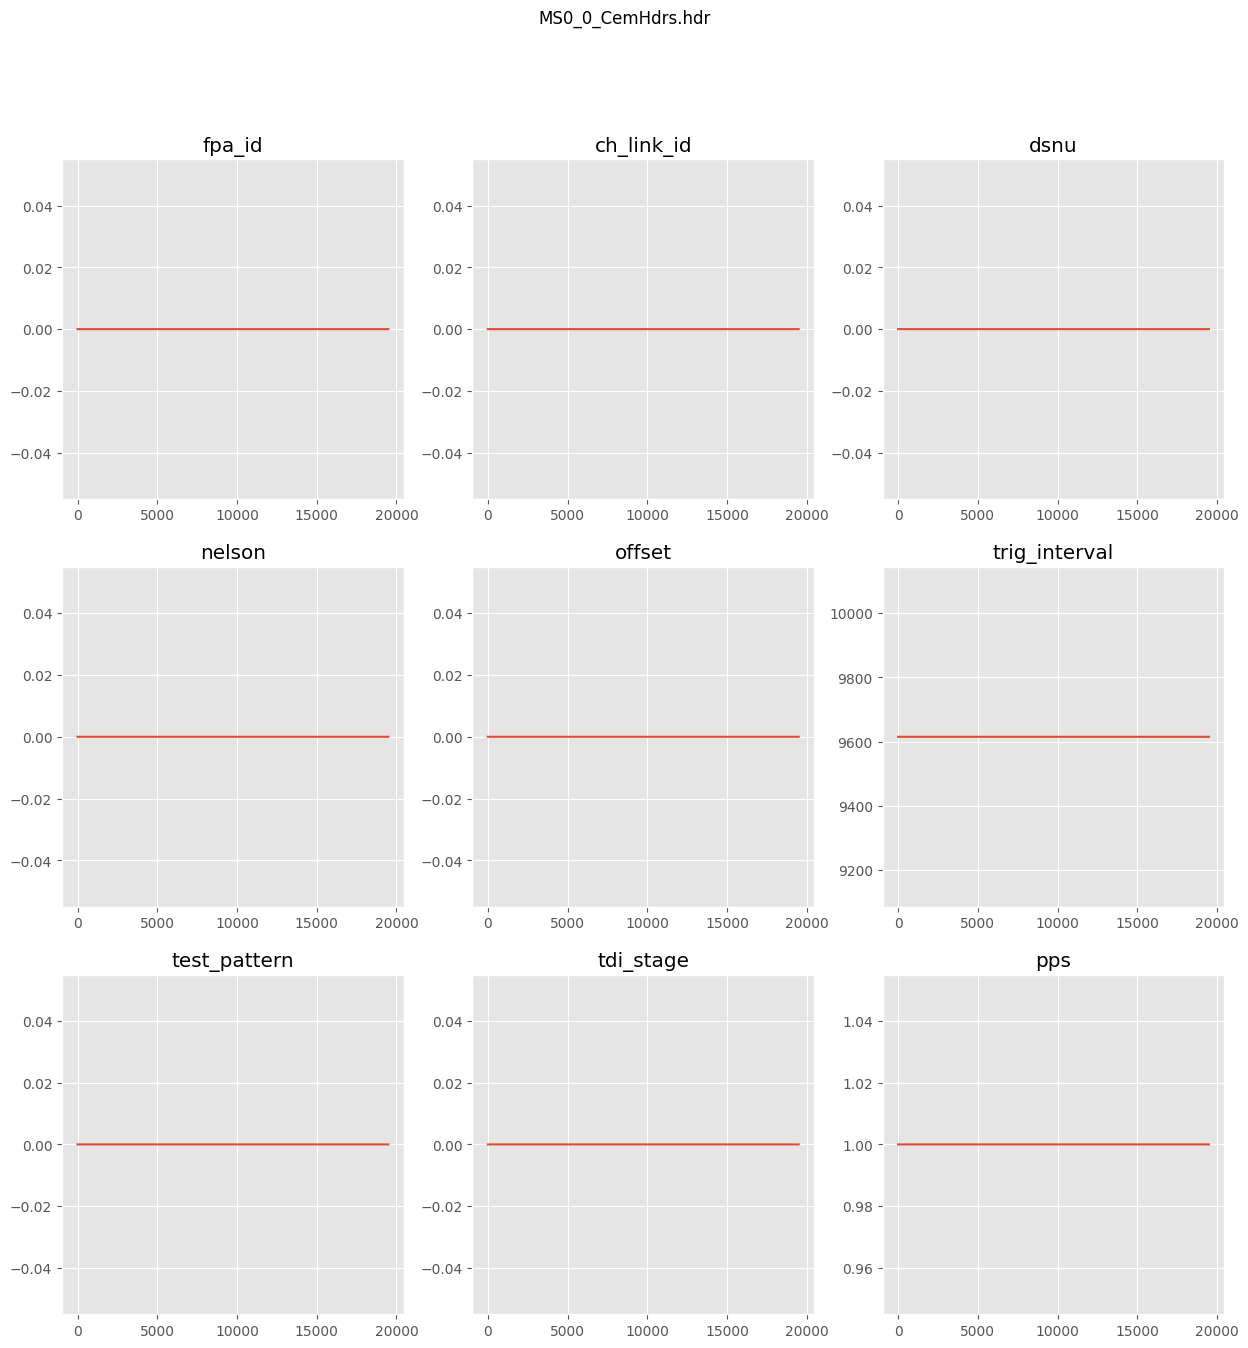

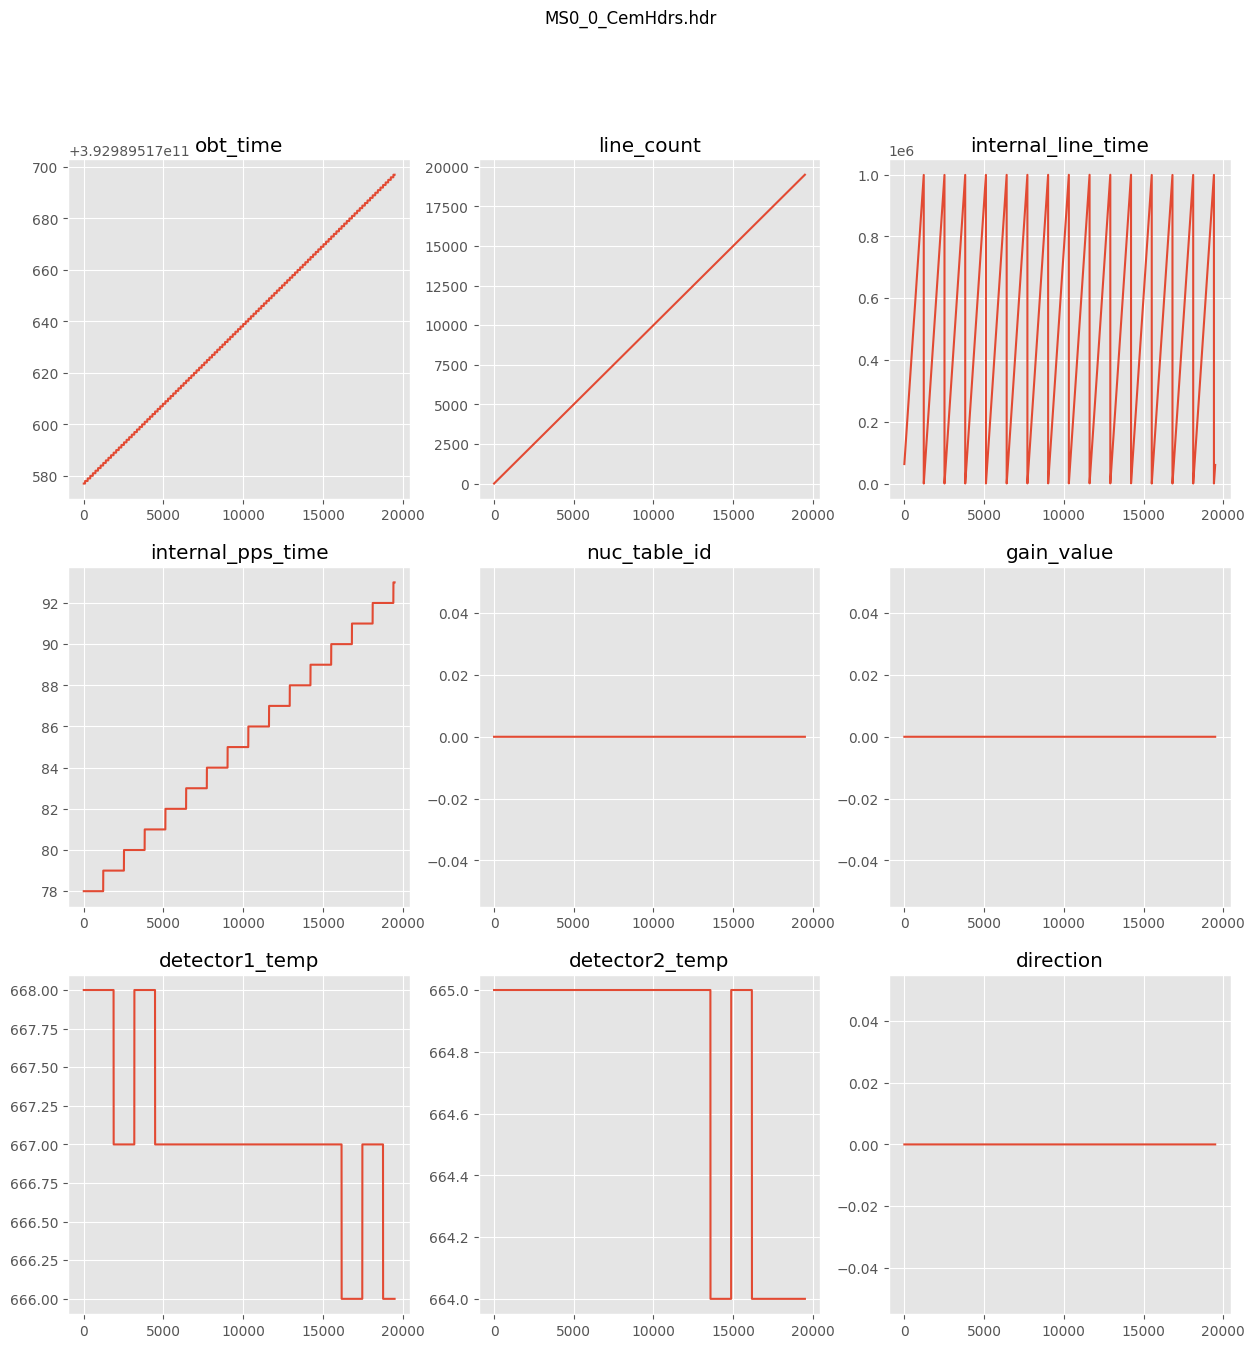

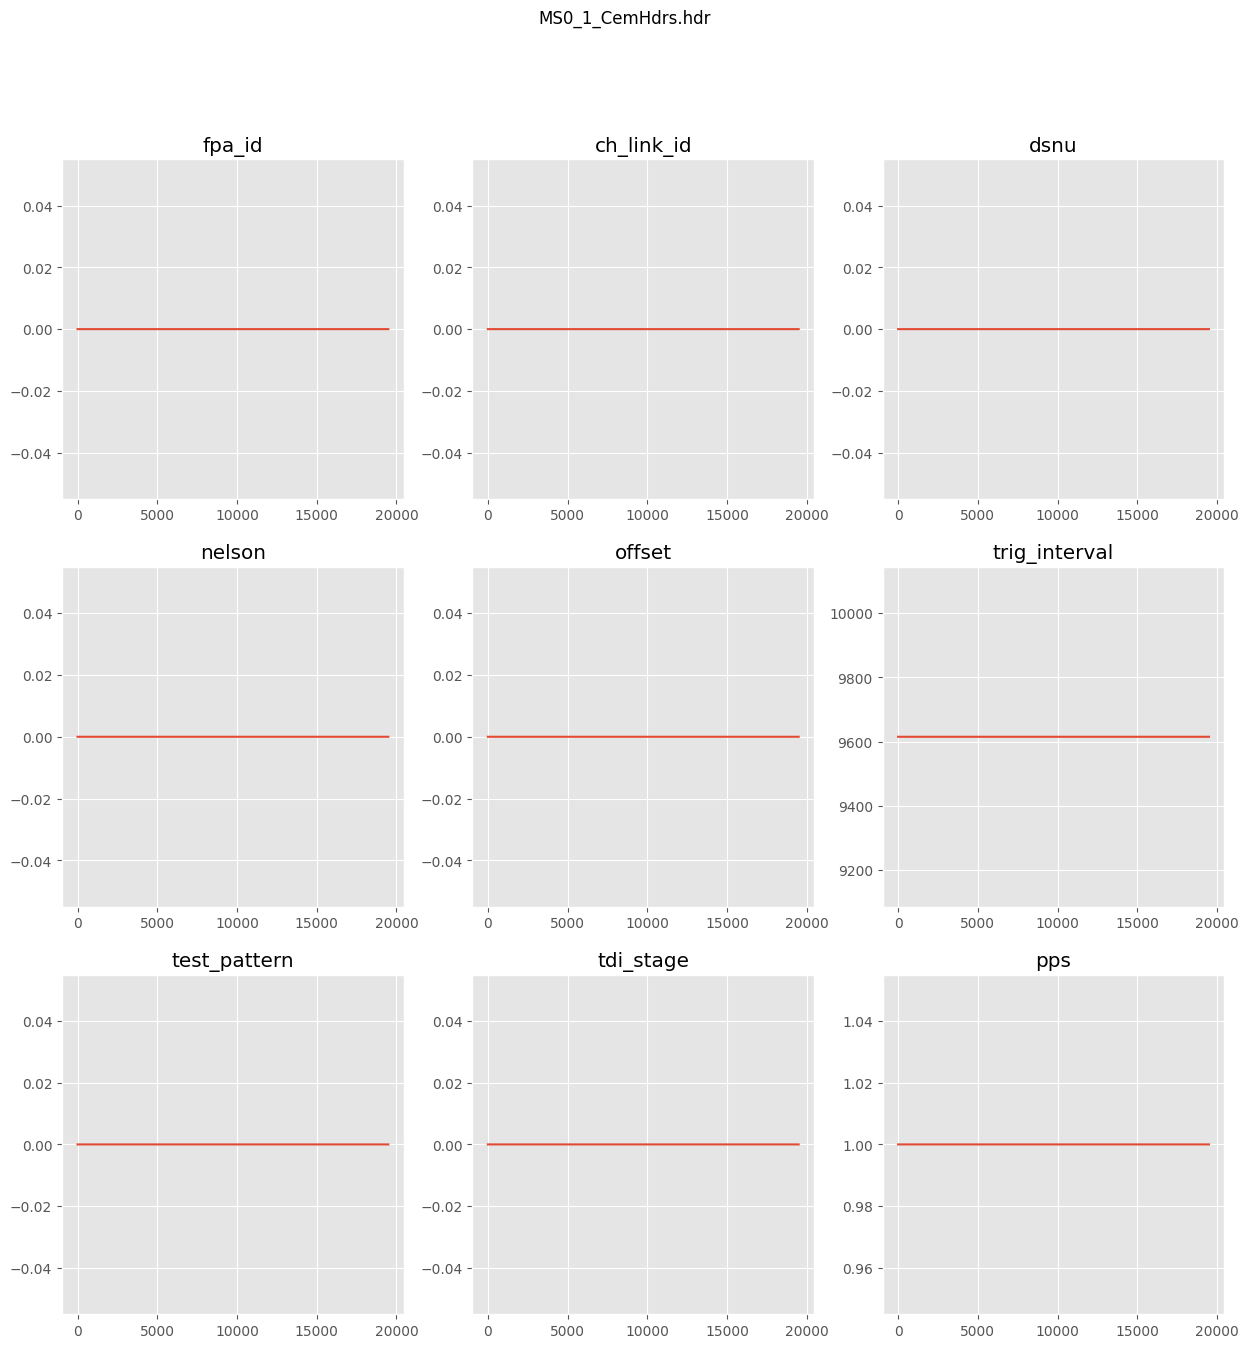

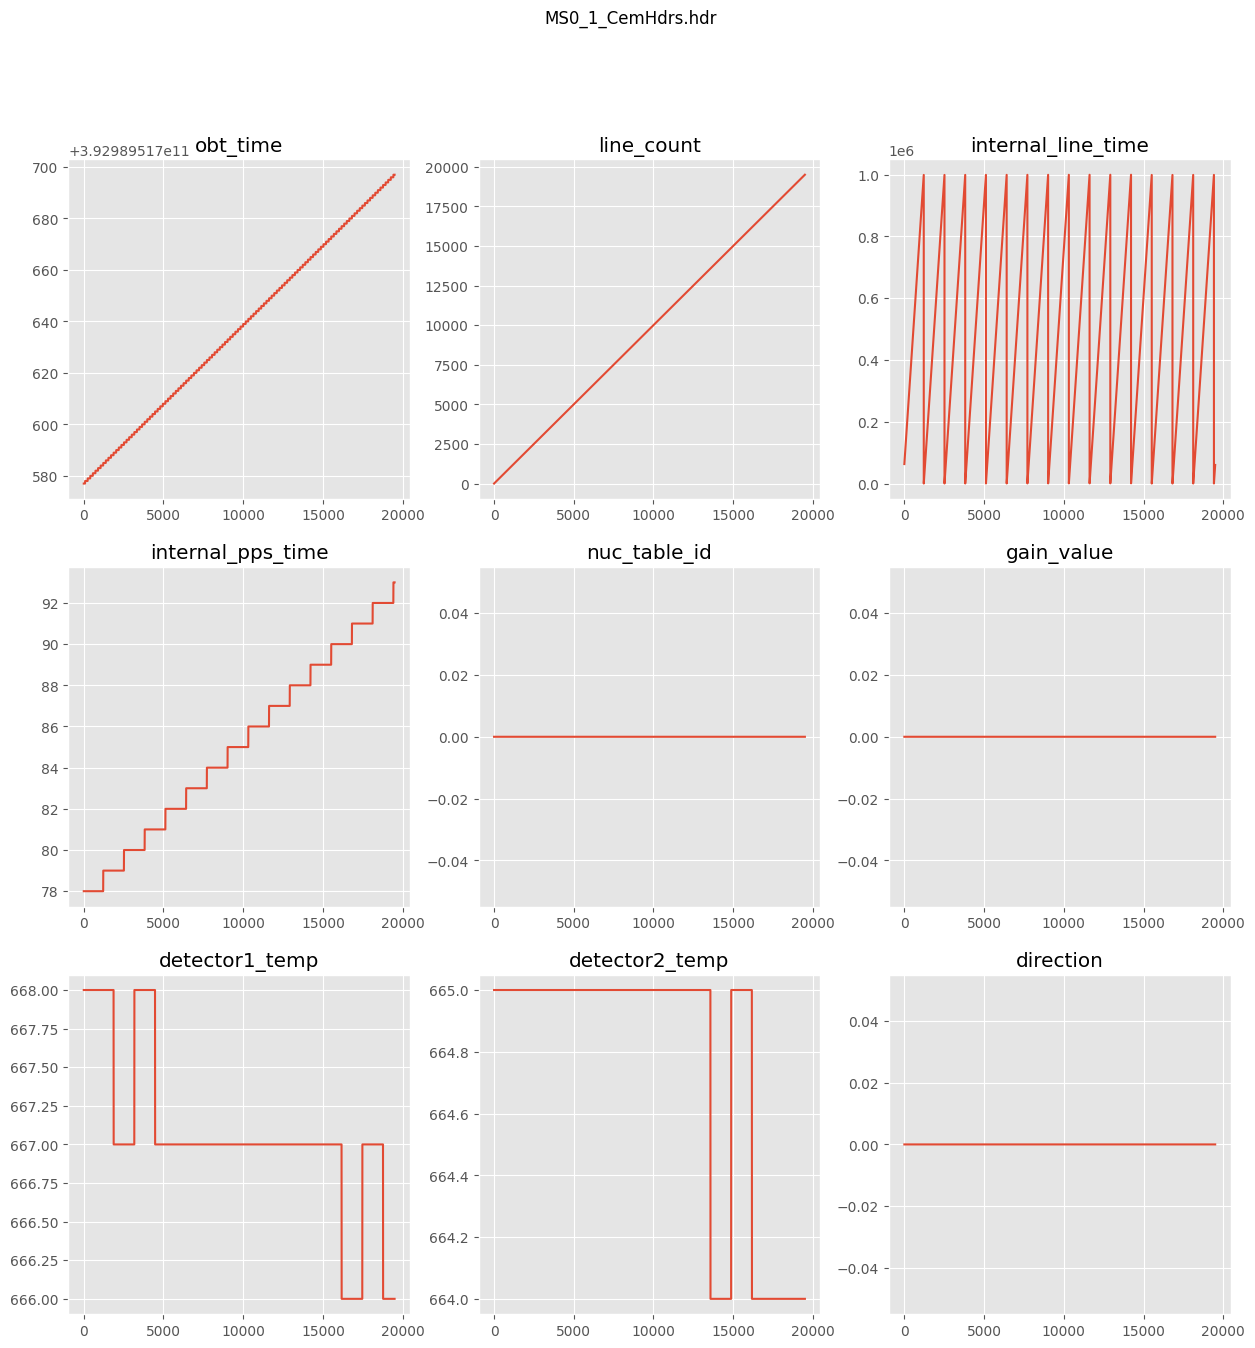

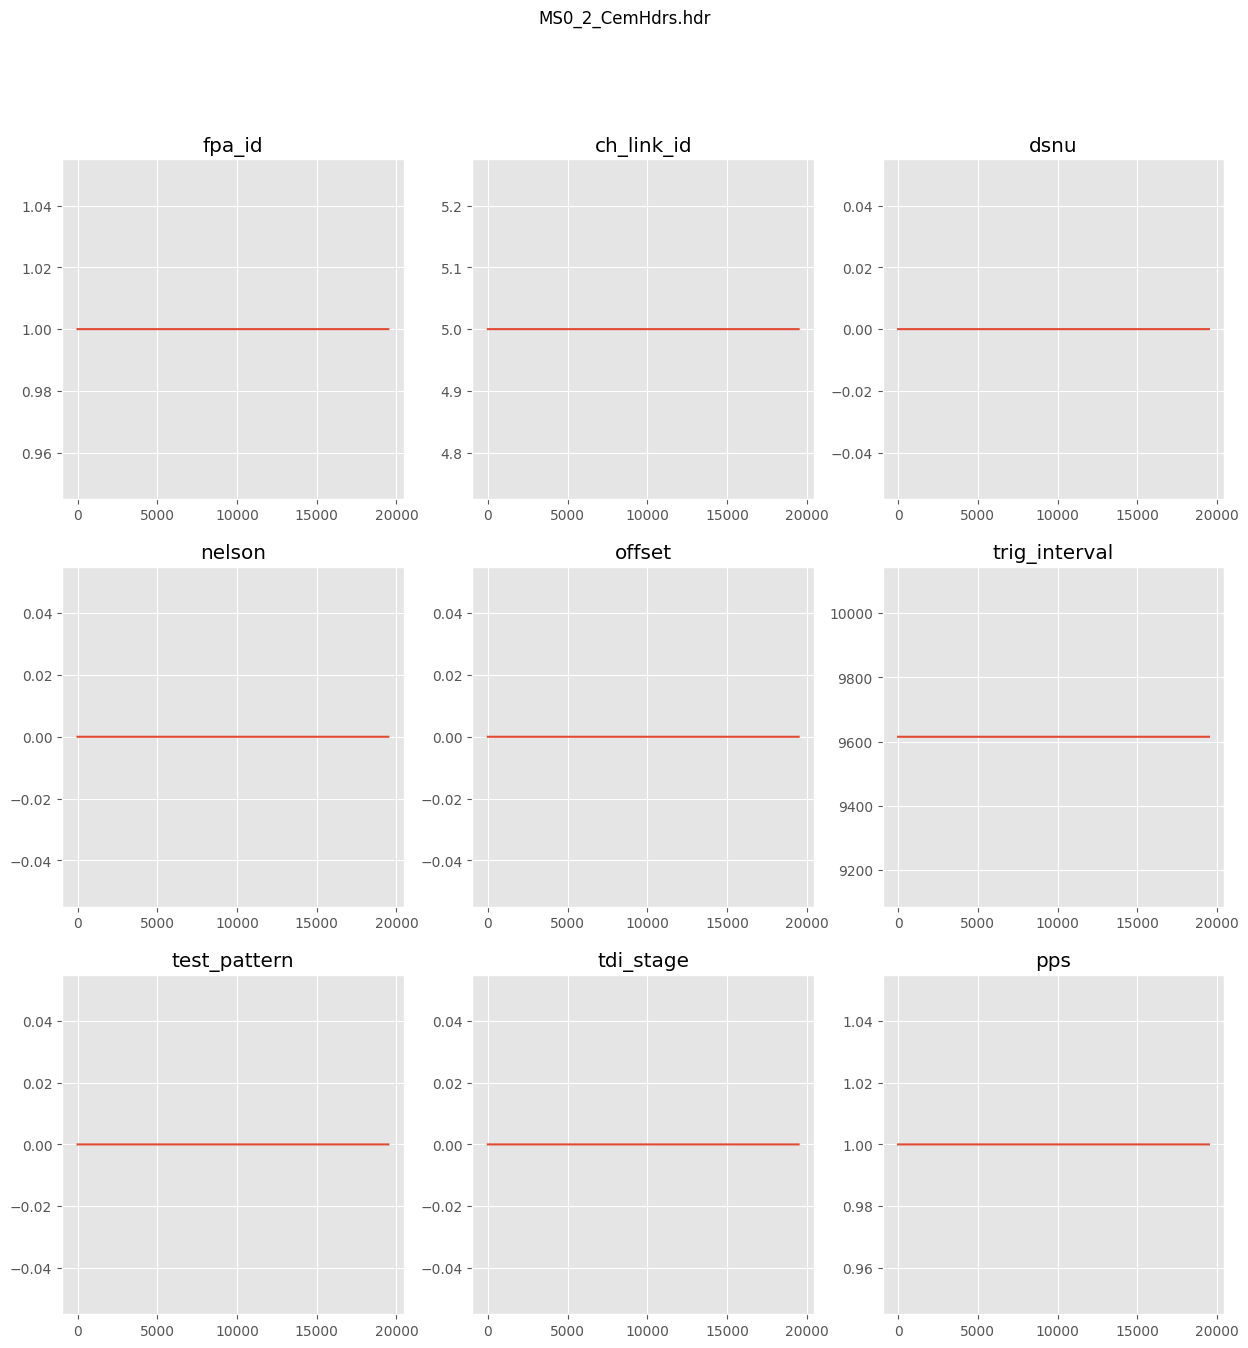

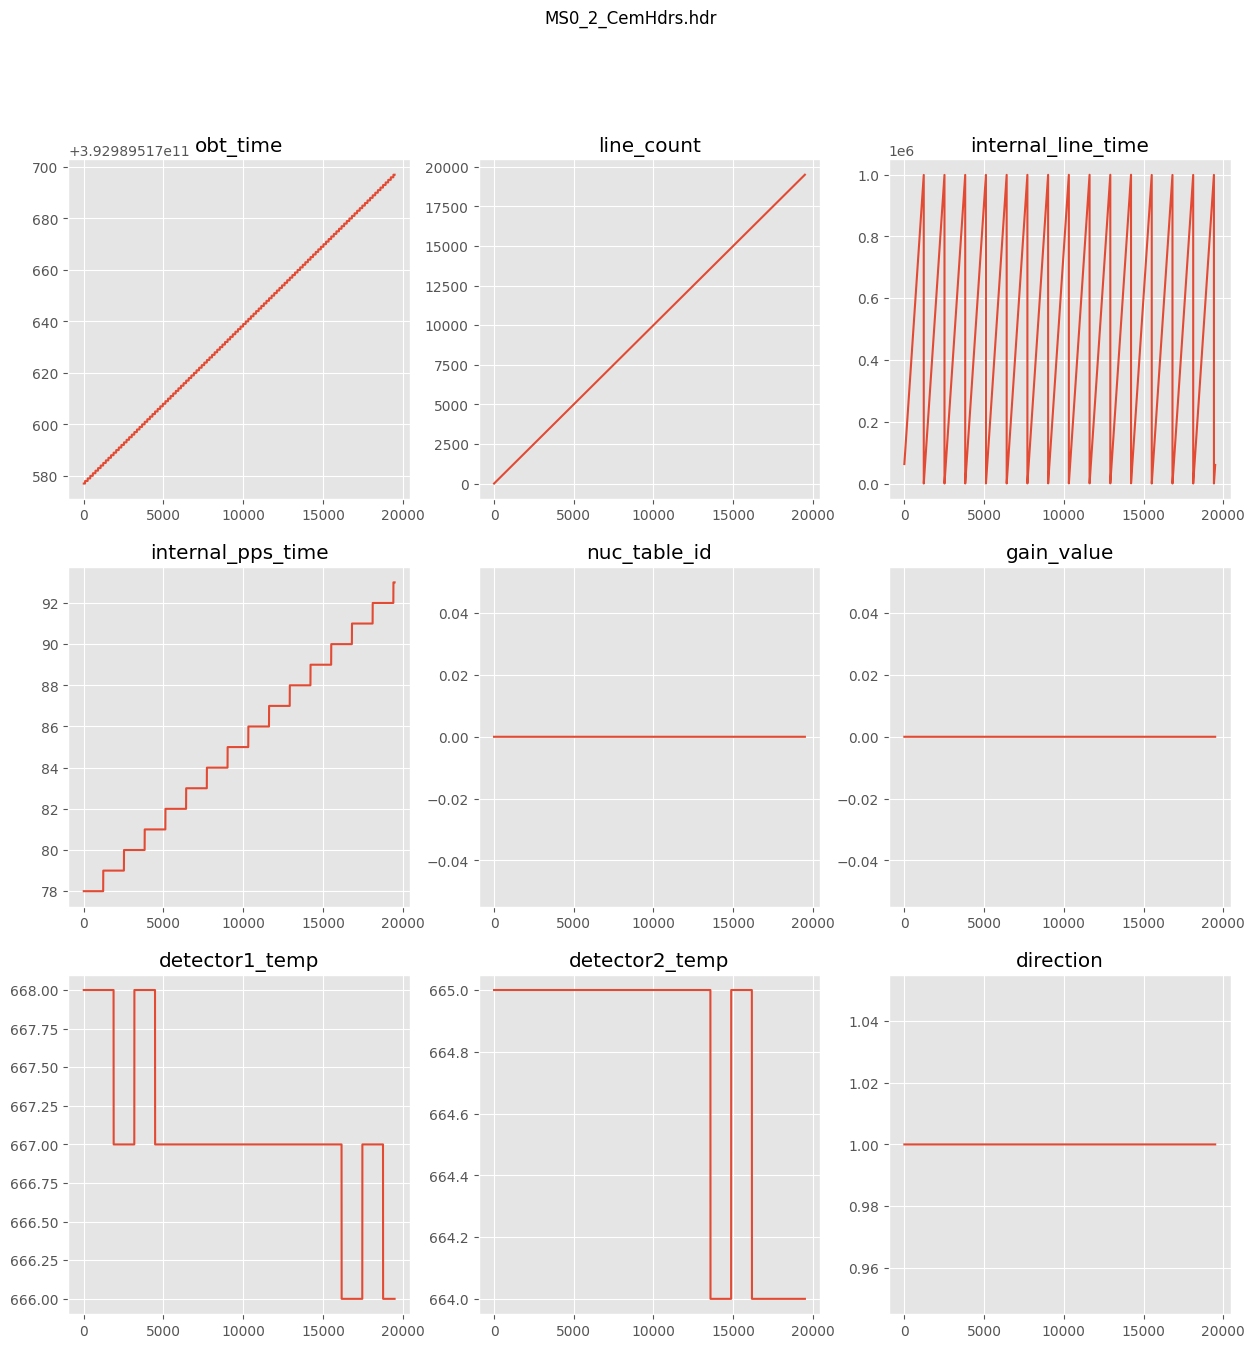

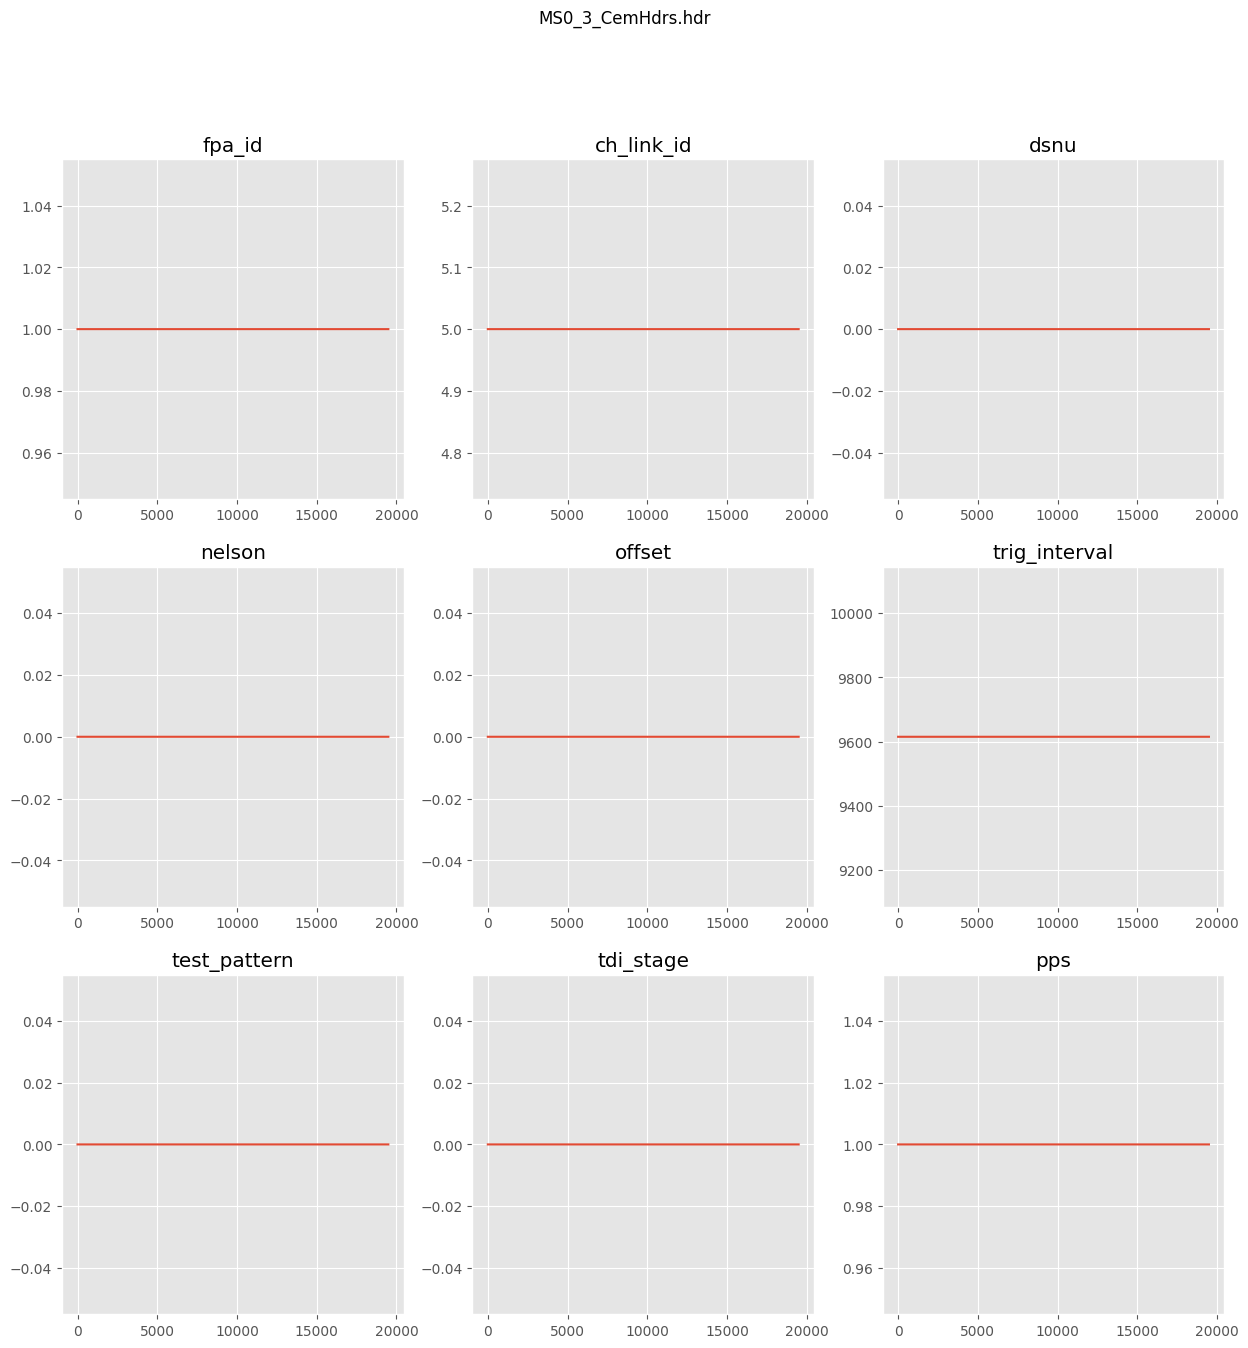

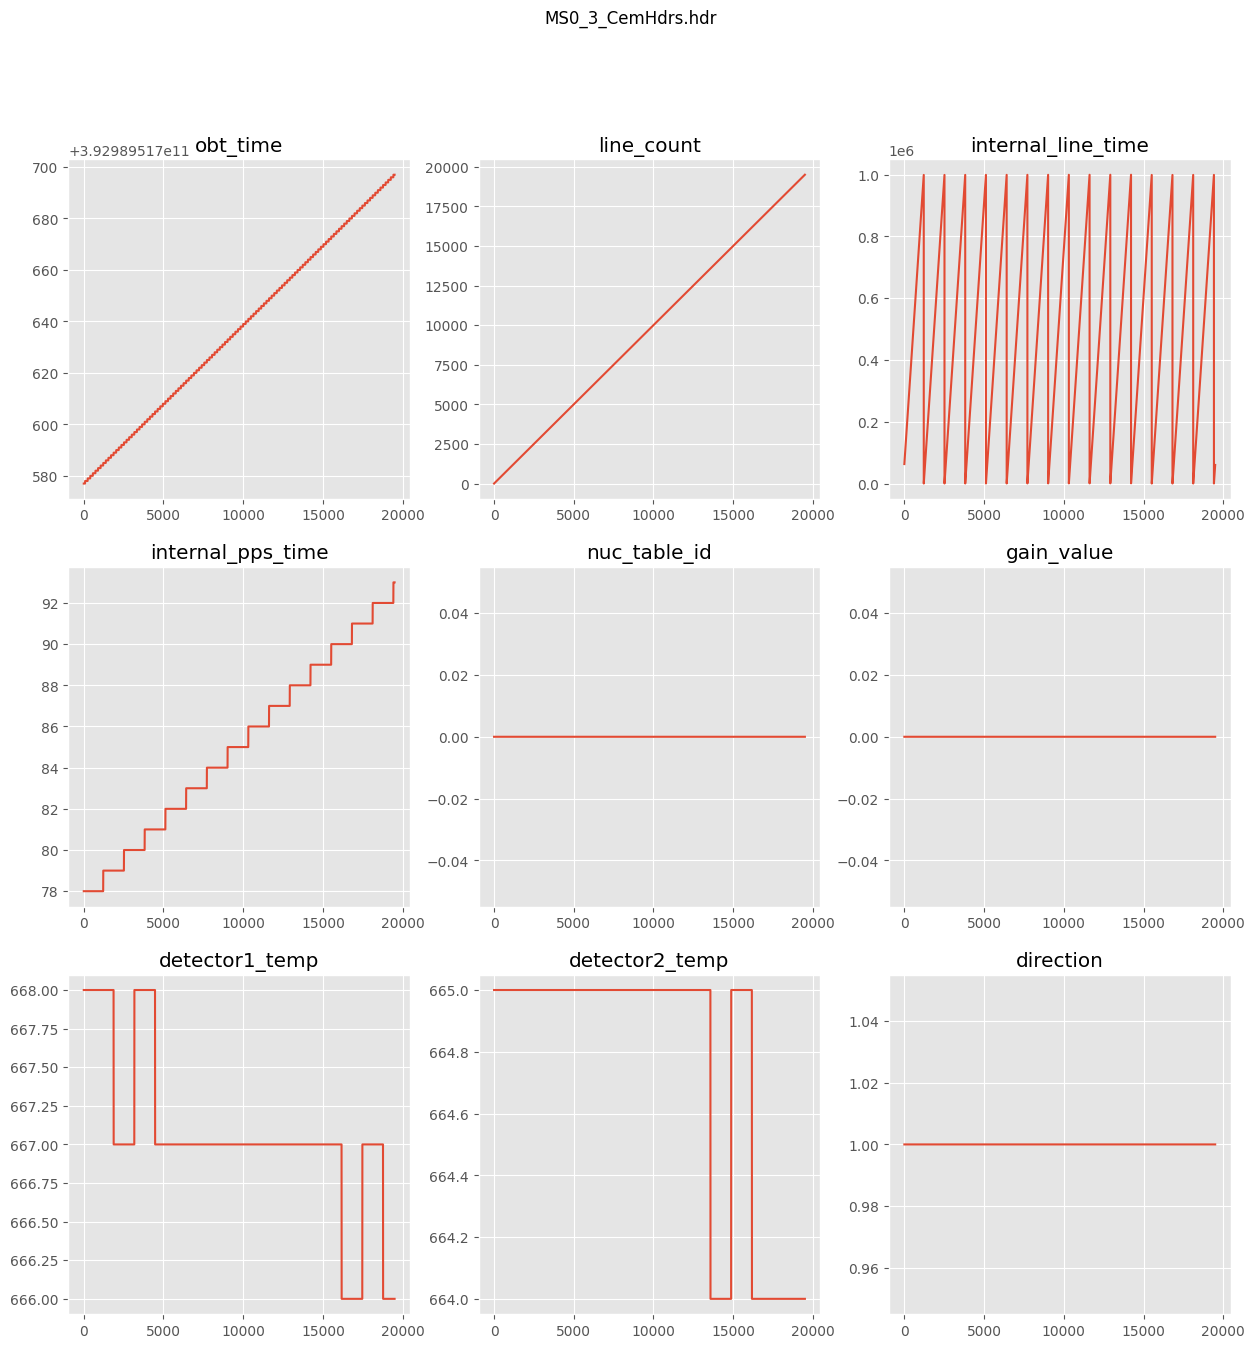

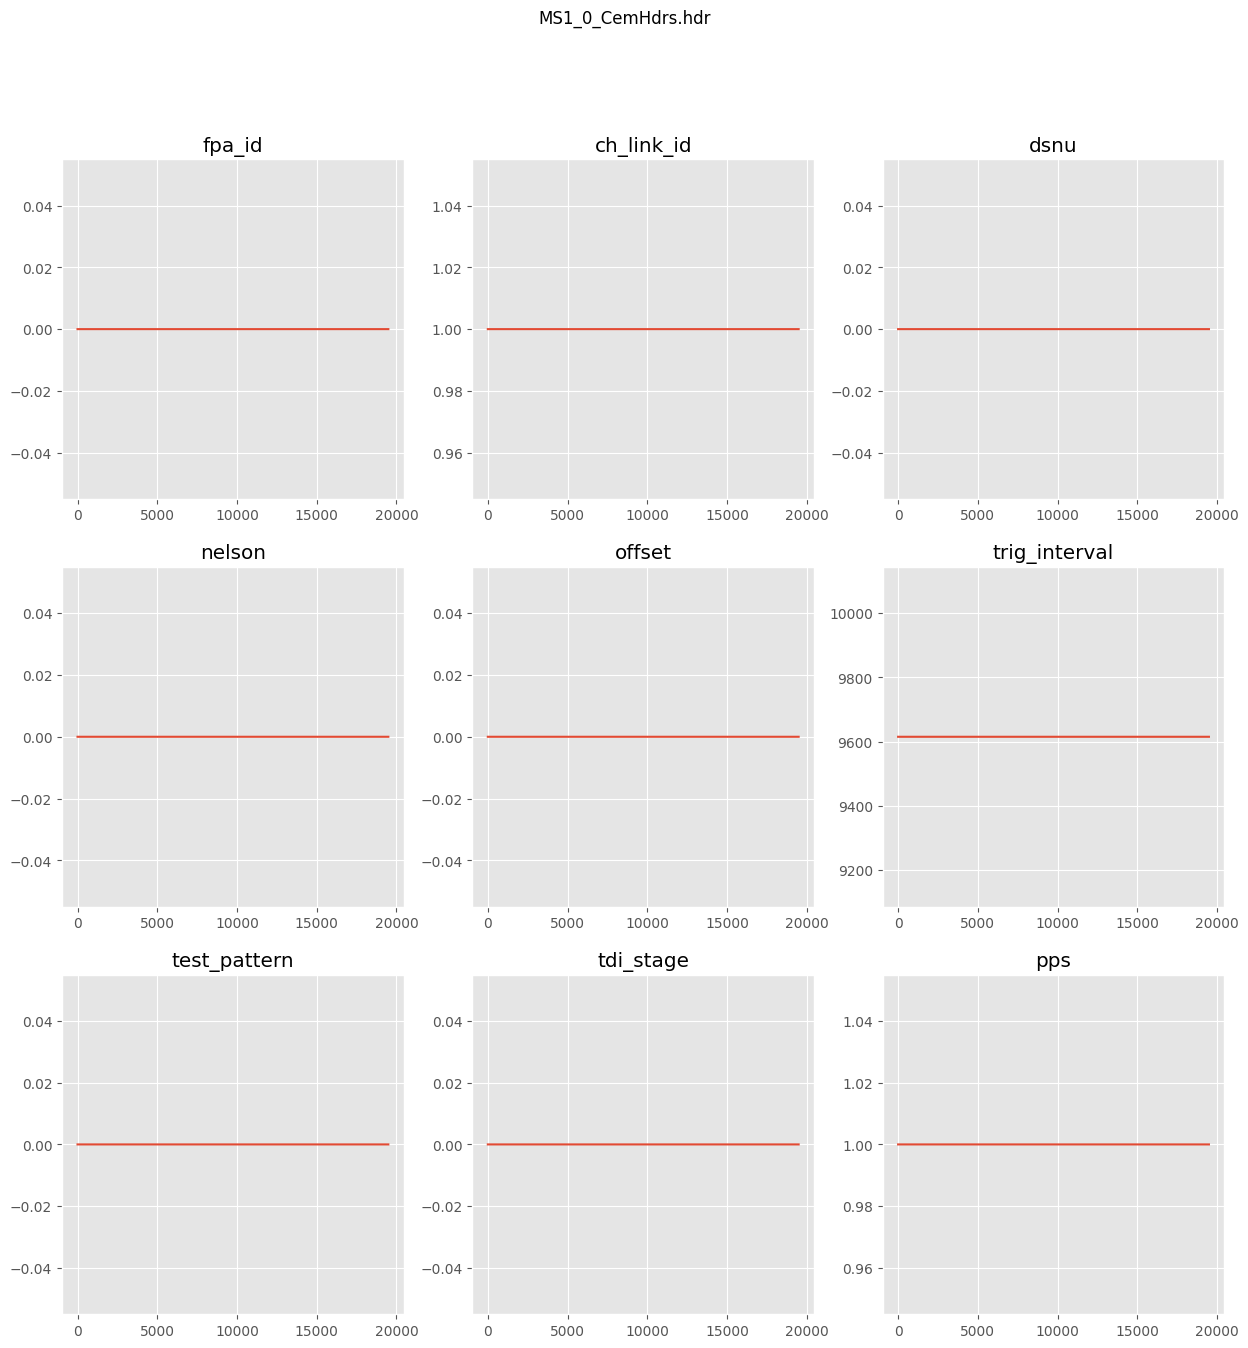

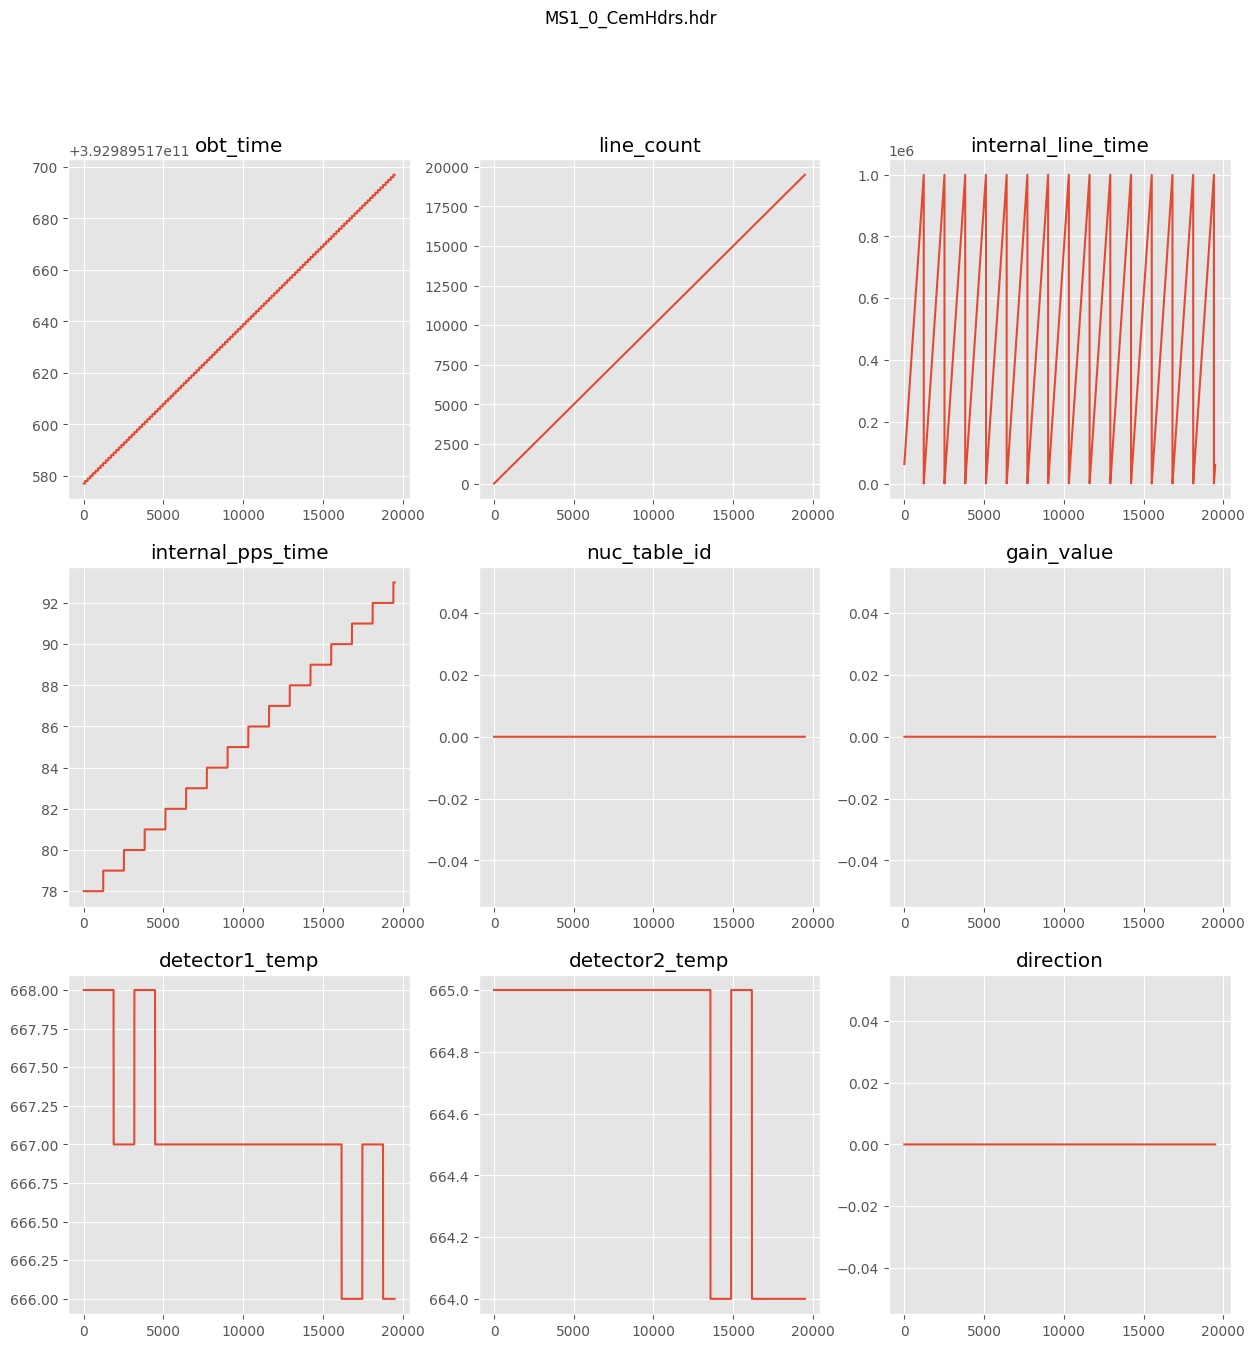

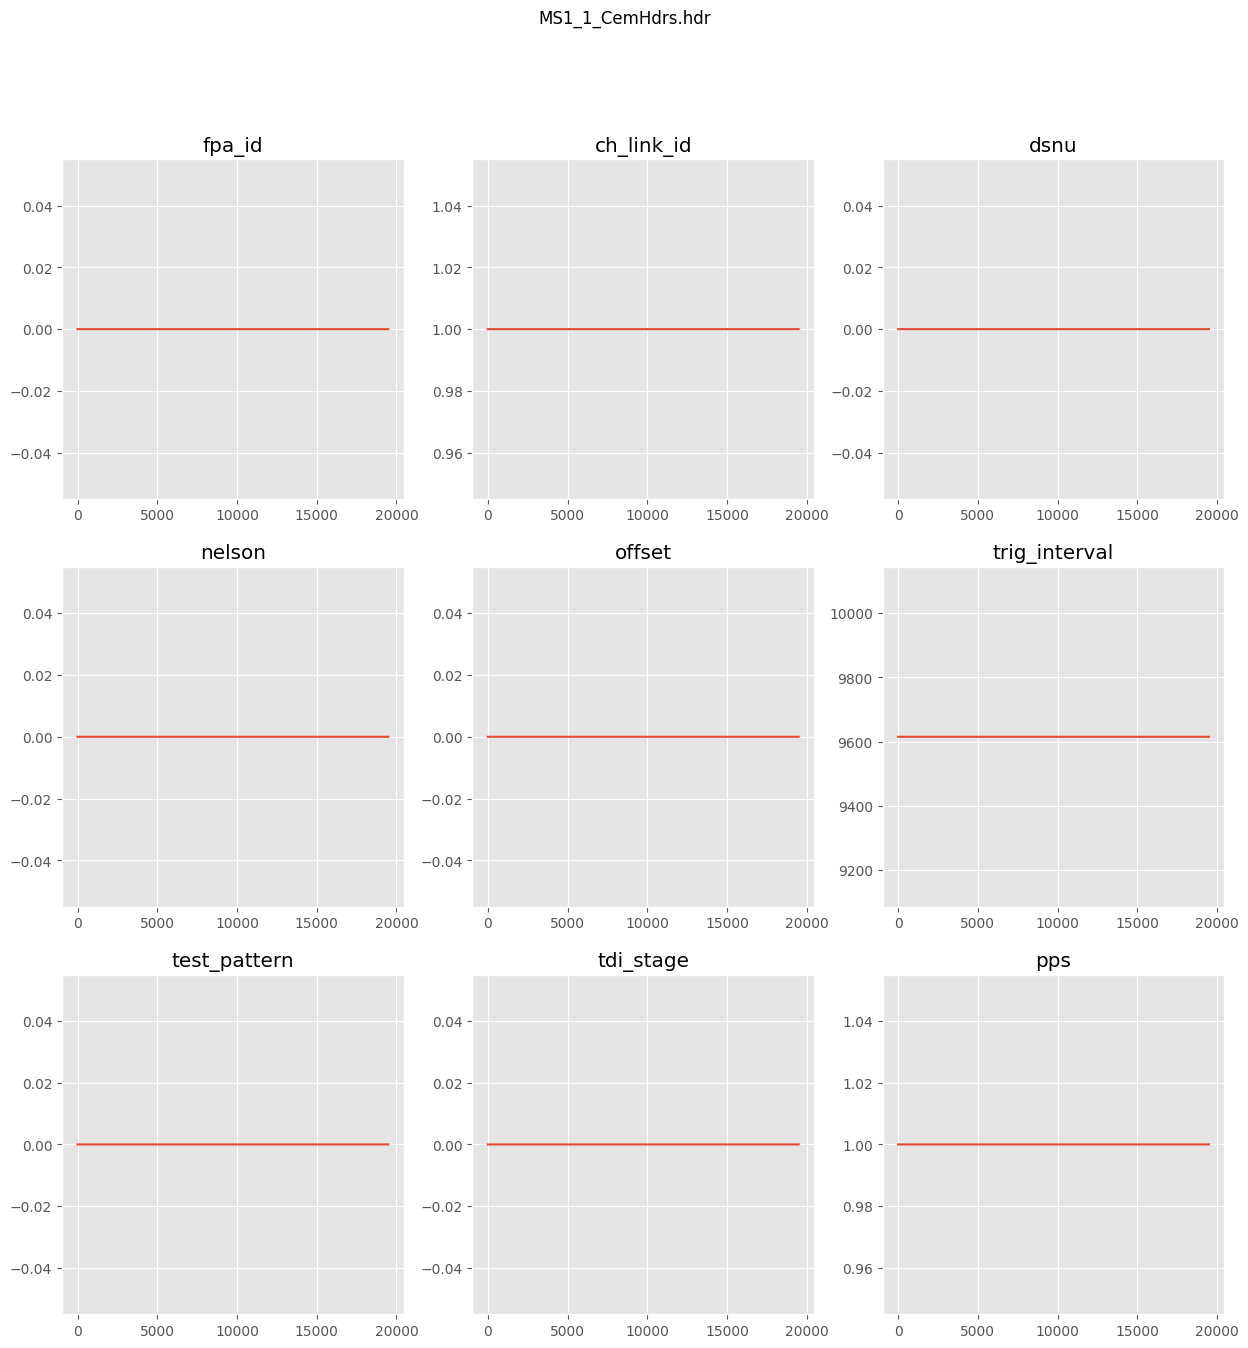

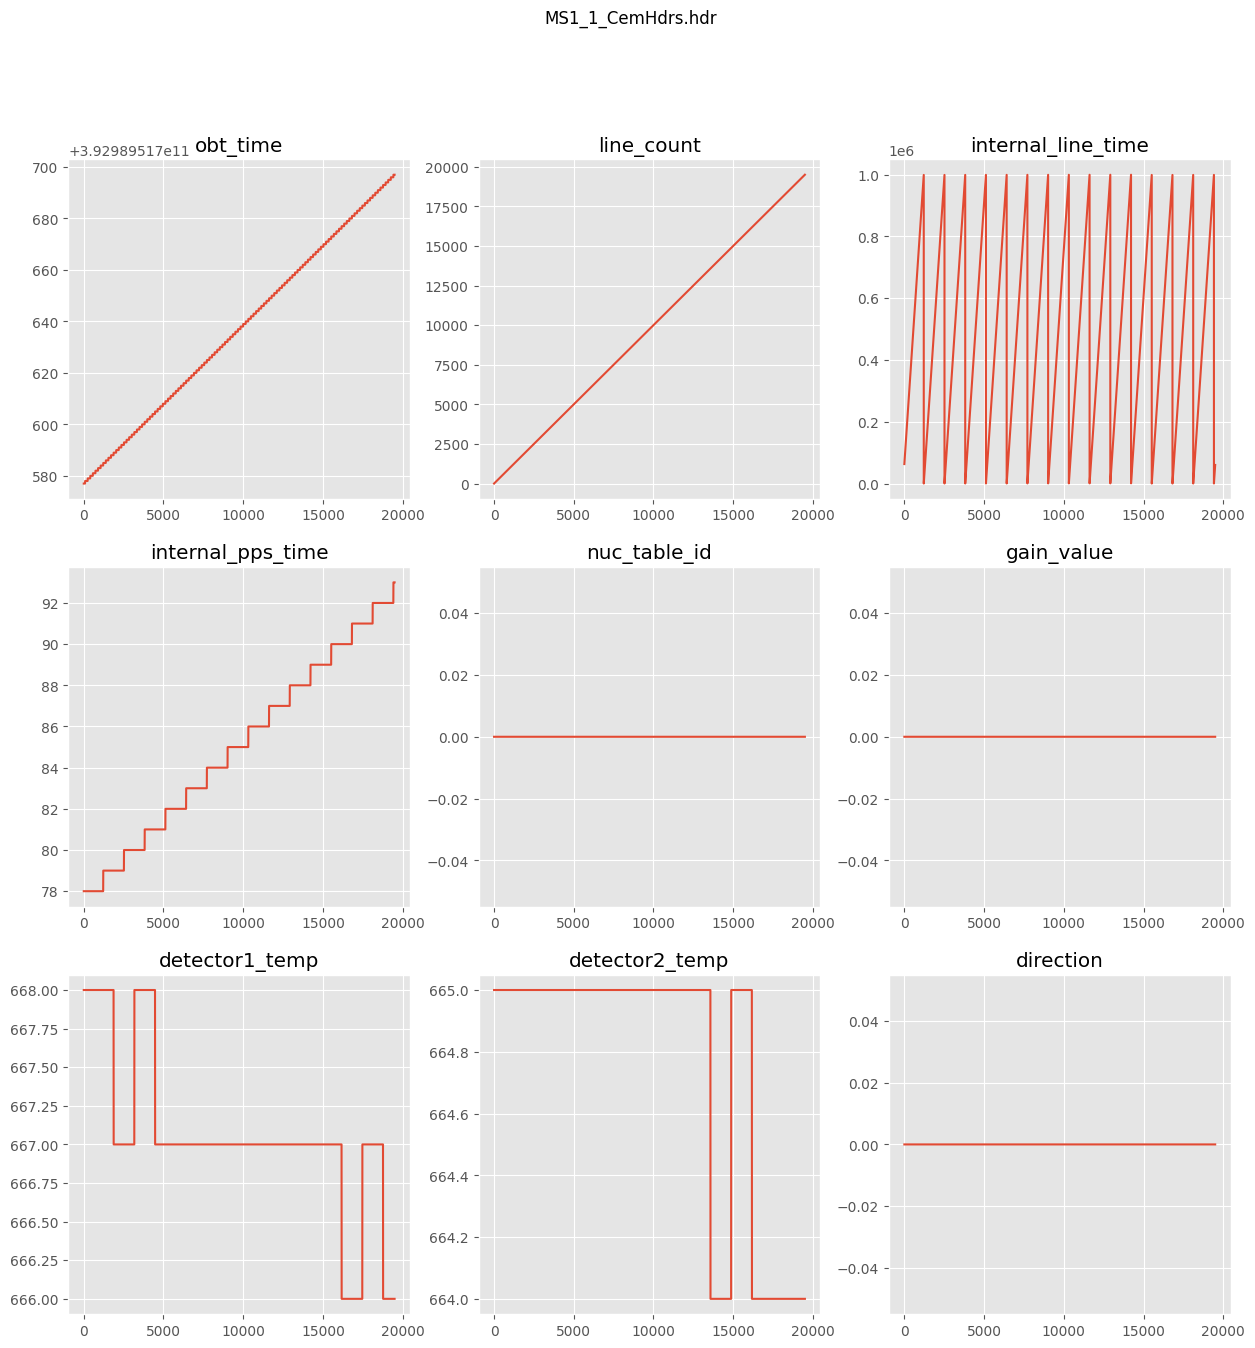

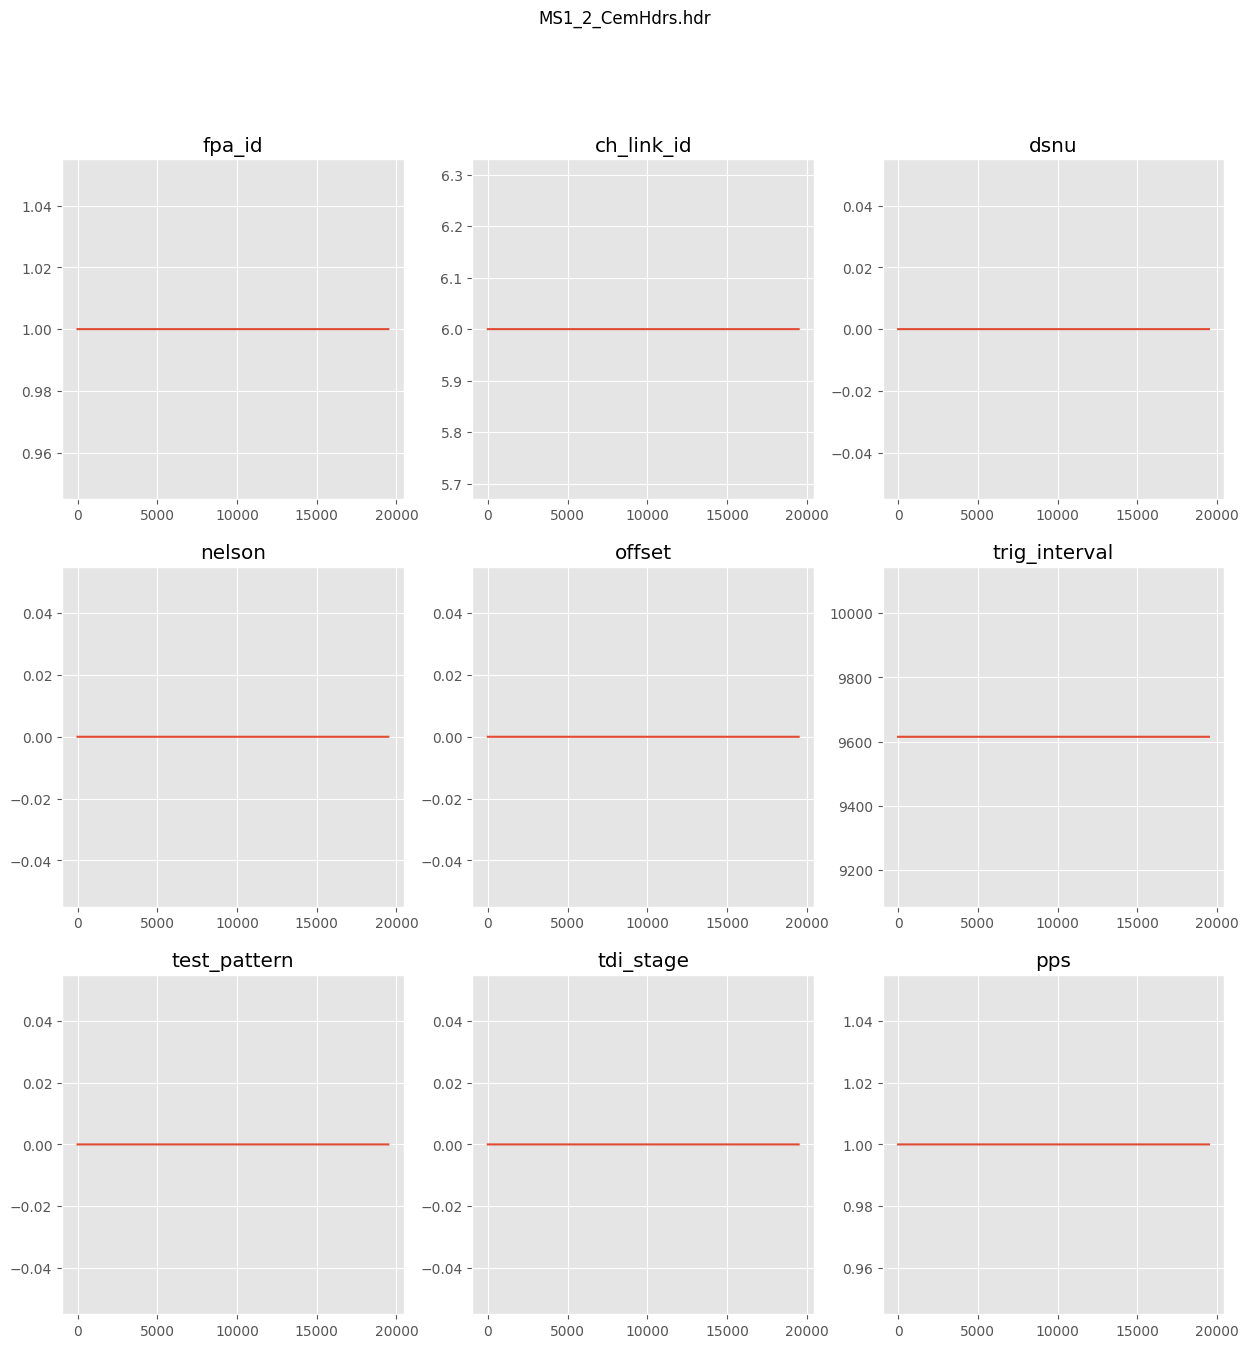

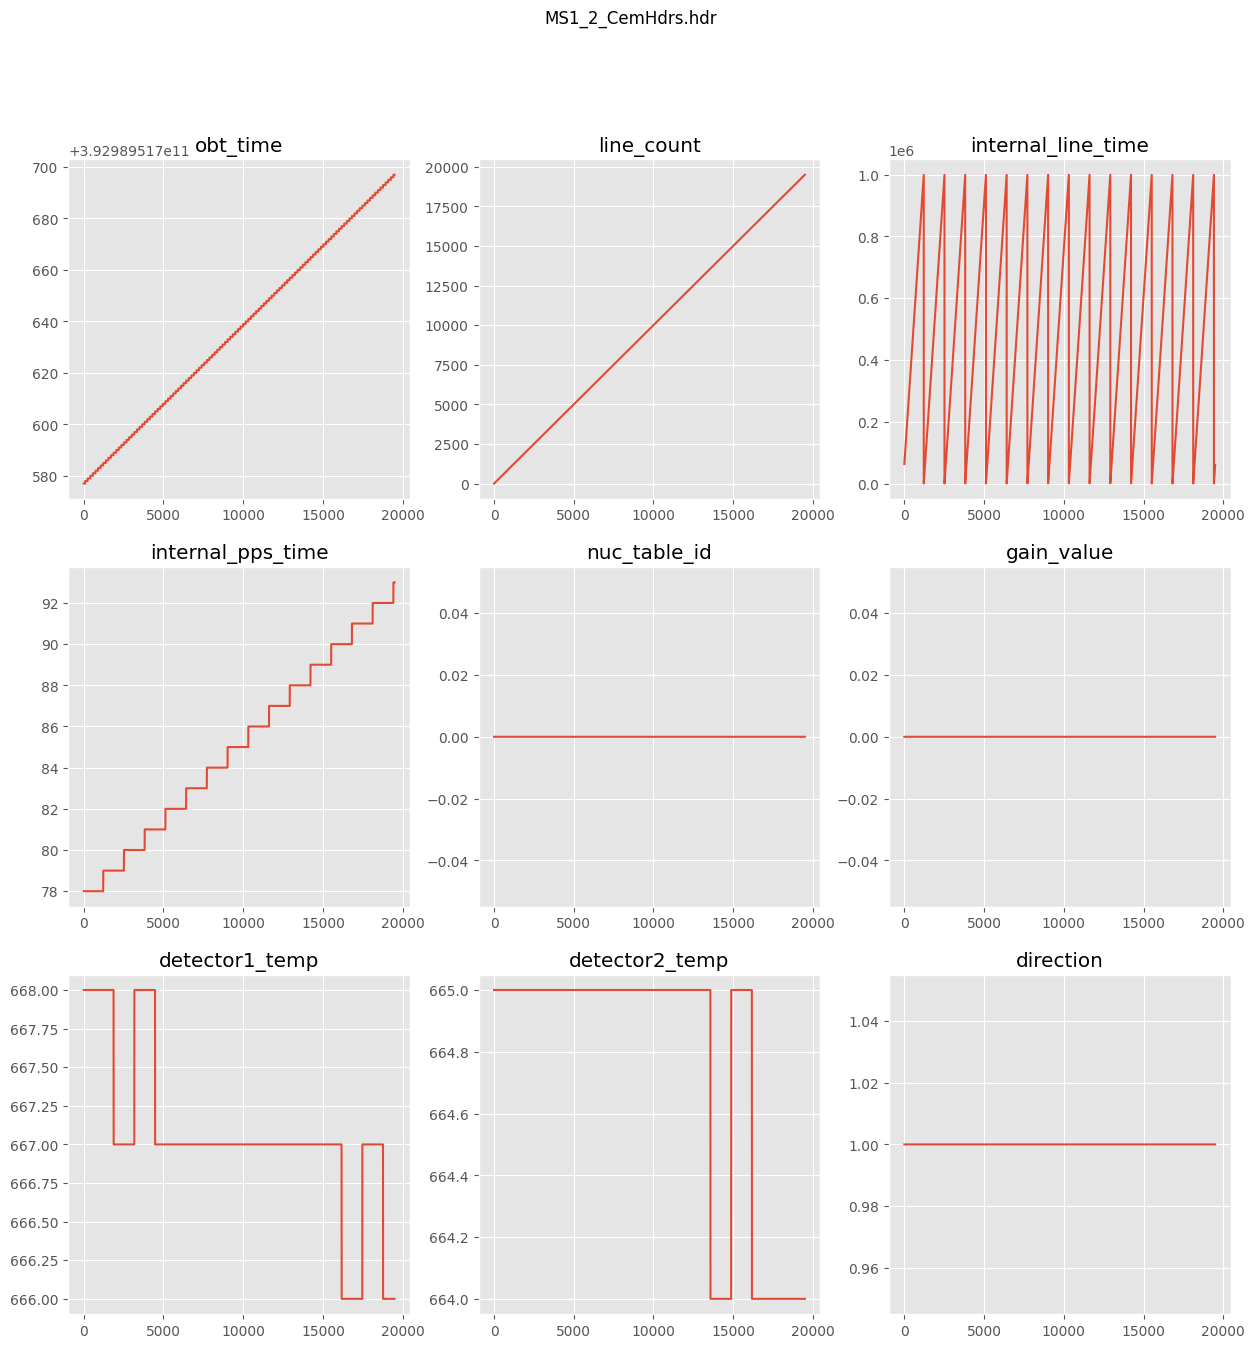

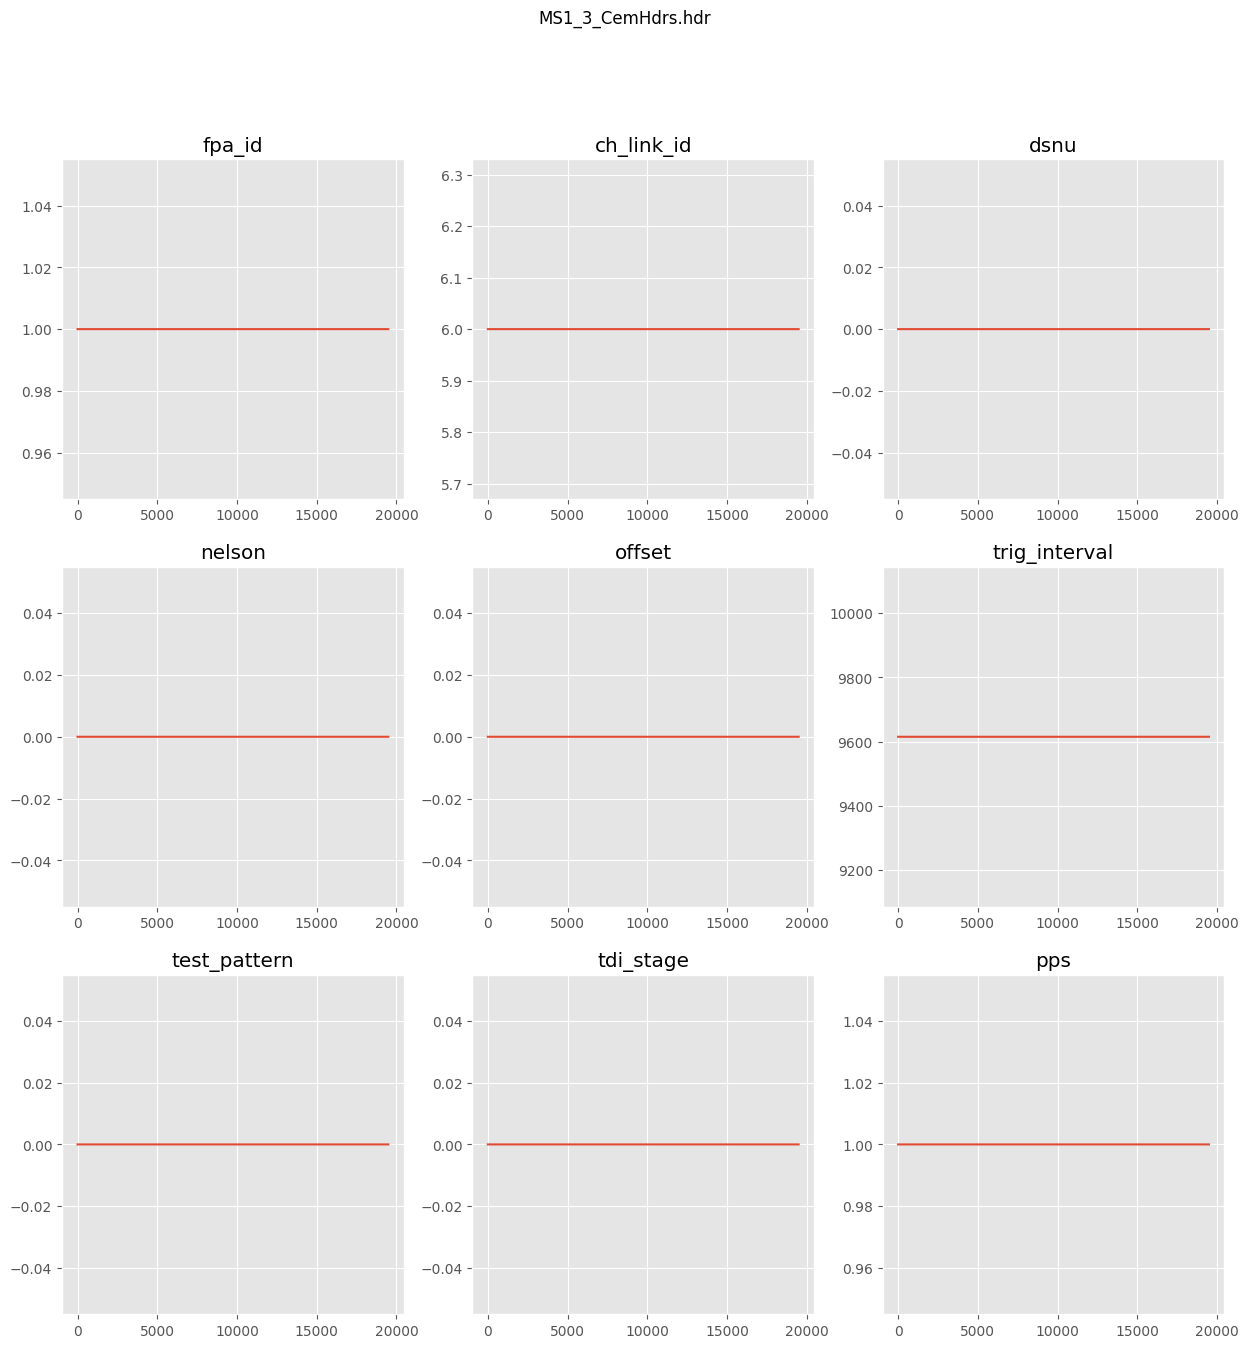

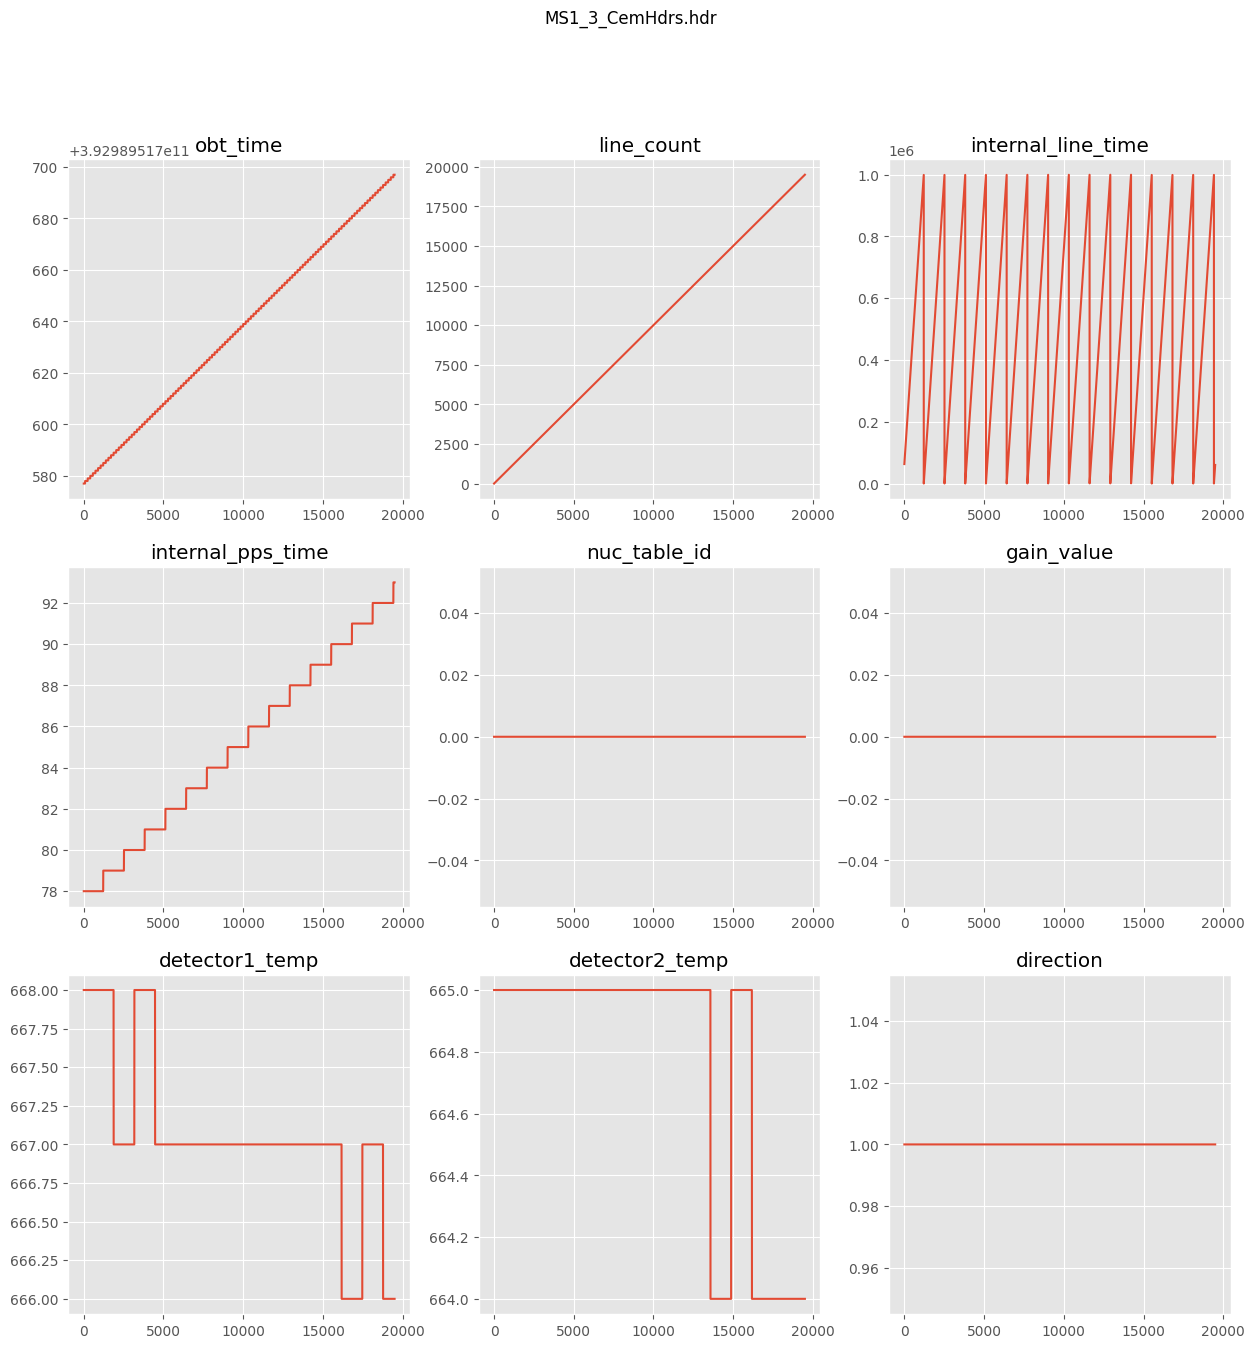

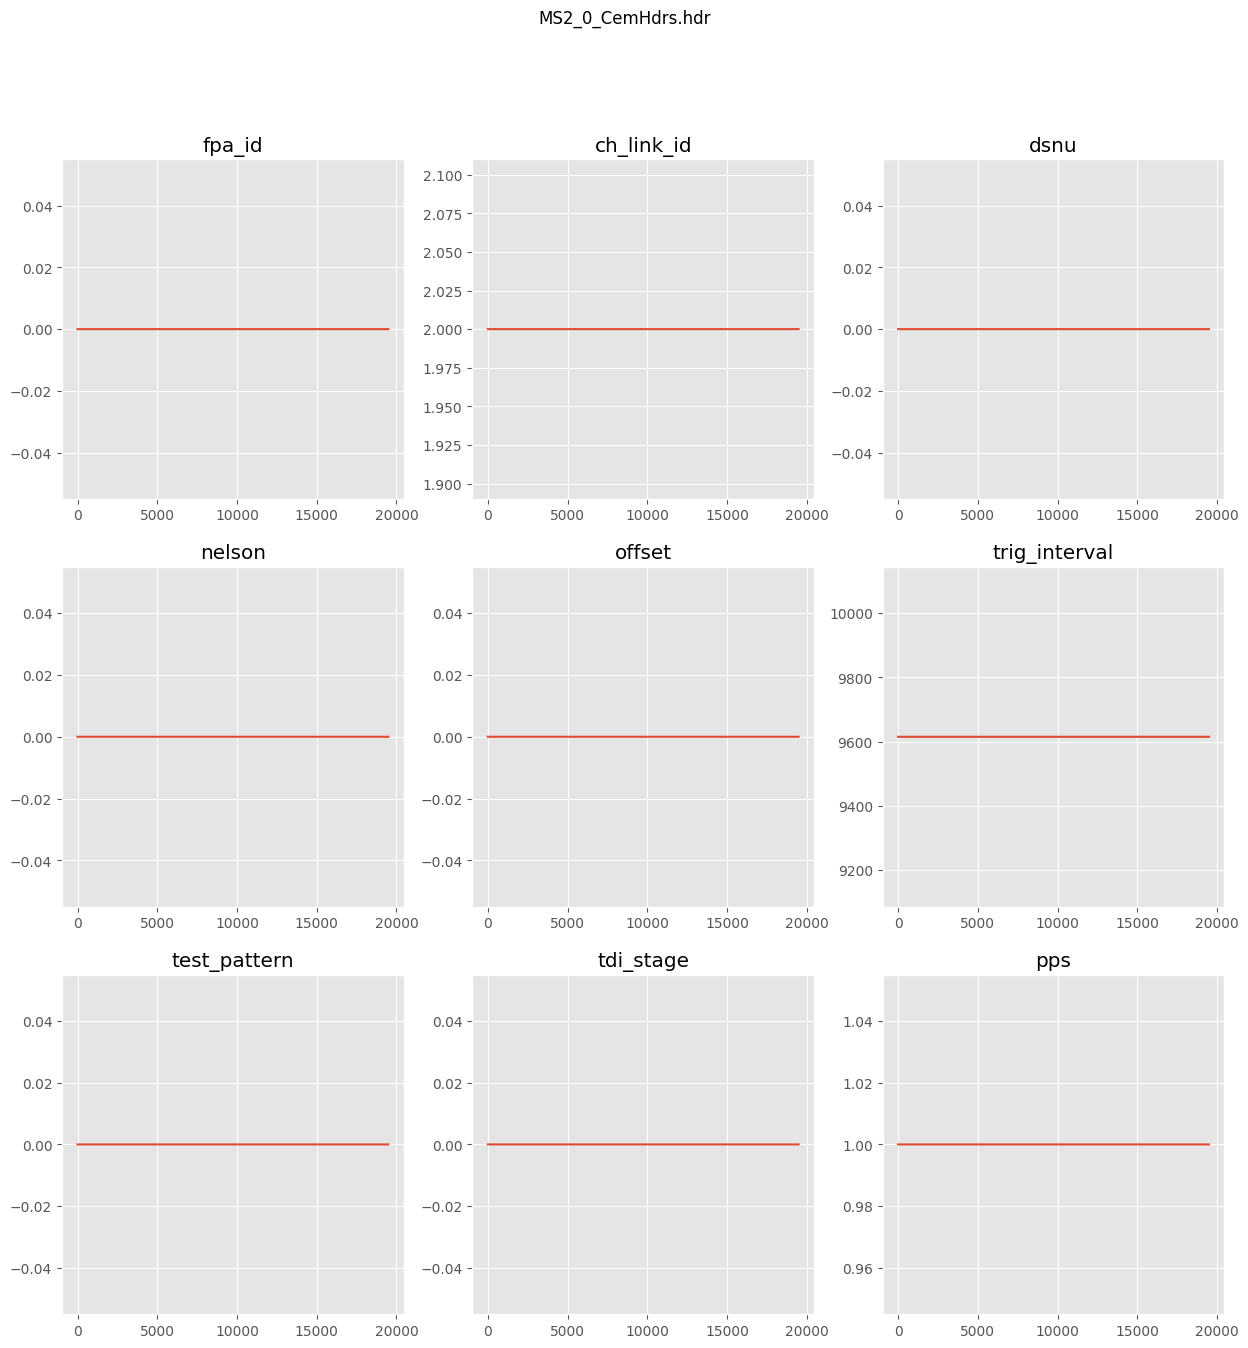

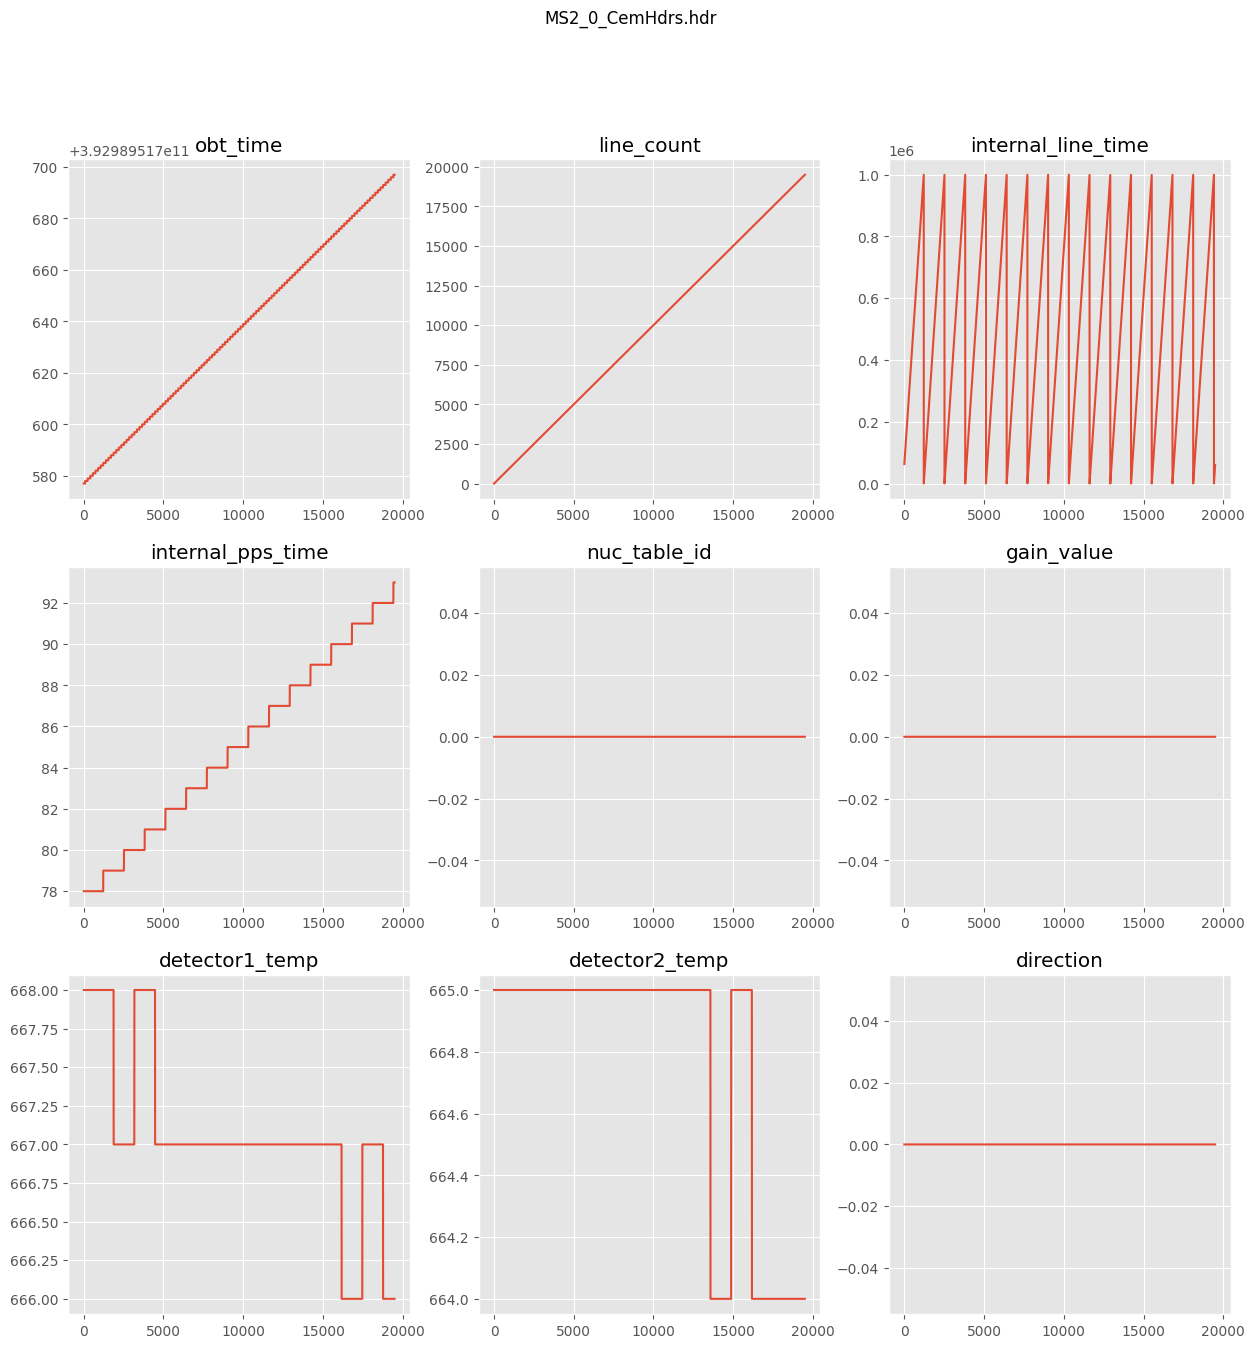

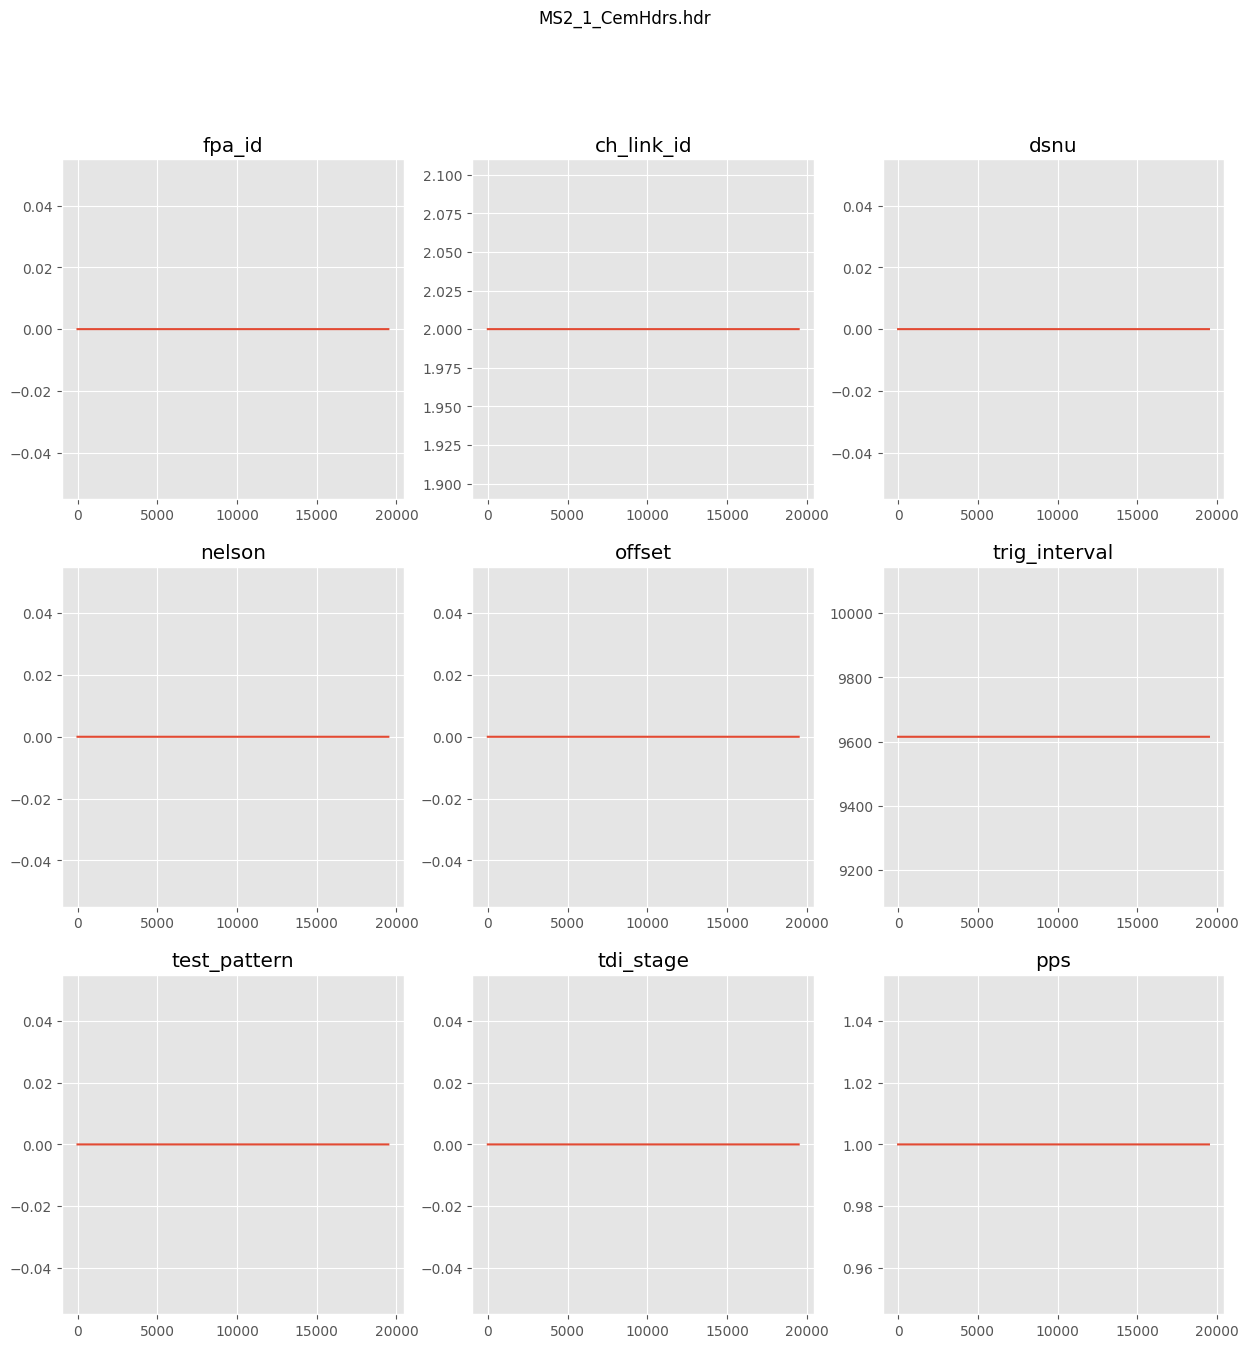

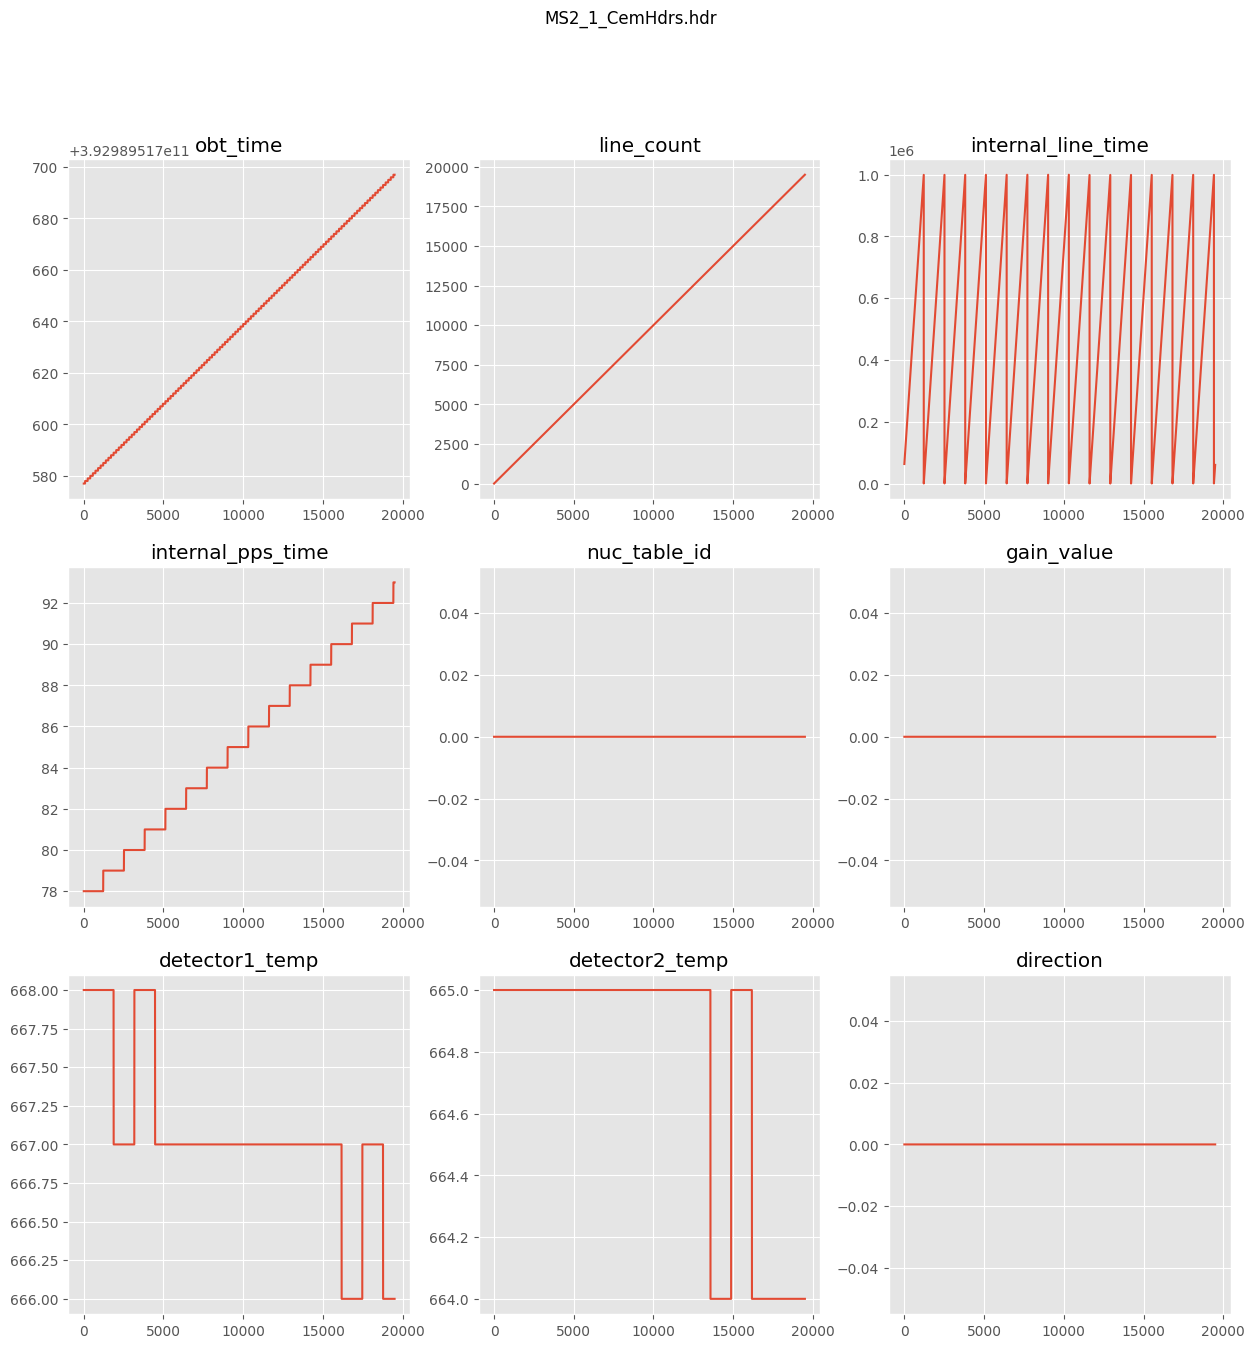

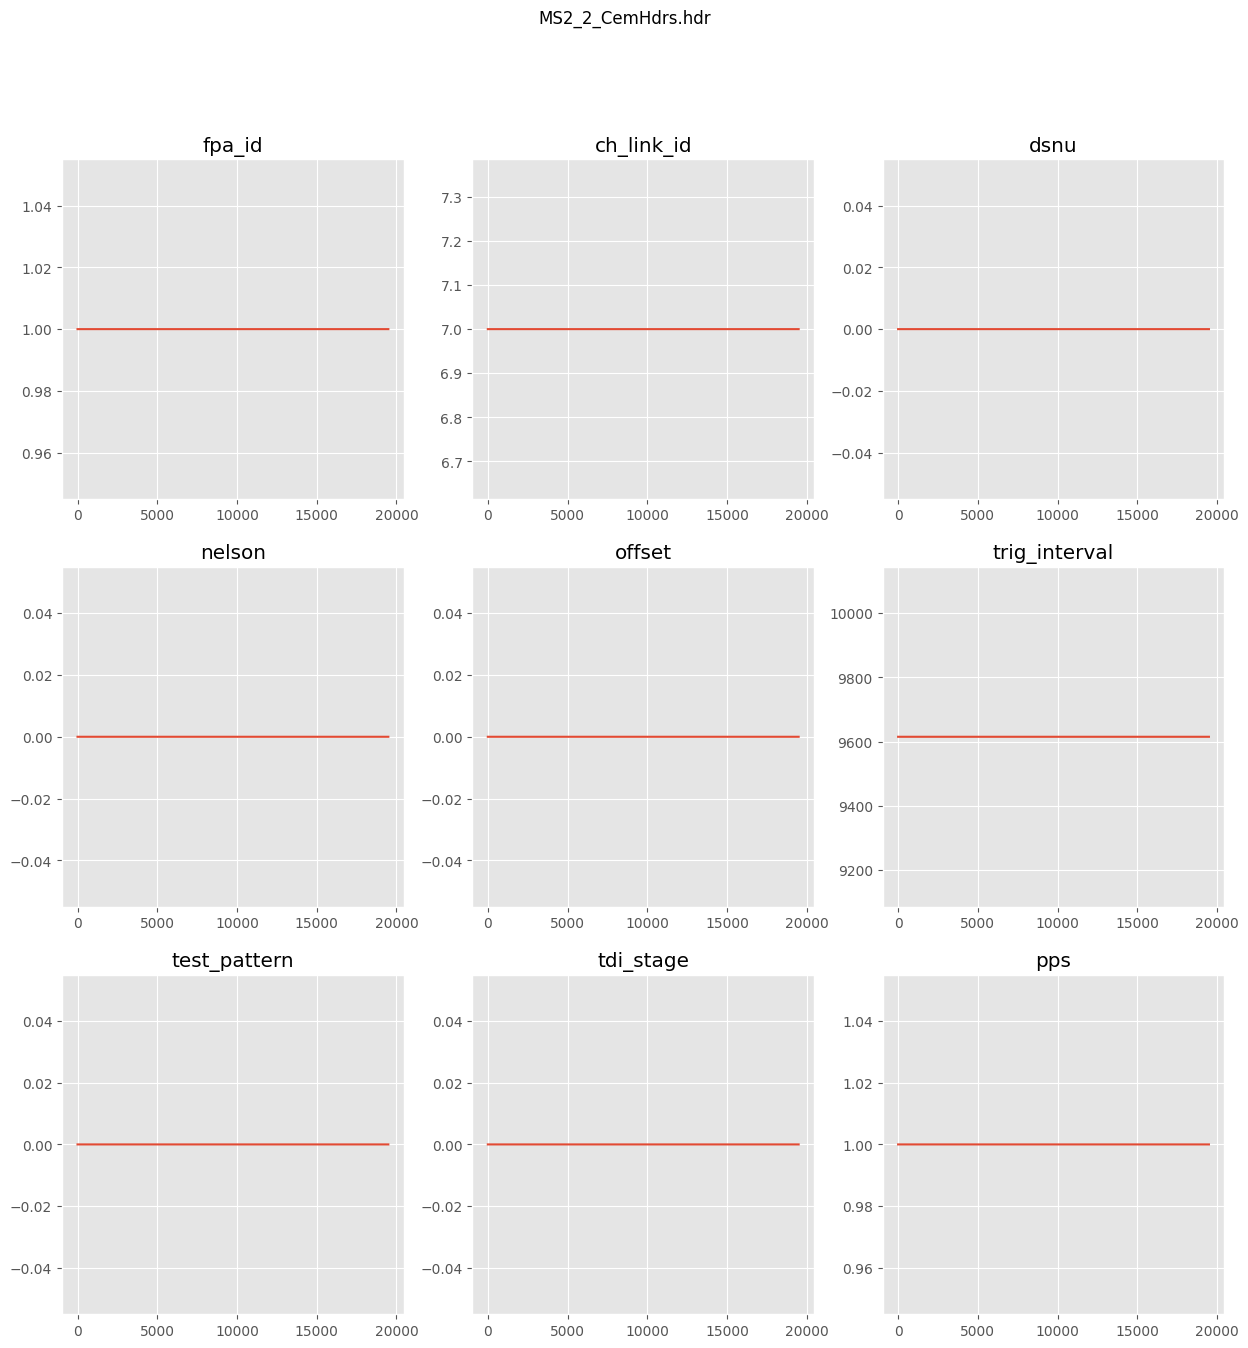

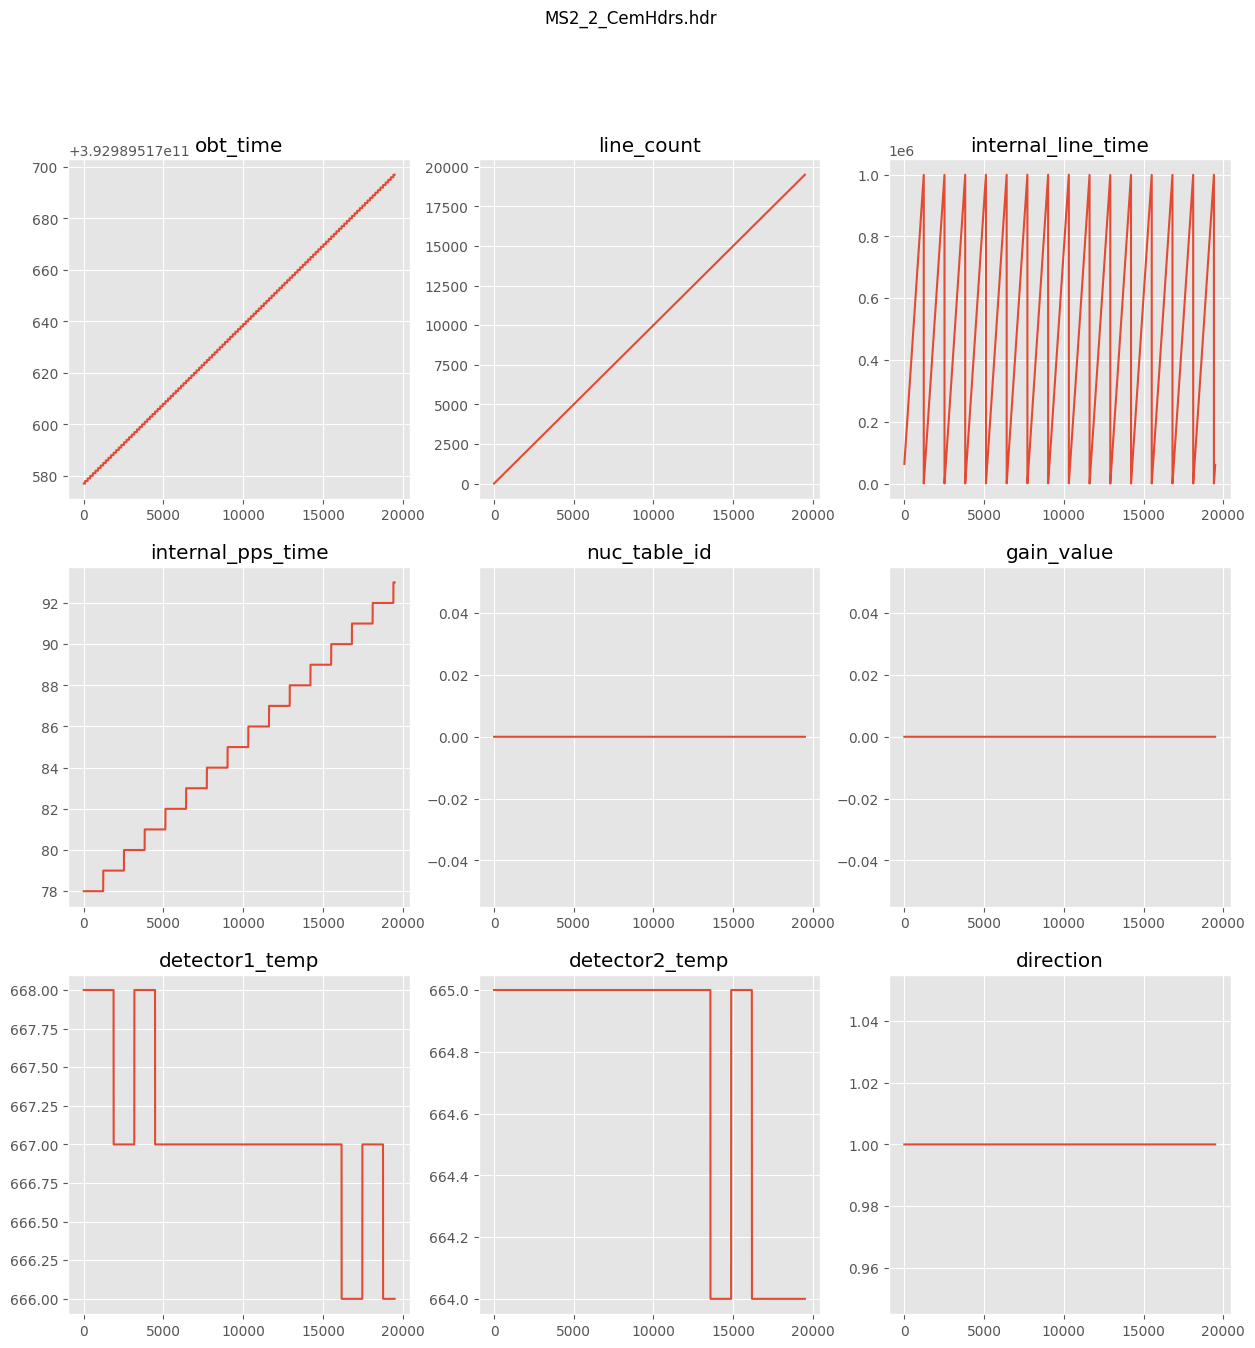

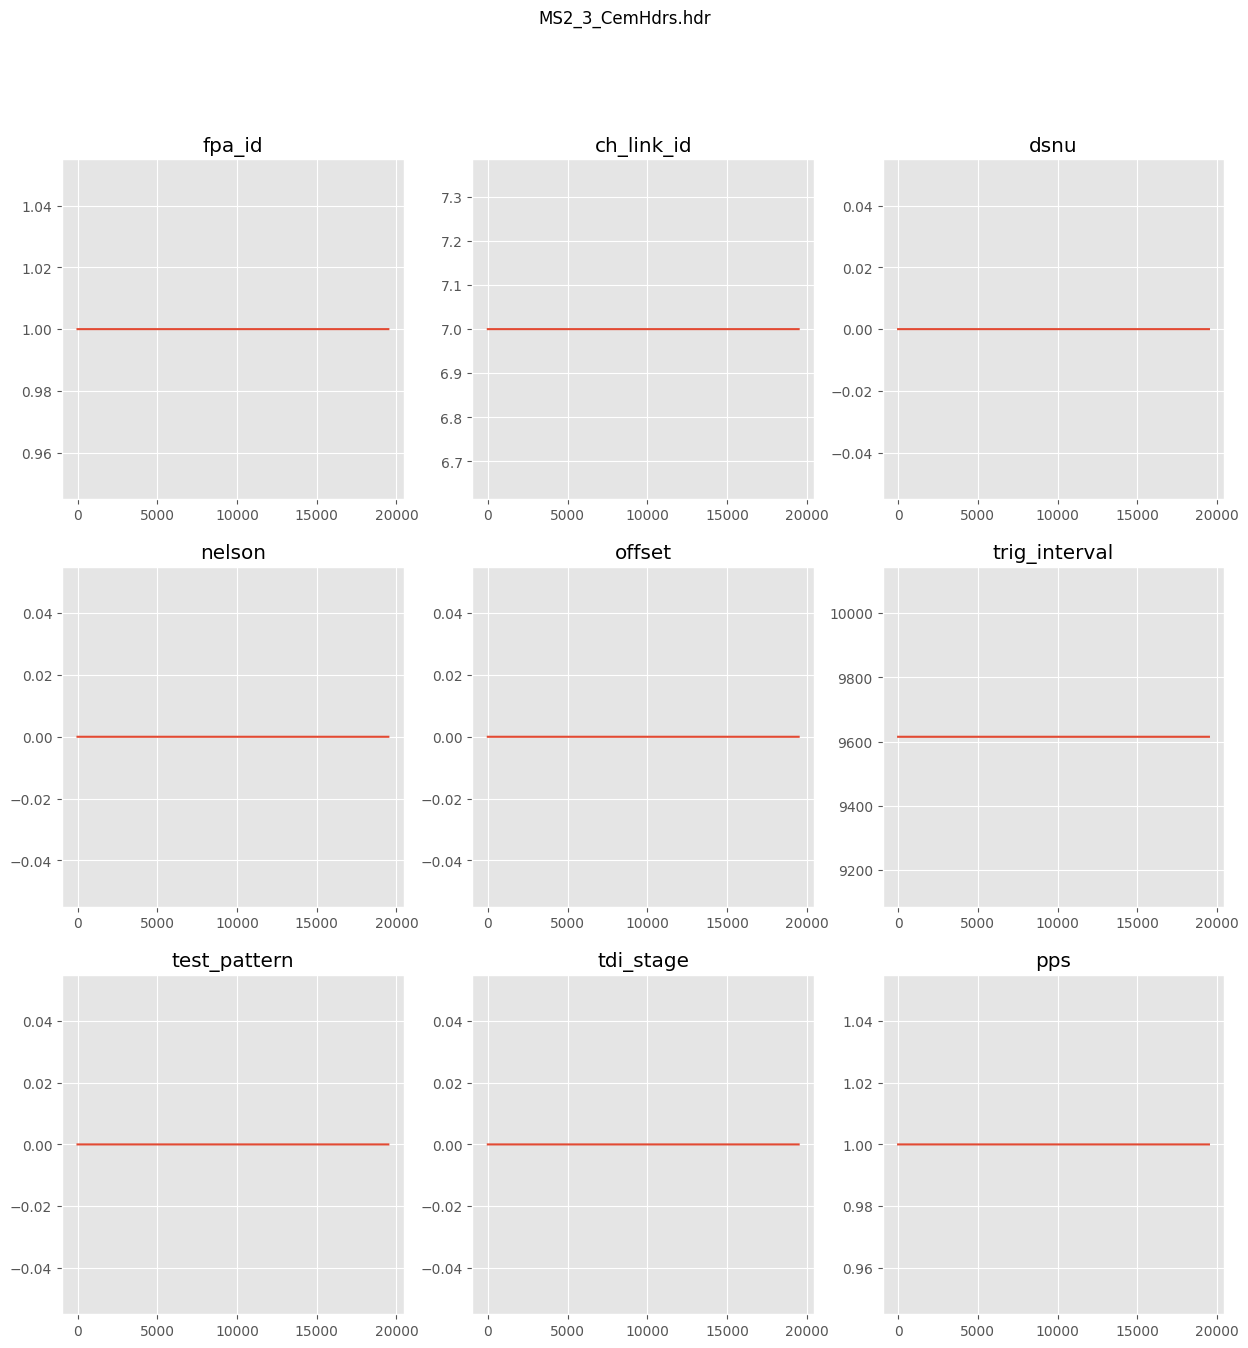

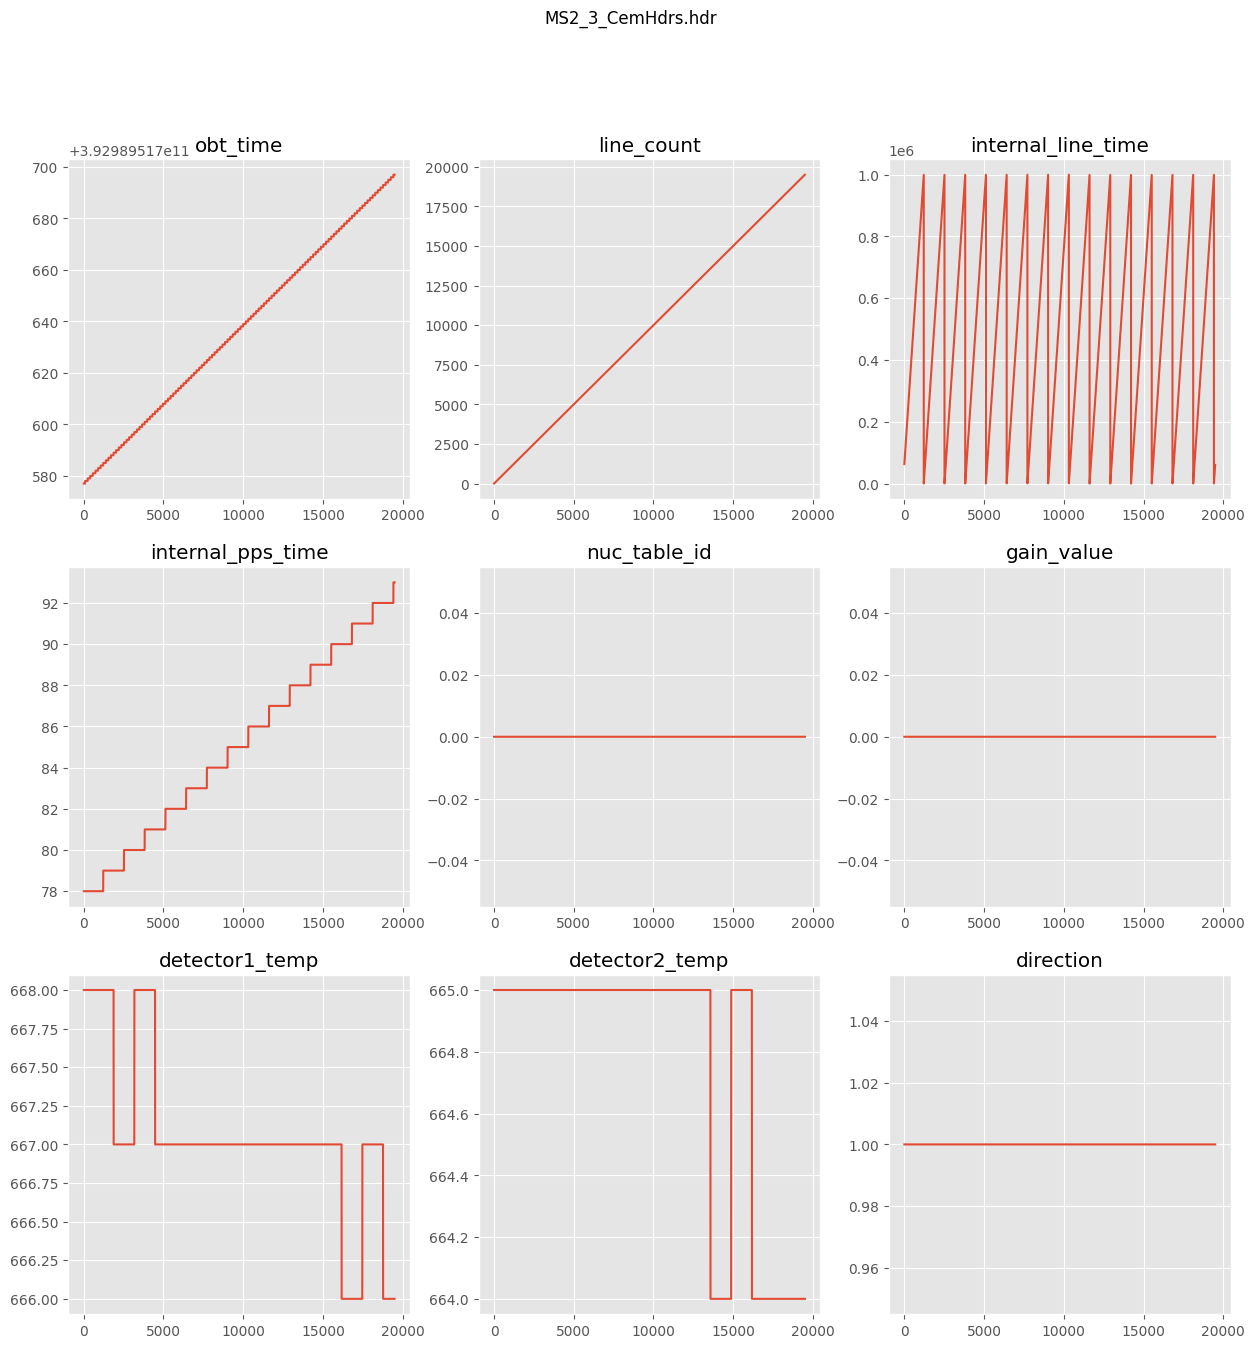

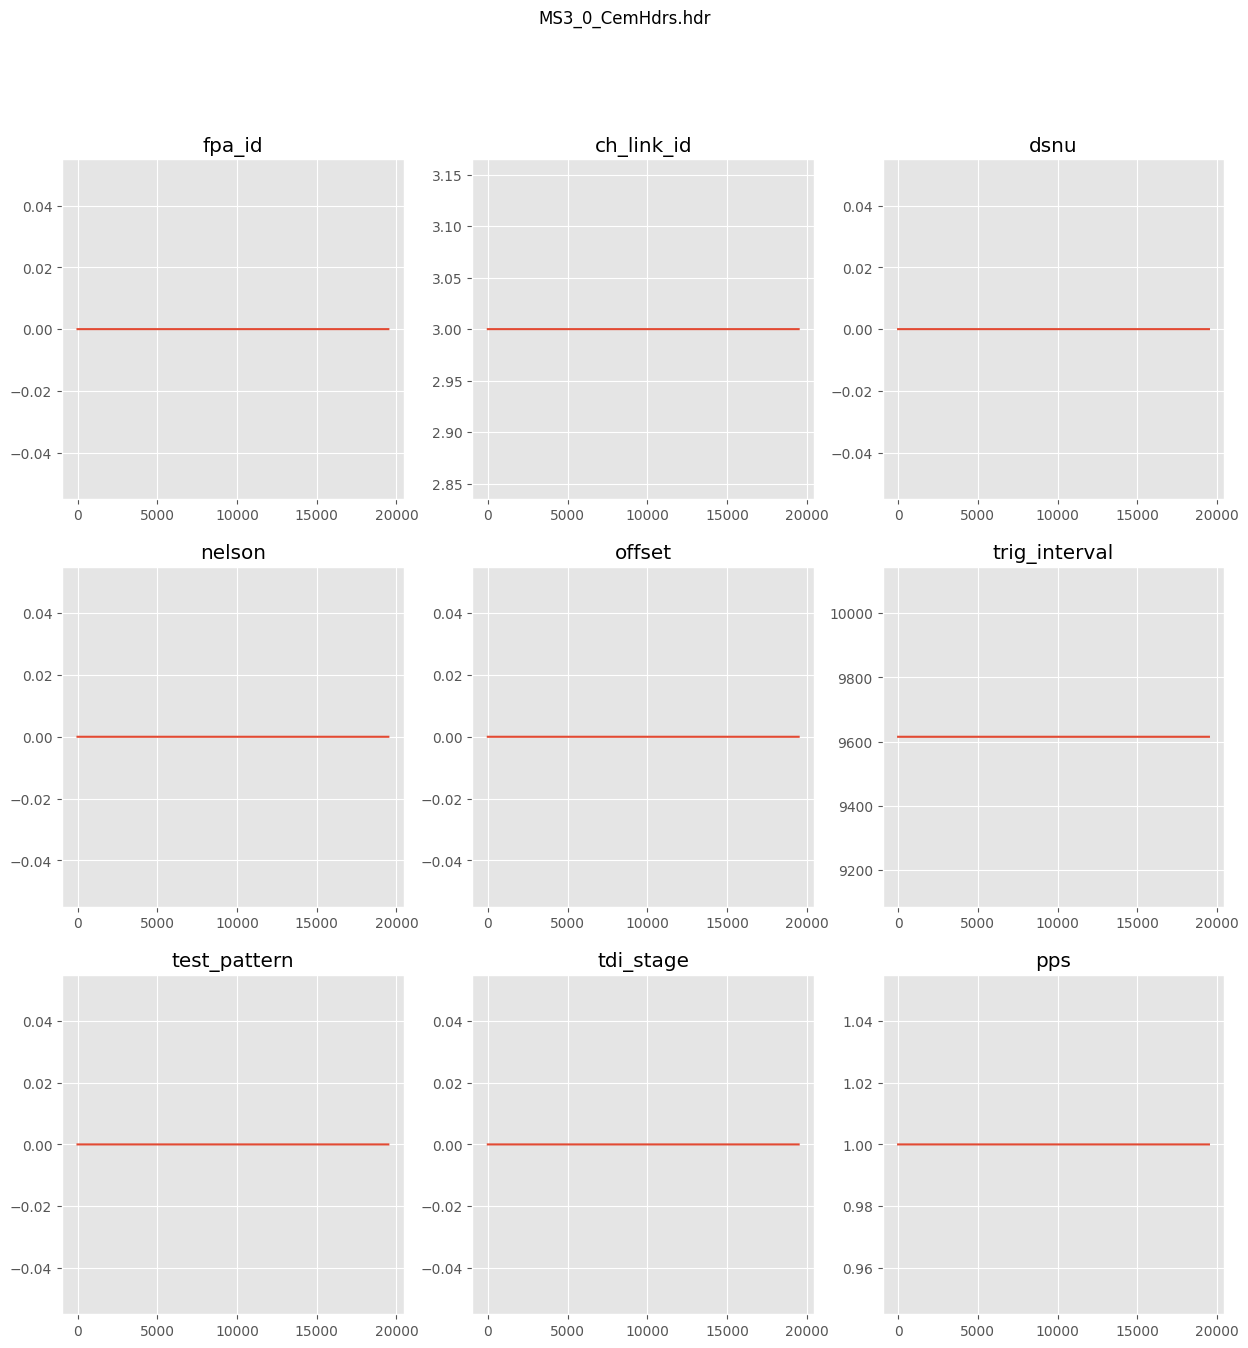

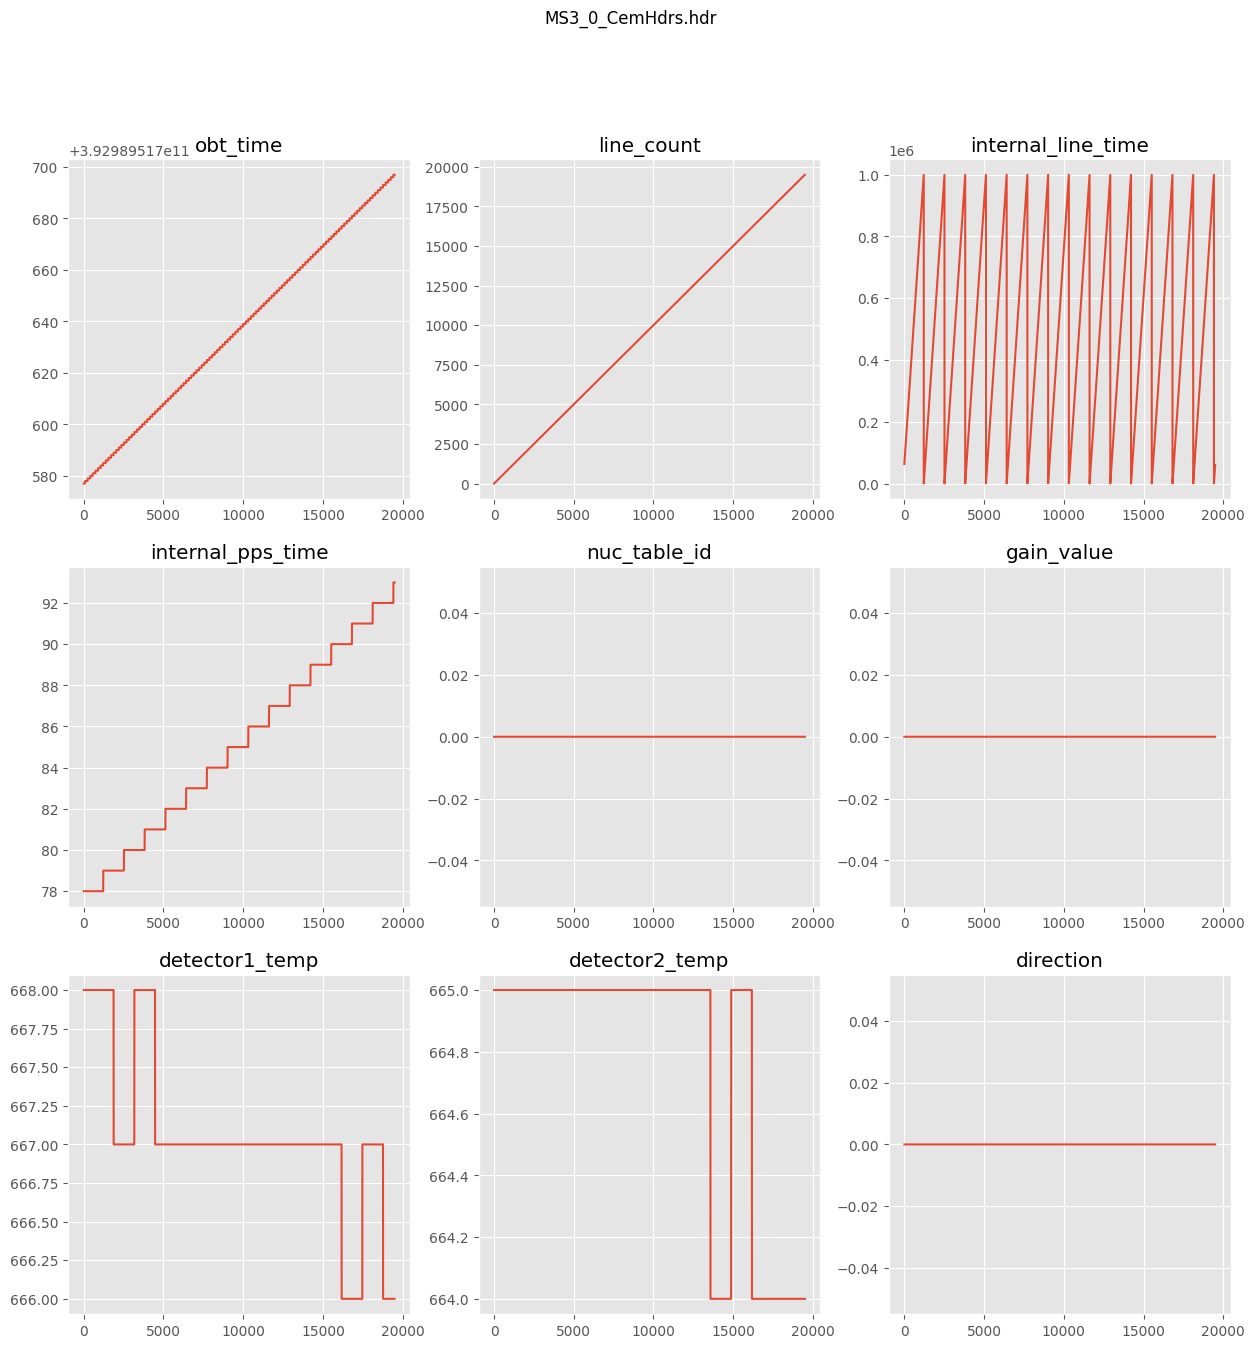

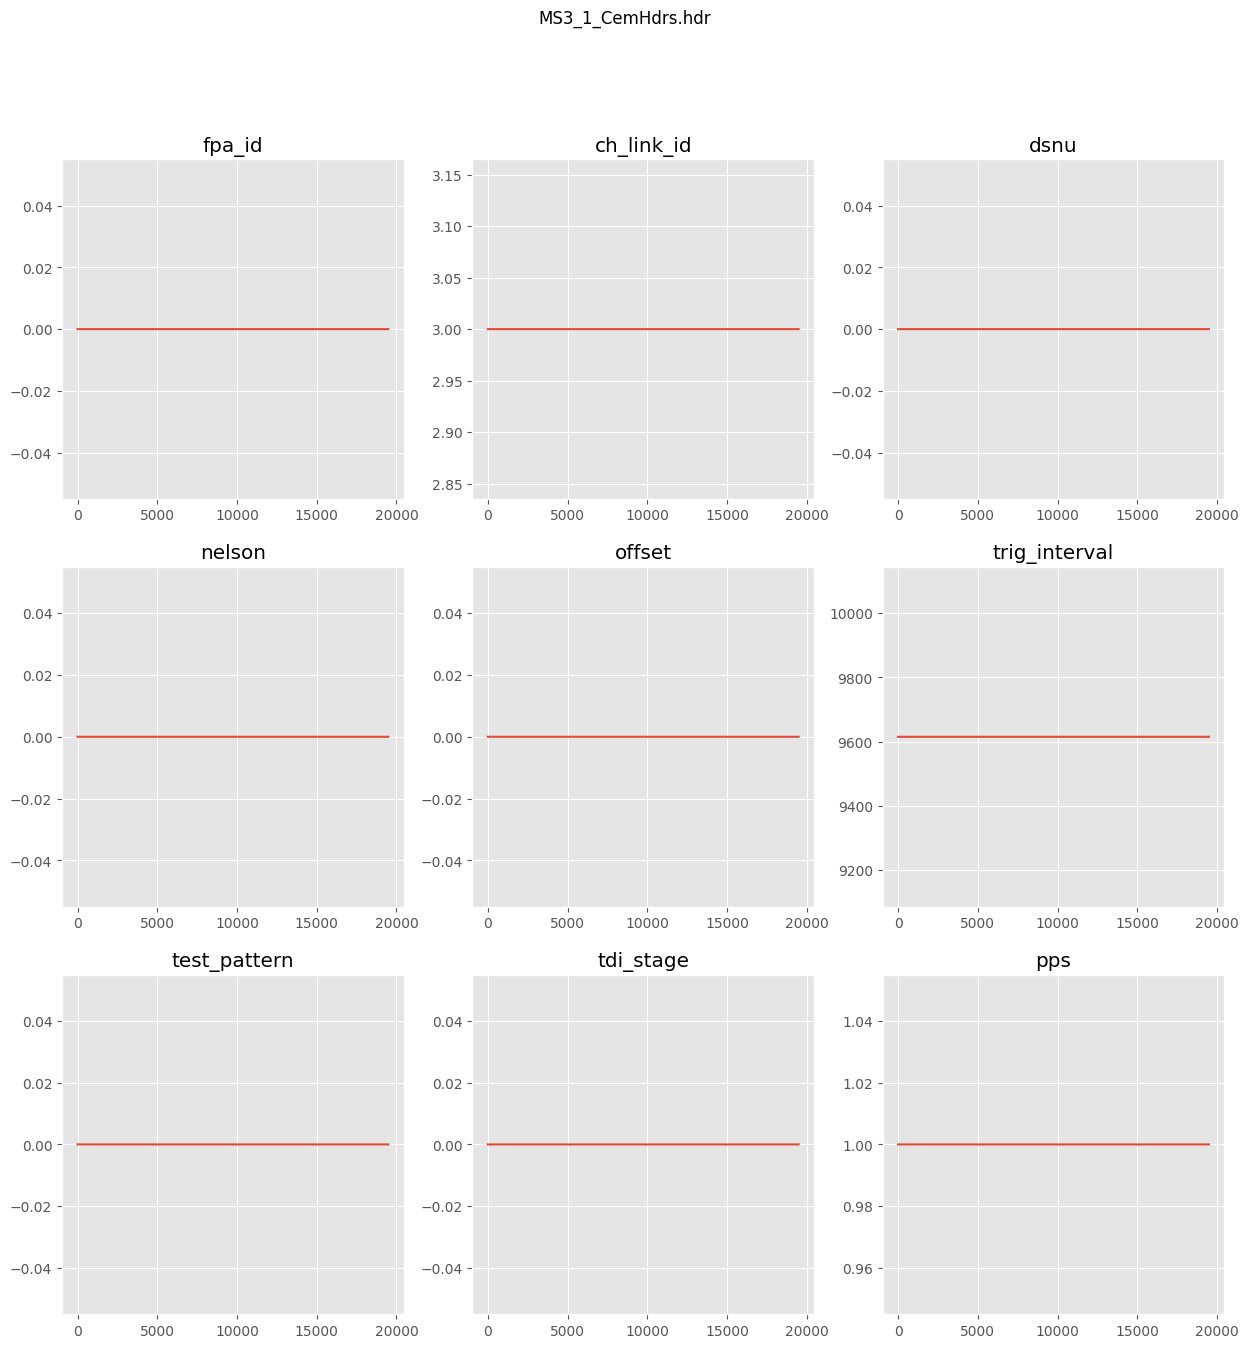

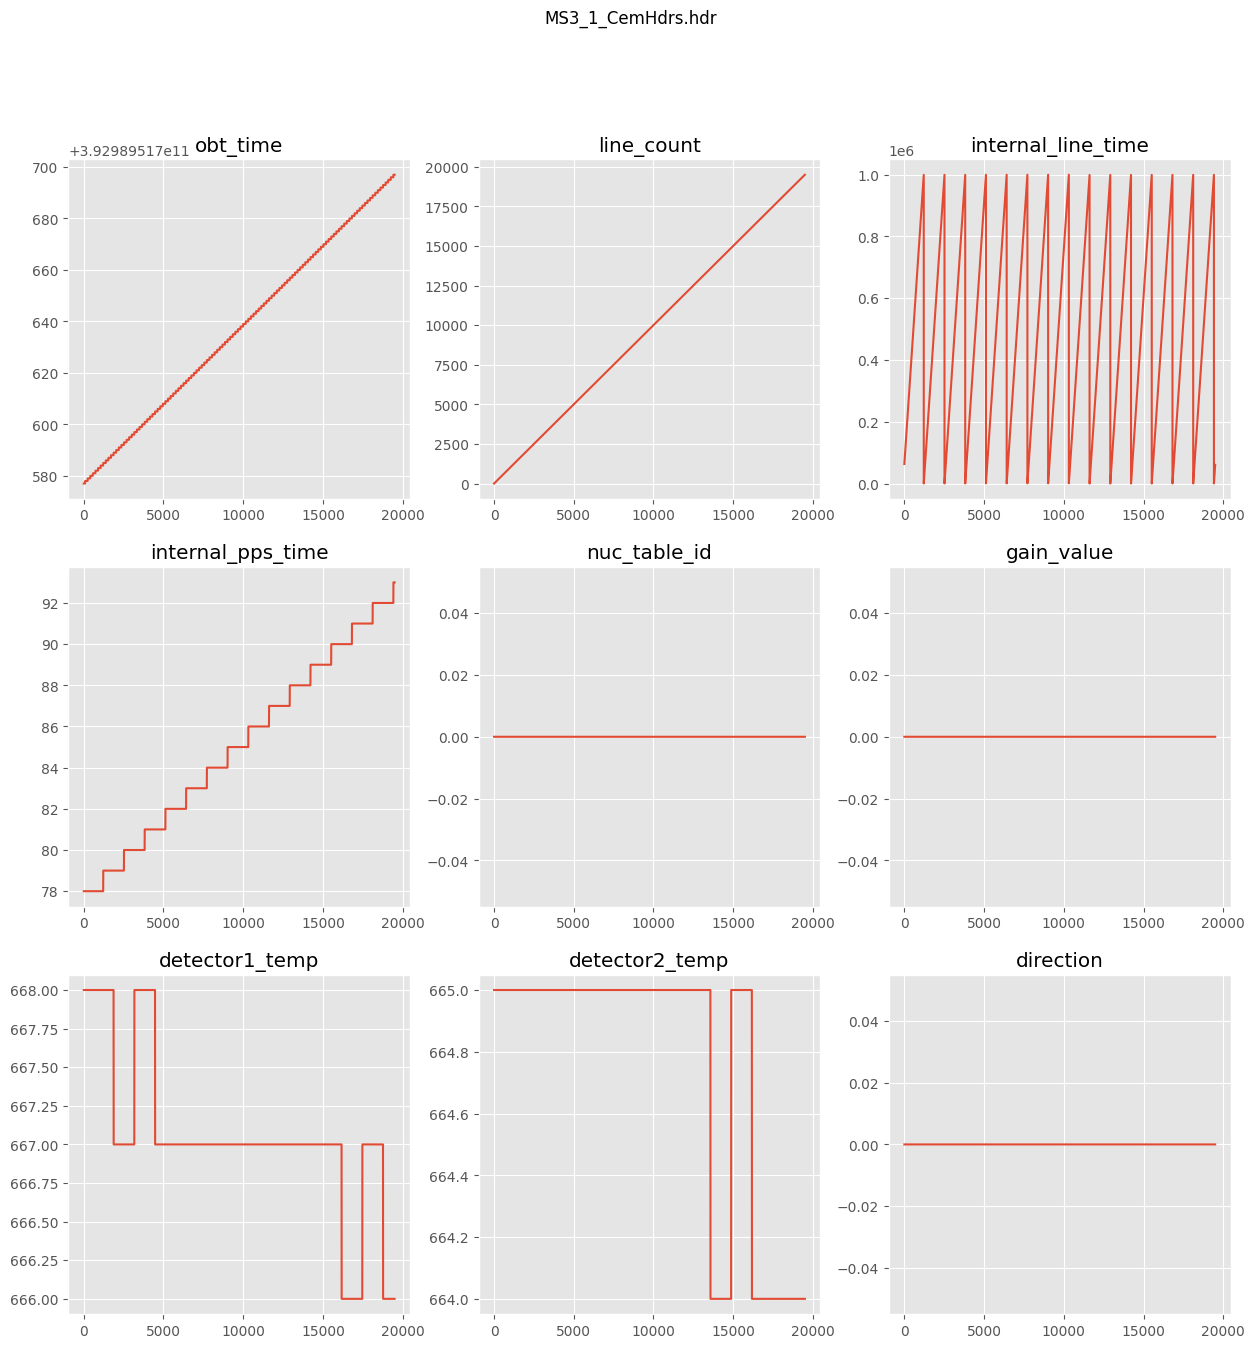

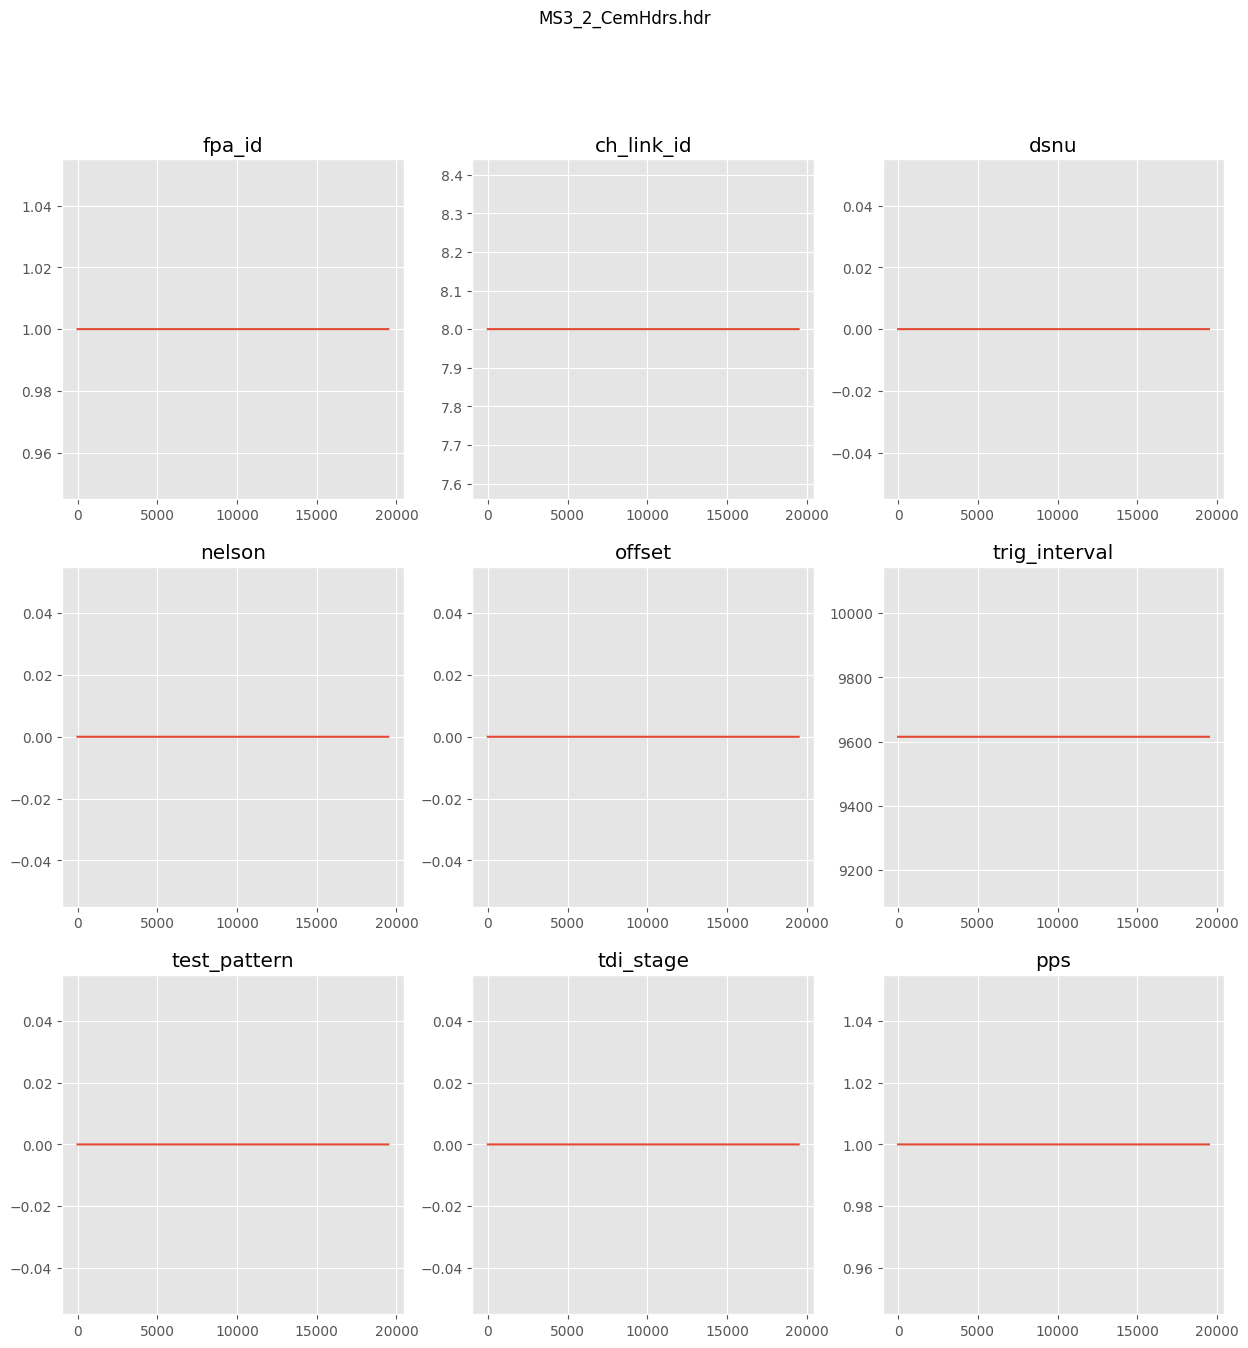

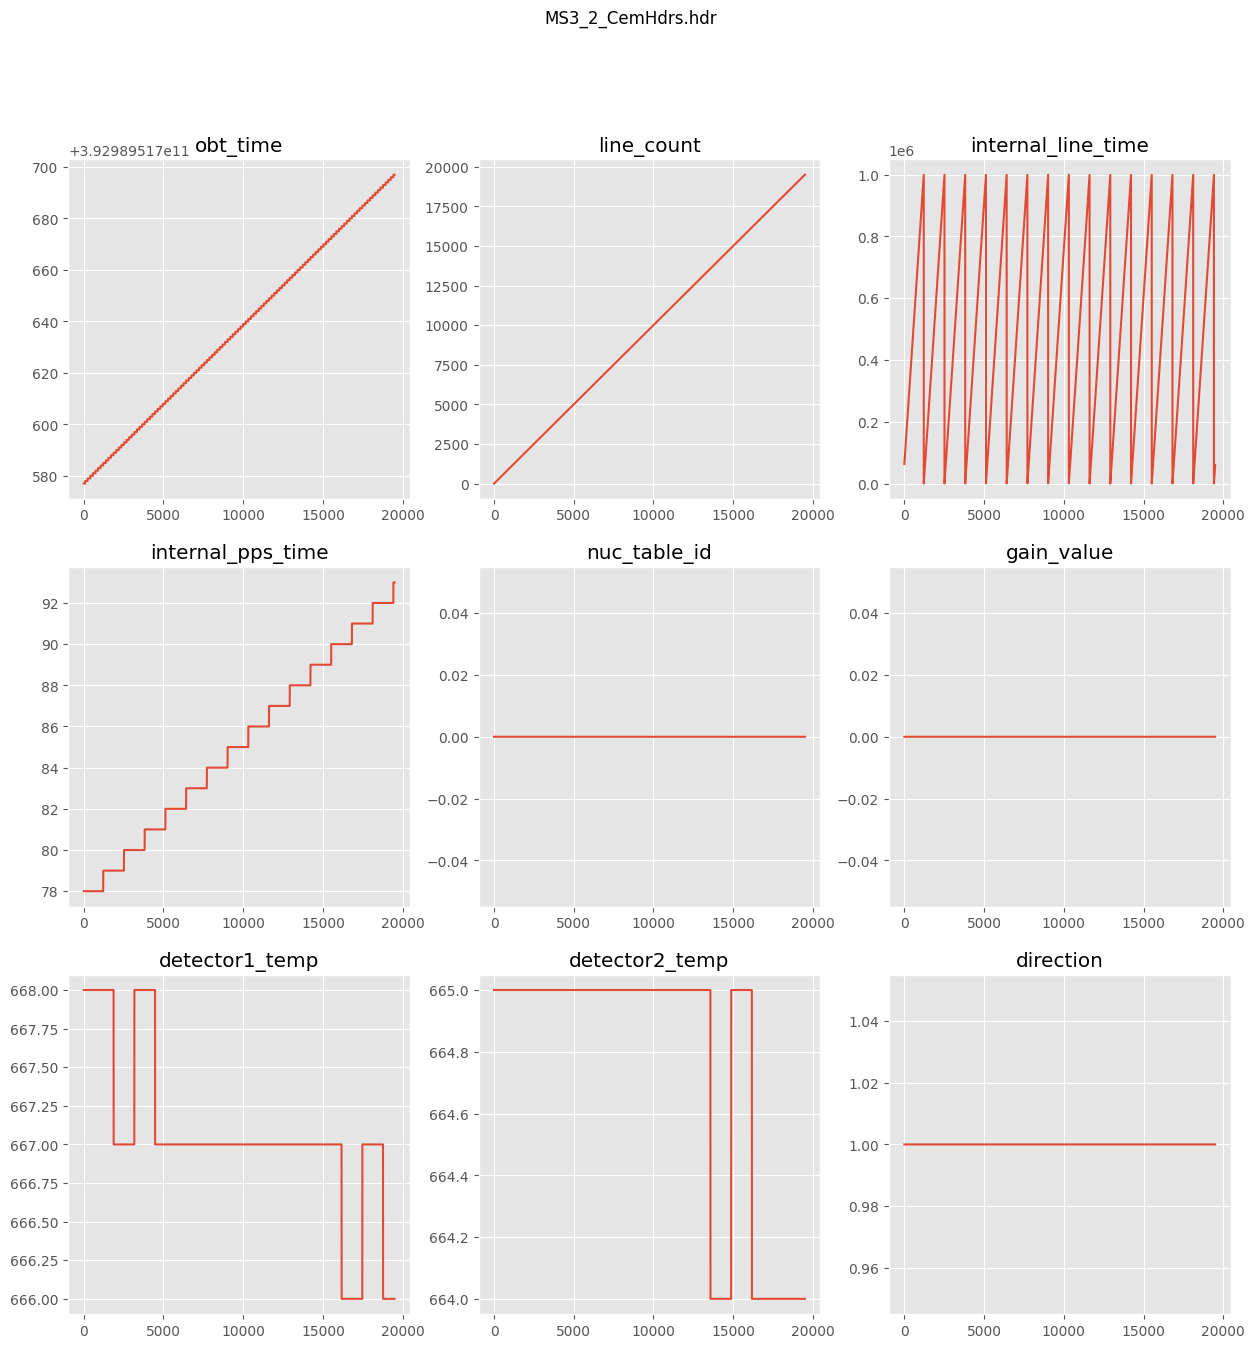

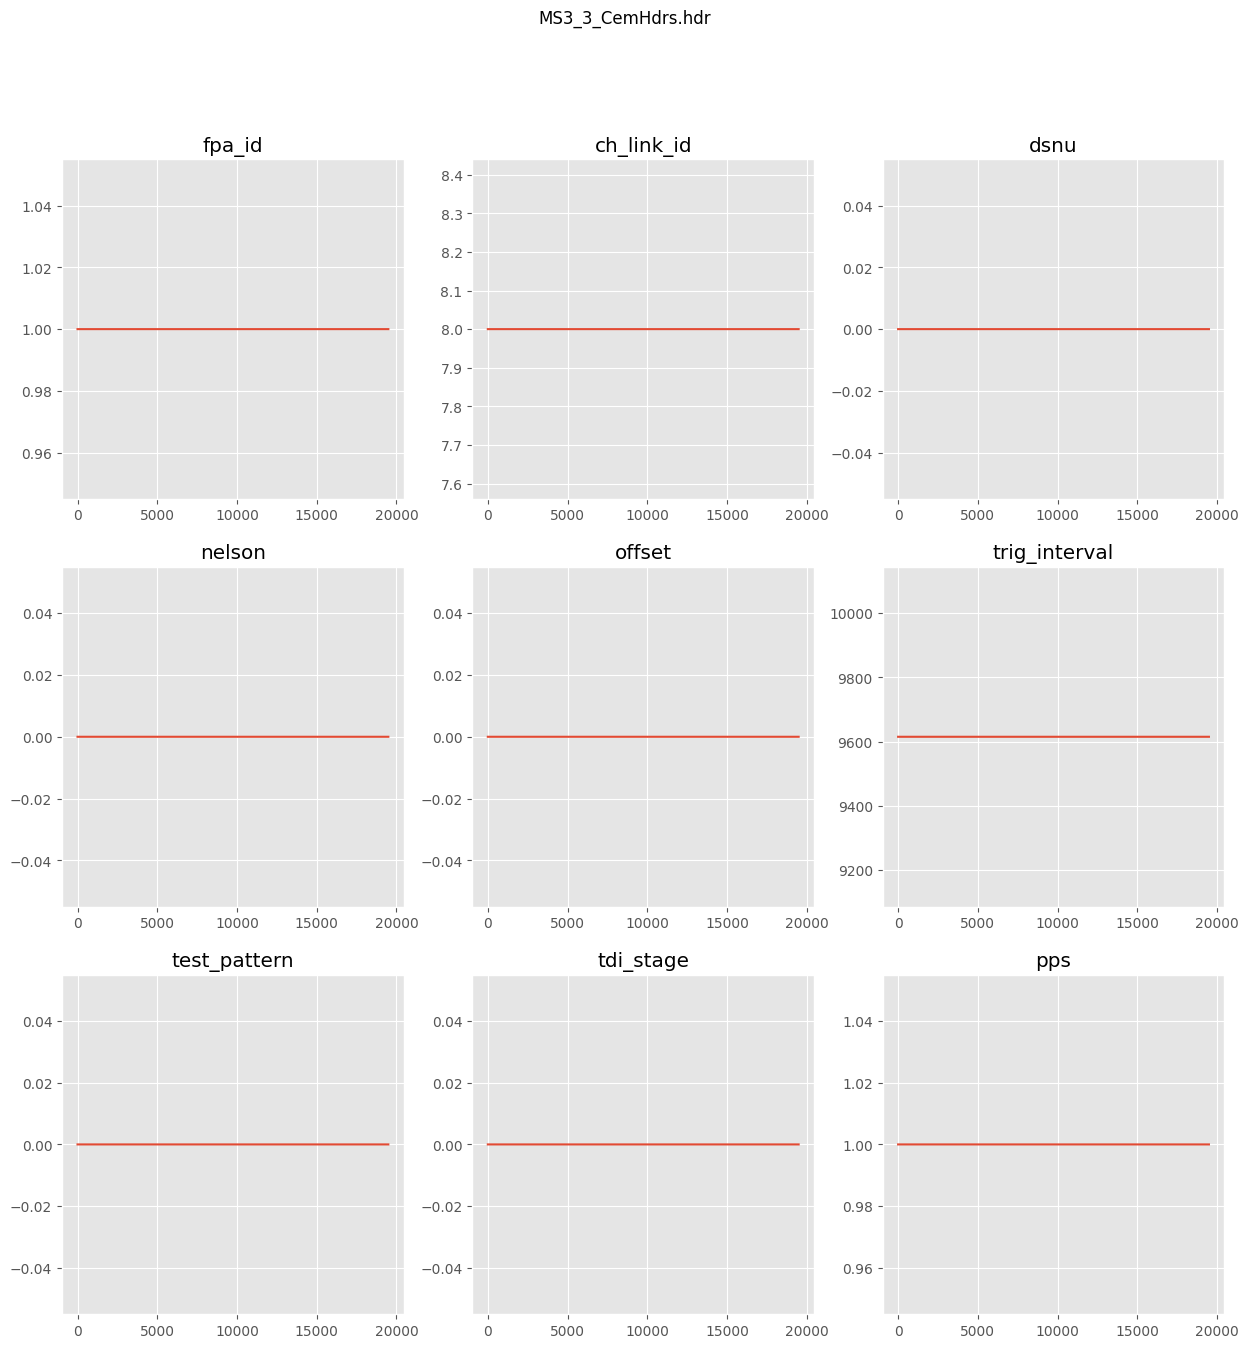

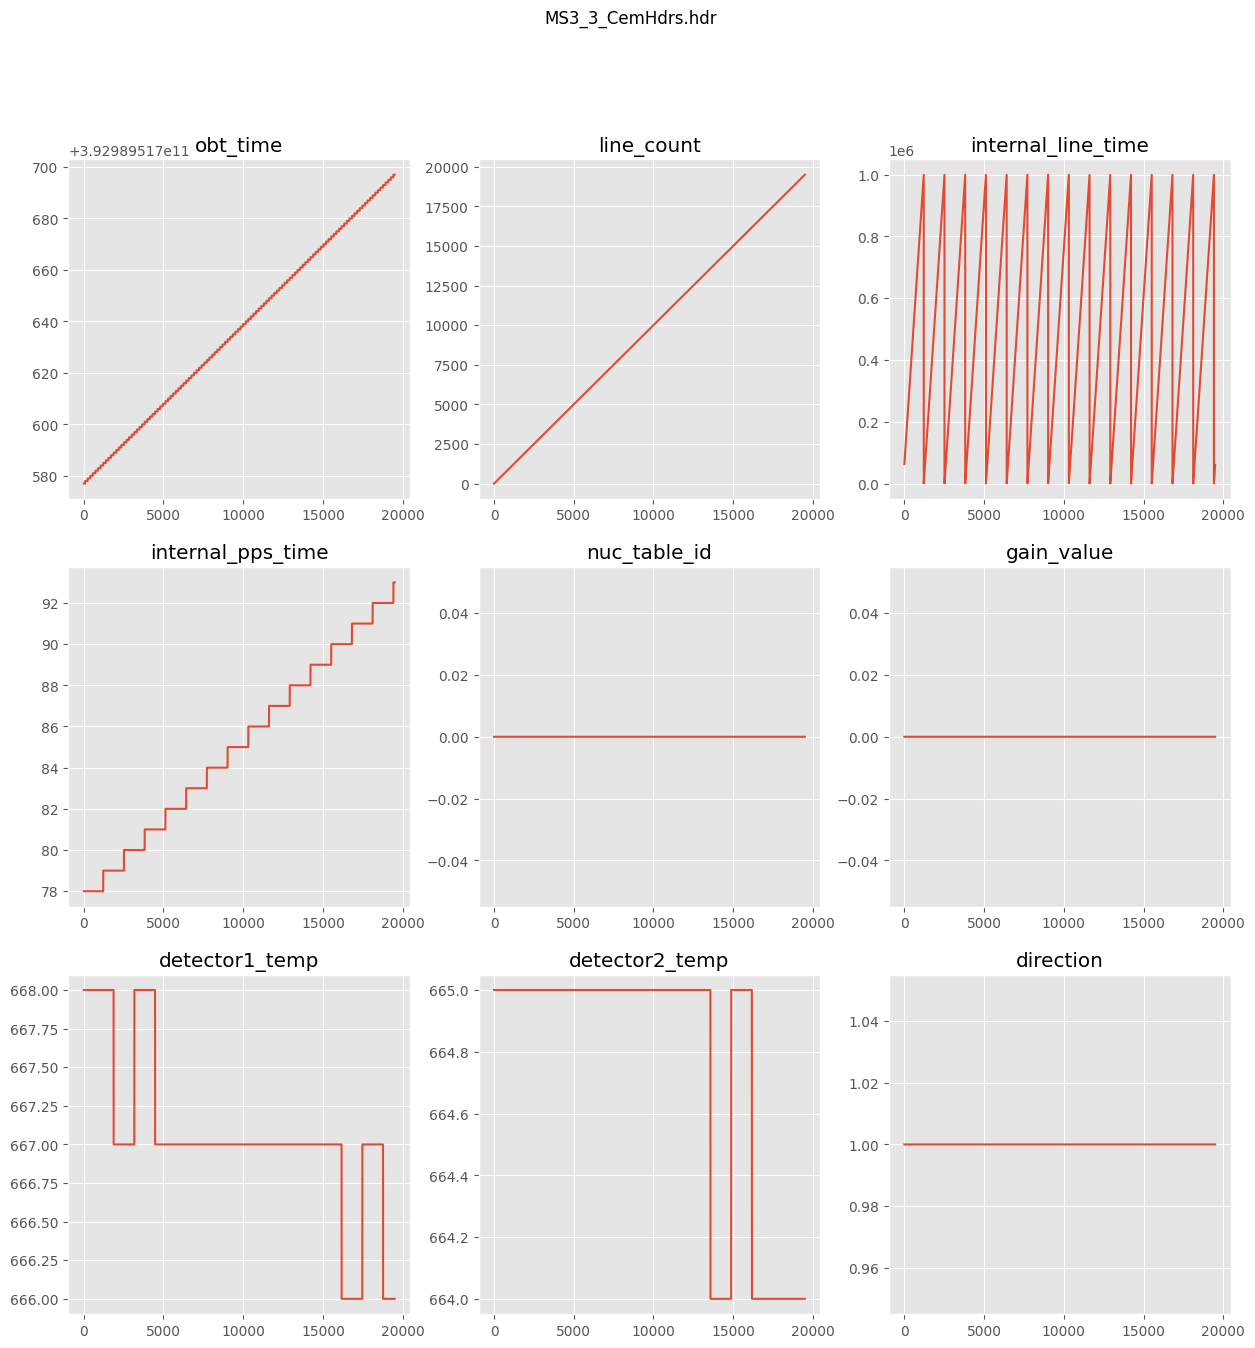

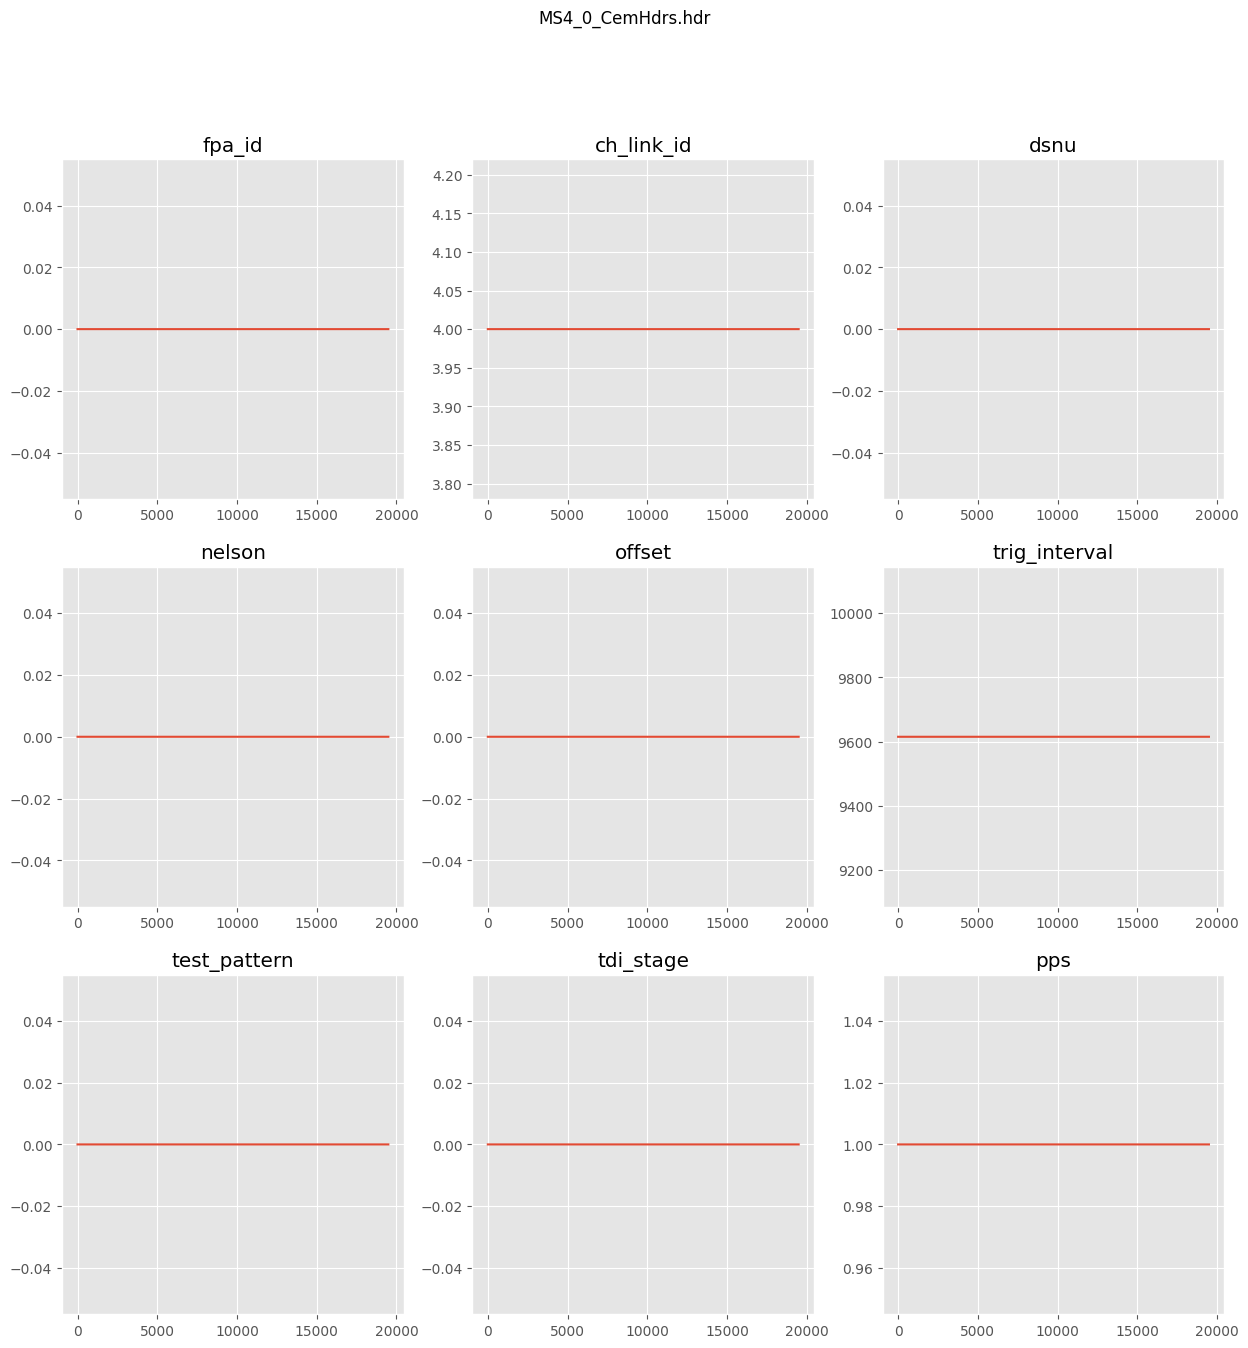

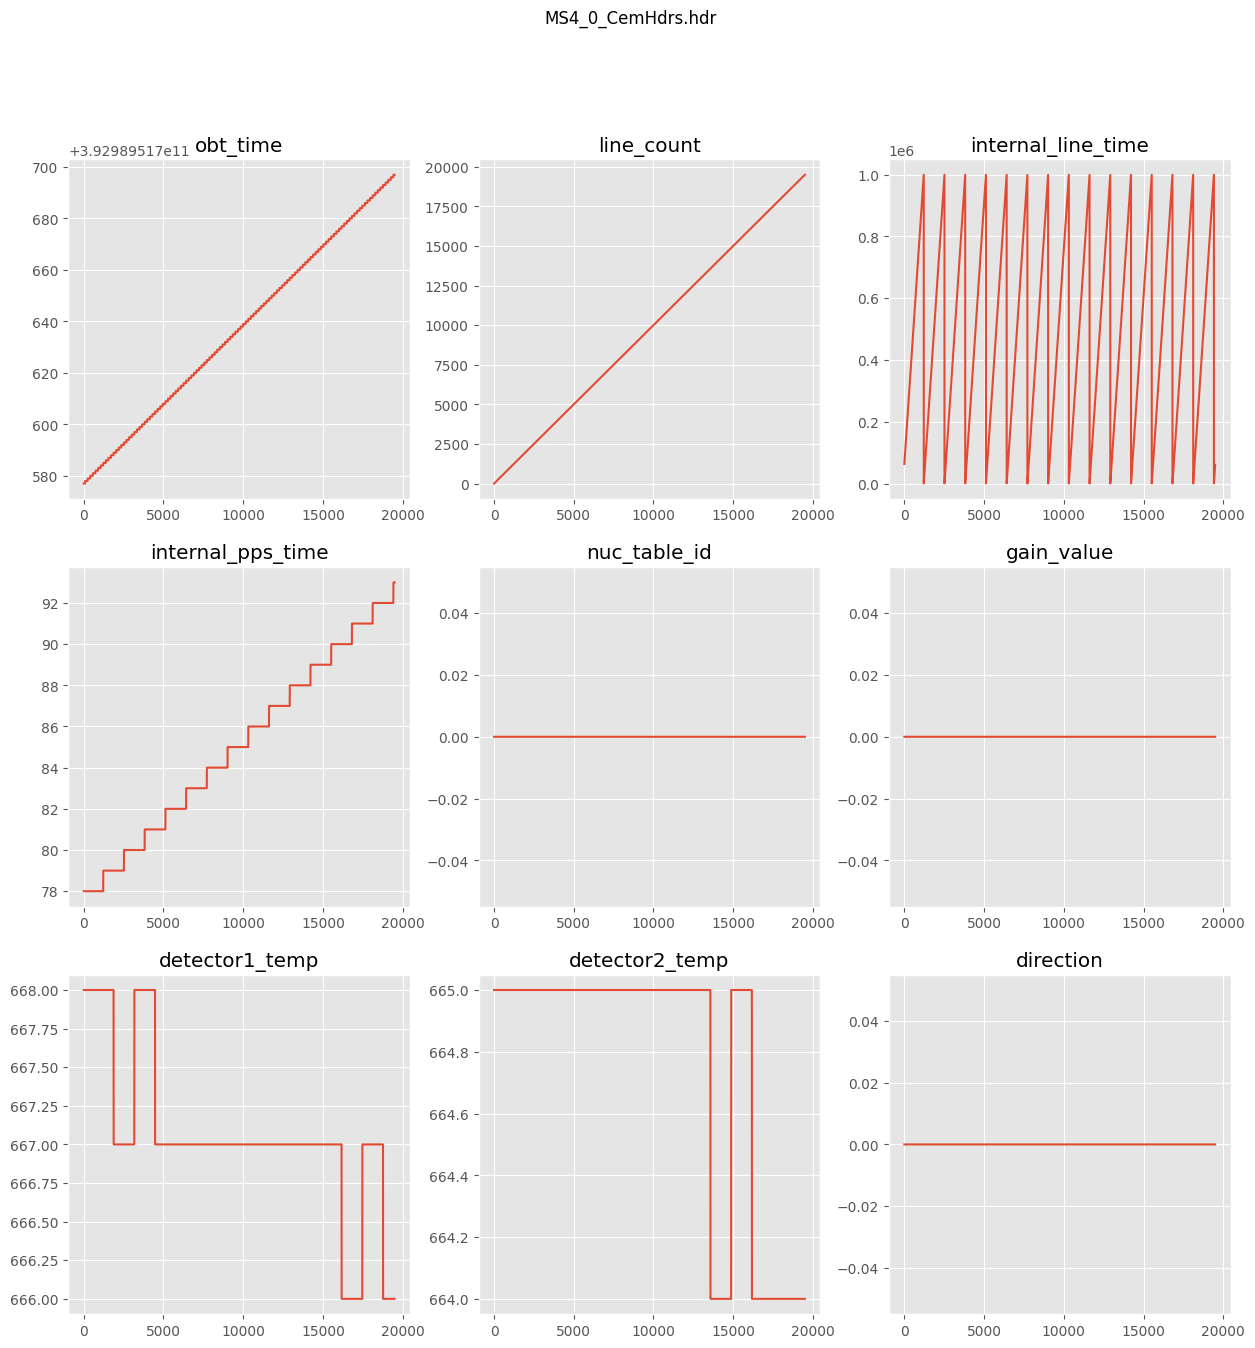

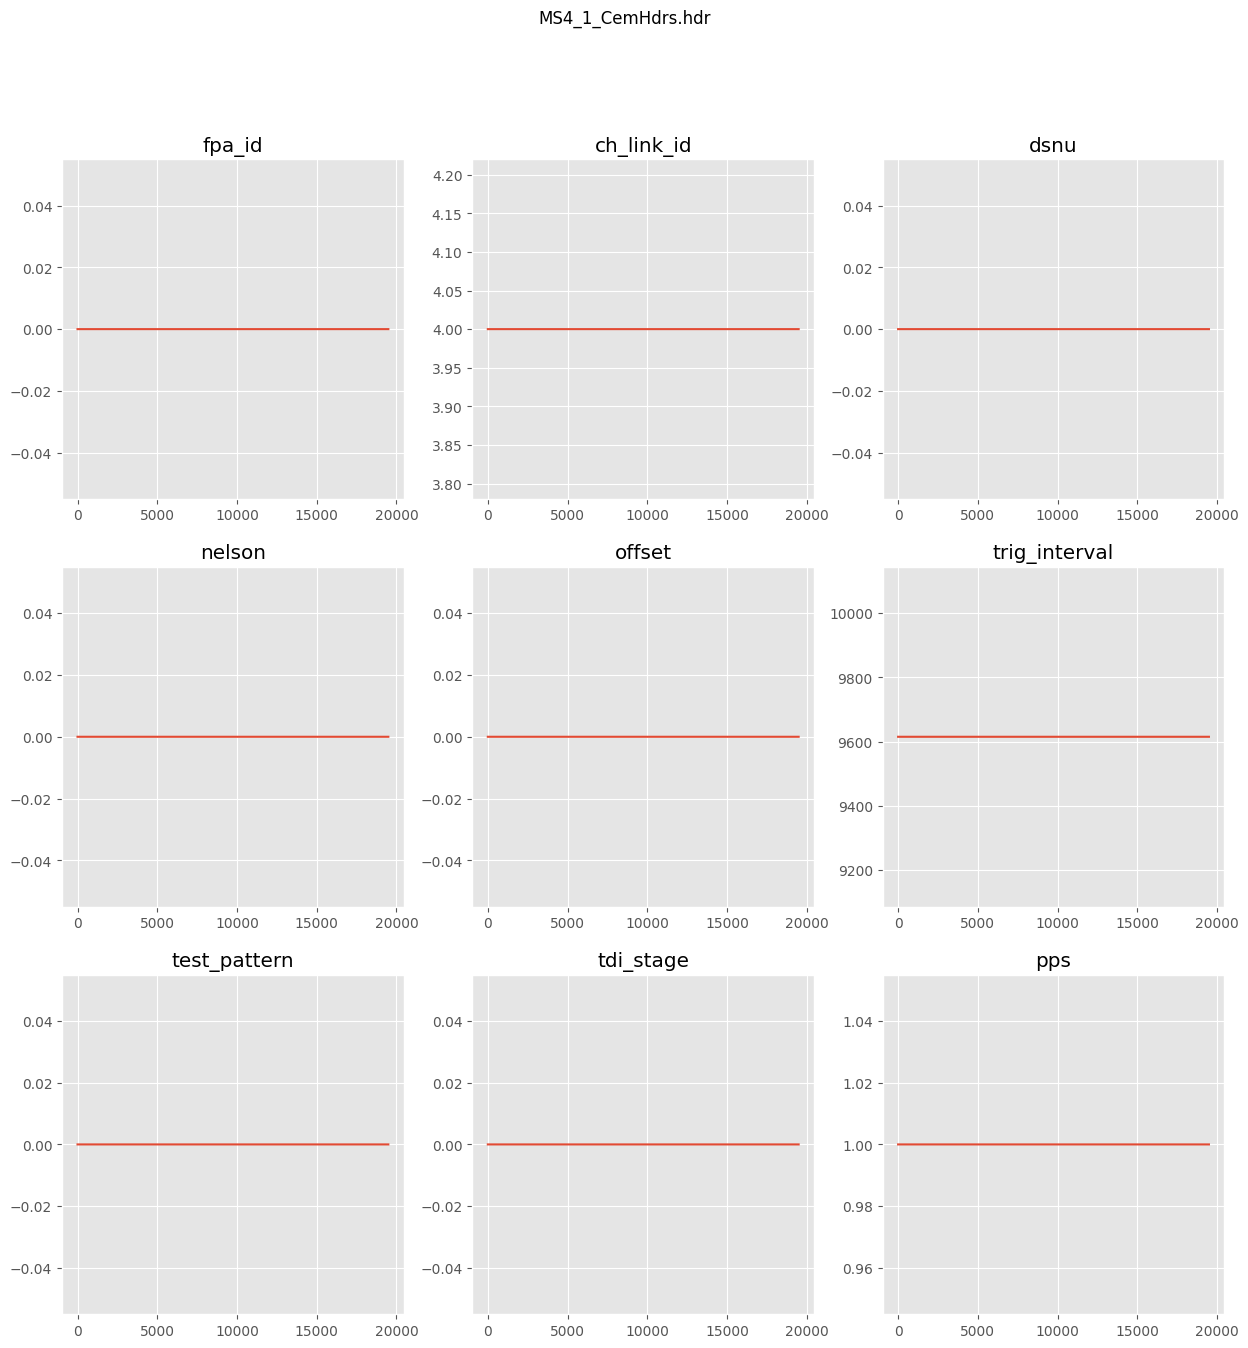

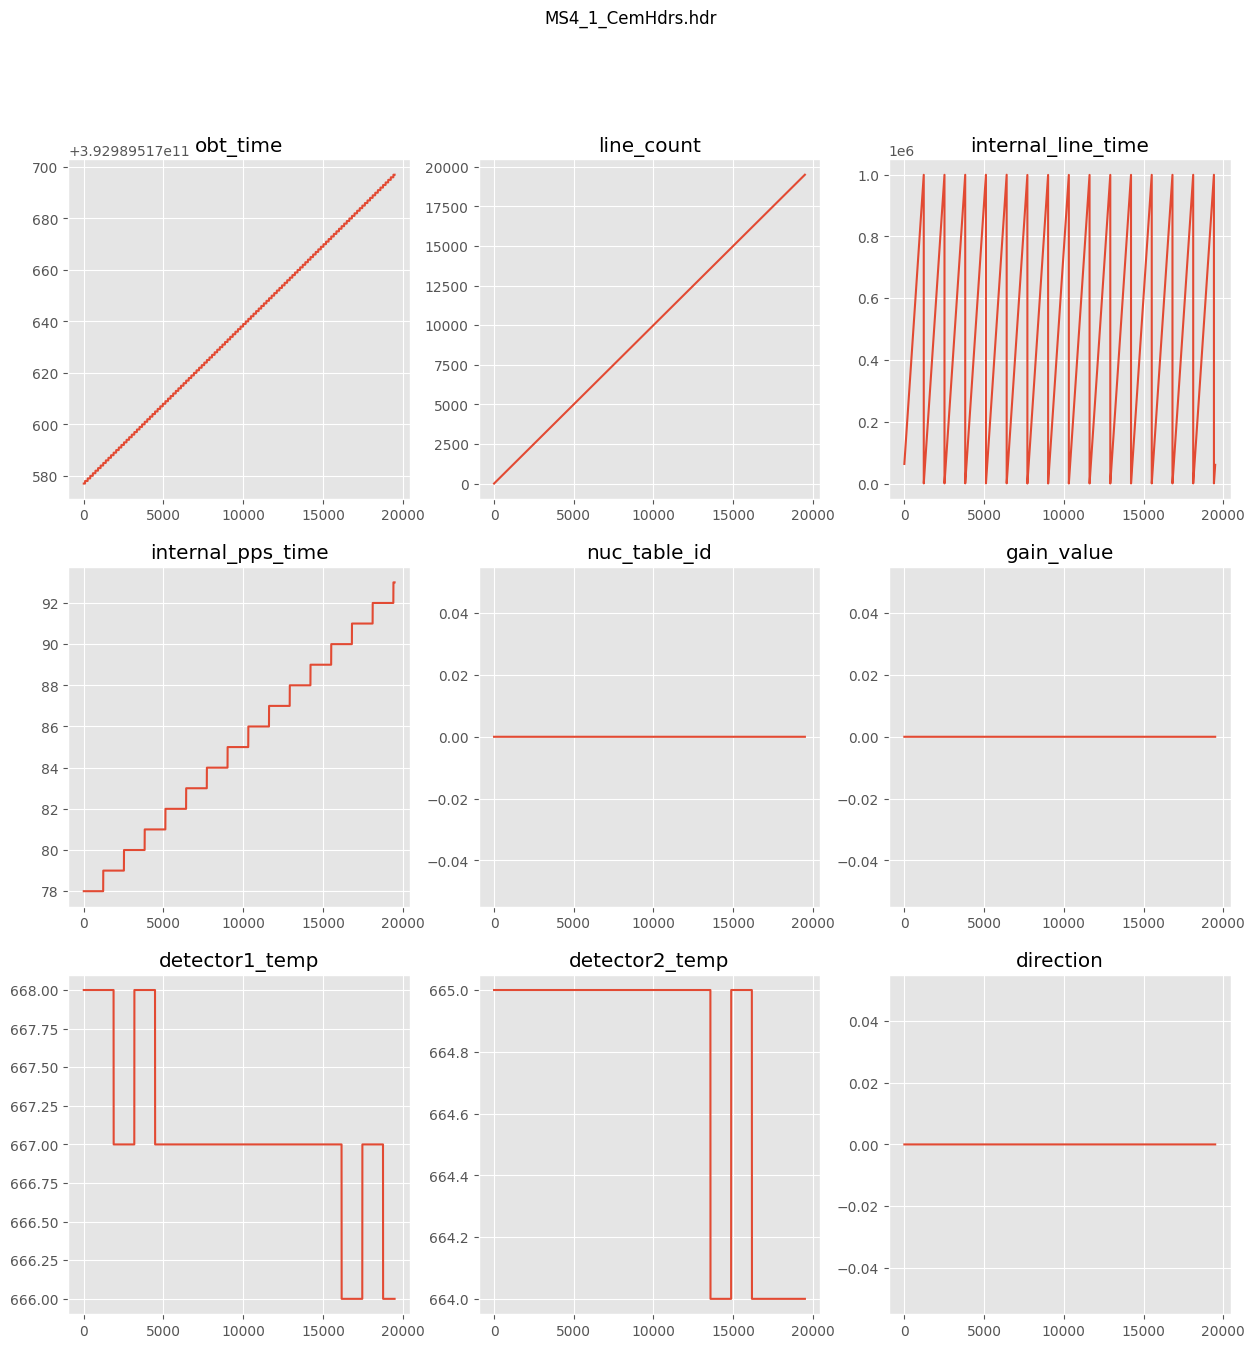

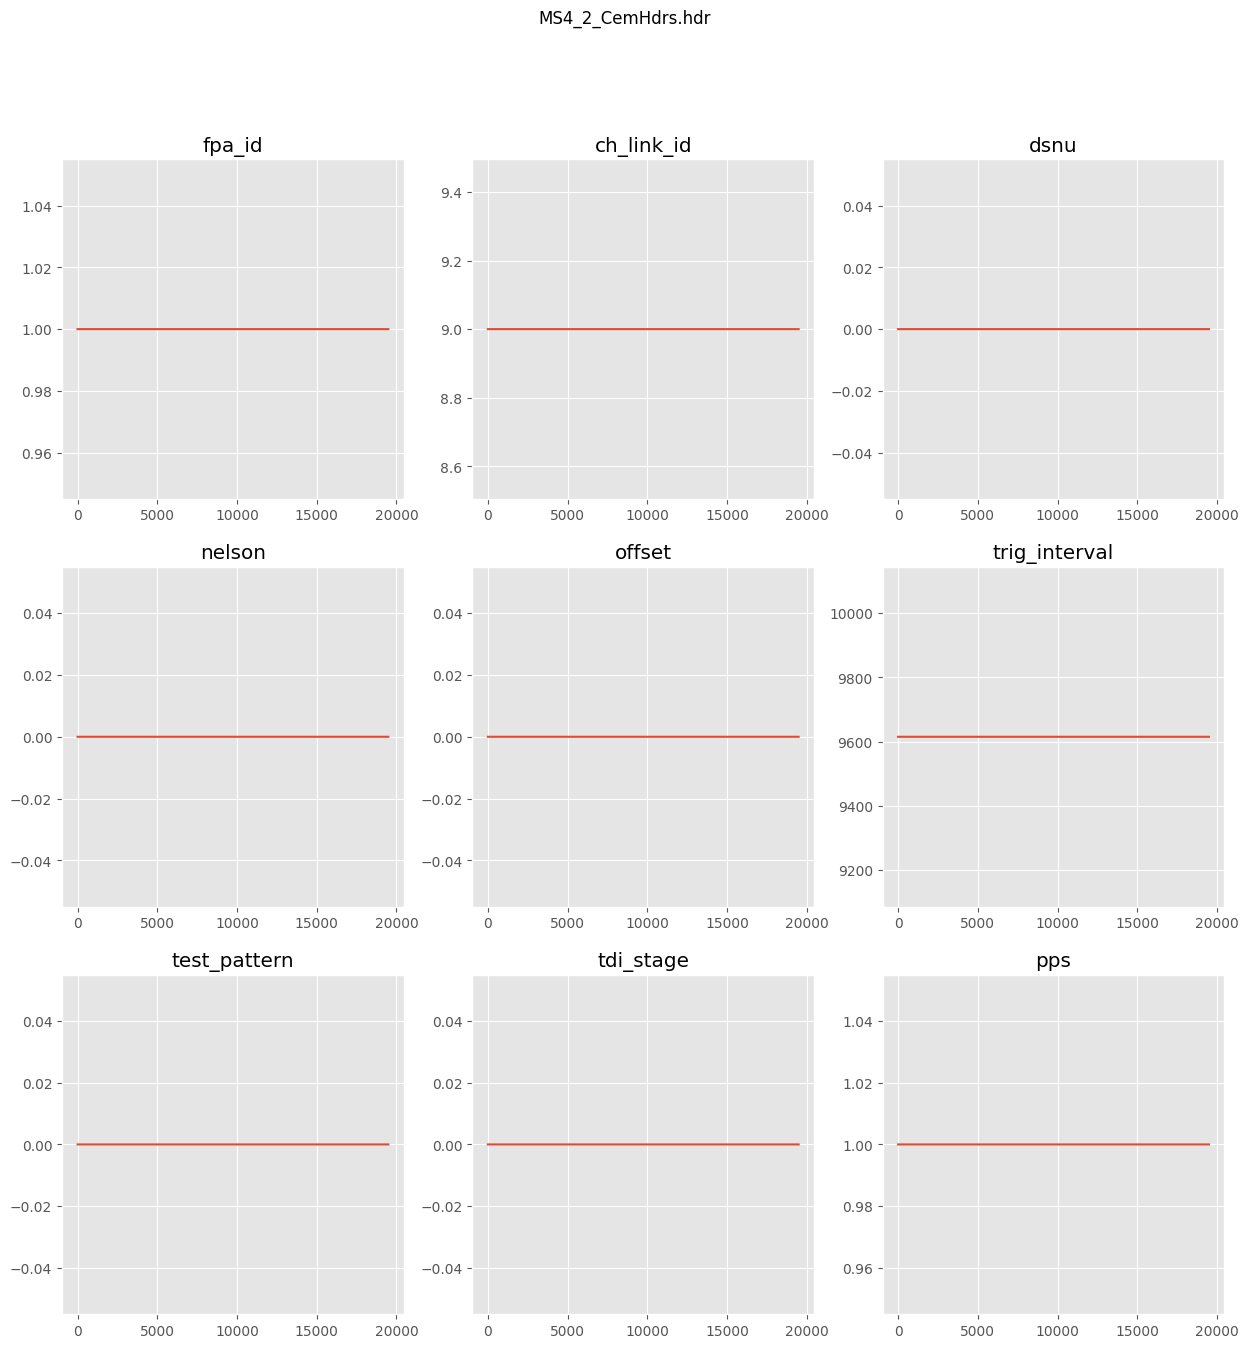

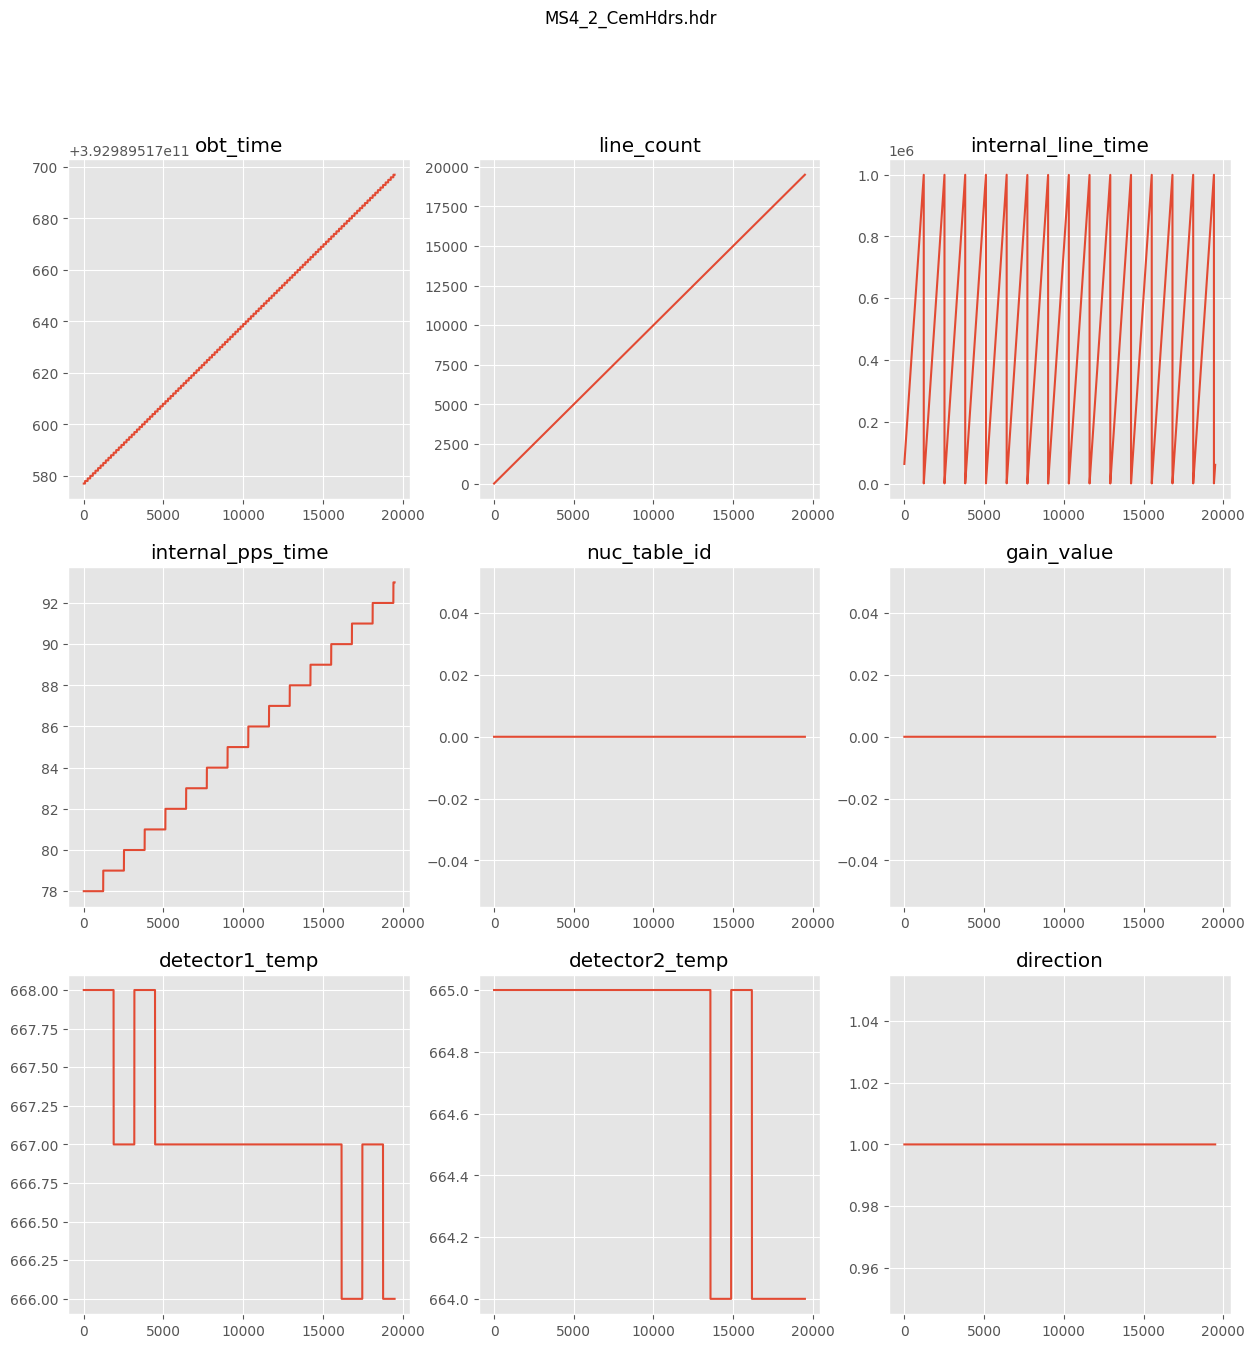

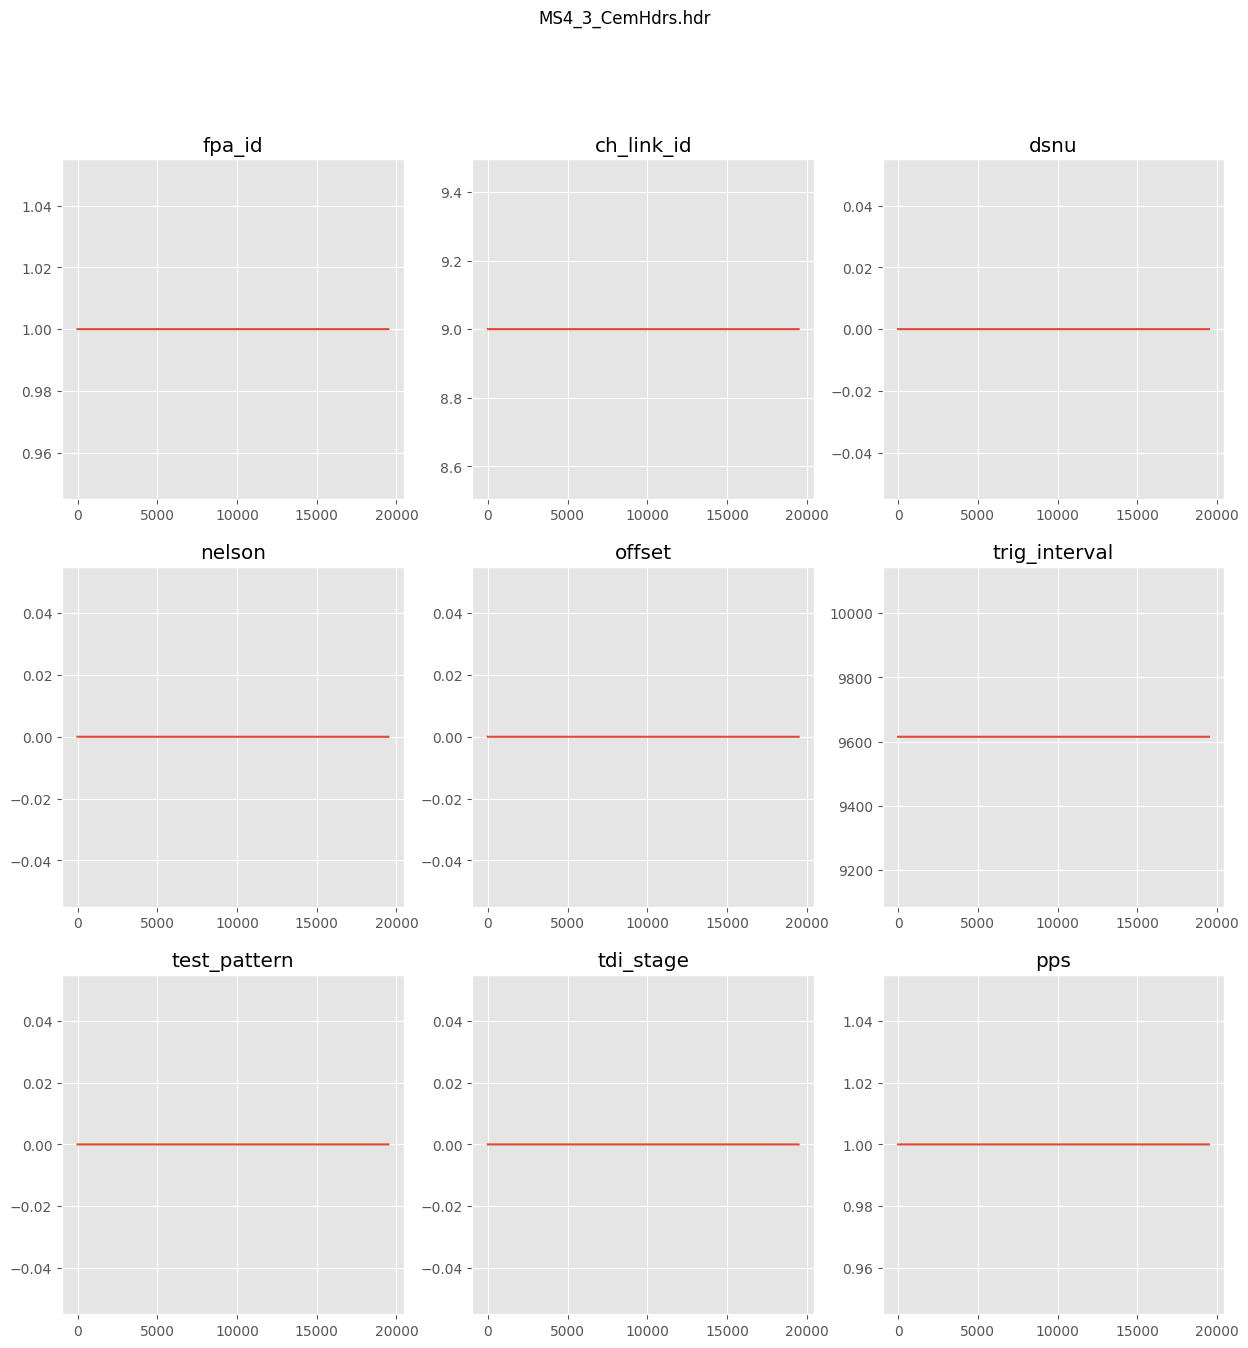

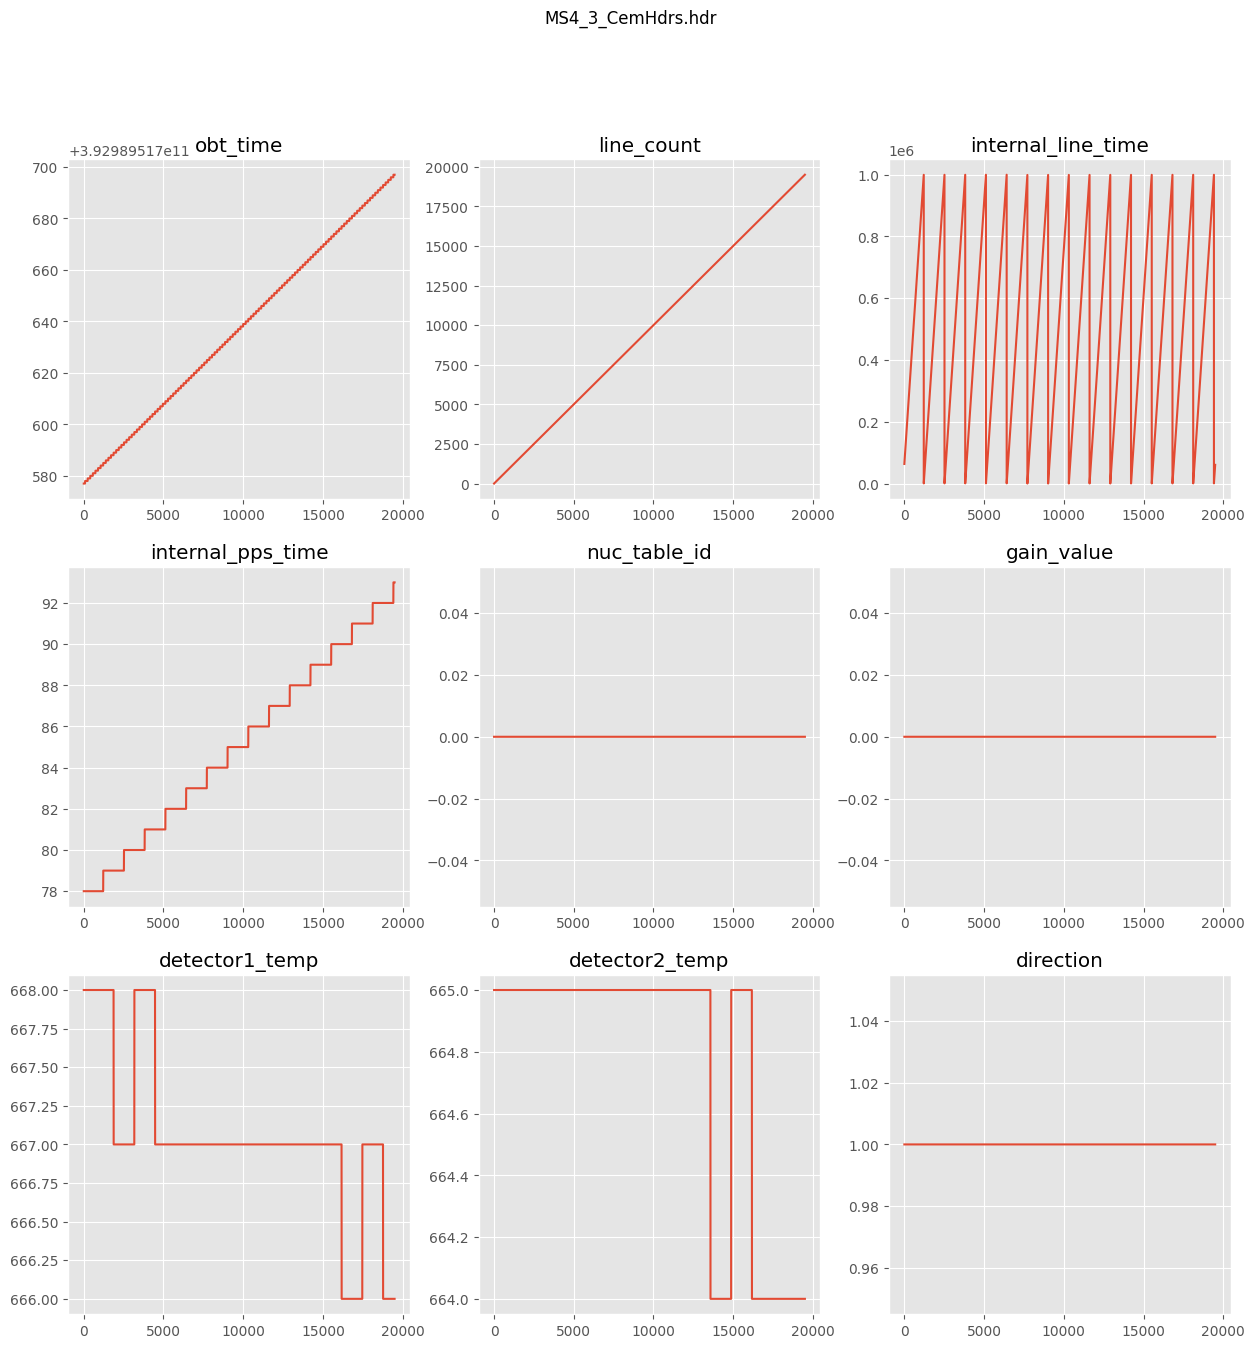

In [22]:
count = 0
for p in range(file_count):
    plt.style.use('ggplot')
    plt.figure(figsize=(15,15))
    plt.suptitle(str(header_files[p]).split('\\')[-1])


    plt.subplot(331)
    plt.title('fpa_id')
    plt.plot(fpa_id[p],label='fpa_id_{p}')
    plt.grid(True)
    # plt.legend()

    plt.subplot(332)
    plt.title('ch_link_id')
    plt.plot(ch_link_id[p],label='ch_link_id')
    plt.grid(True)
    # plt.legend()

    plt.subplot(333)
    plt.title('dsnu')
    plt.plot(dsnu[p],label='dsnu')
    plt.grid(True)
    # plt.legend()

    plt.subplot(334)
    plt.title('nelson')
    plt.plot(nelson[p],label='nelson')
    plt.grid(True)
    # plt.legend()

    plt.subplot(335)
    plt.title('offset')
    plt.plot(offset[p],label='offset')
    plt.grid(True)
    # plt.legend()

    plt.subplot(336)
    plt.title('trig_interval')
    plt.plot(trig_interval[p],label='trig_interval')
    plt.grid(True)
    # plt.legend()

    plt.subplot(337)
    plt.title('test_pattern')
    plt.plot(test_pattern[p],label='test_pattern')
    plt.grid(True)
    # plt.legend()

    plt.subplot(338)
    plt.title('tdi_stage')
    plt.plot(tdi_stage[p],label='tdi_stage')
    plt.grid(True)
    # plt.legend()

    plt.subplot(339)
    plt.title('pps')
    plt.plot(pps[p],label='pps')
    plt.grid(True)


    if save_en == 1 :
        plt.savefig(f"{folder_address}/{MS_NUM[p]}_{count}.png")
        count += 1

    plt.style.use('ggplot')
    plt.figure(figsize=(15,15))
    plt.suptitle(str(header_files[p]).split('\\')[-1])


    plt.subplot(331)
    plt.title('obt_time')
    plt.plot(obt_time[p],label='obt_time')
    plt.grid(True)
    # plt.legend()
    plt.subplot(332)
    plt.title('line_count')
    if false_Line==0:
        plt.plot(line_count[p],label='line_count')
    else:
        plt.plot(line_count[p][false_Line-10:false_Line+10],'.',label='line_count')
    plt.grid(True)
    # plt.legend()

    plt.subplot(333)
    plt.title('internal_line_time')
    if false_Line==0:
        plt.plot(internal_line_time[p],label='internal_line_time')
    else:
        plt.plot(internal_line_time[p][false_Line-10:false_Line+10],'.',label='internal_line_time')
    plt.grid(True)
    # plt.legend()

    plt.subplot(334)
    plt.title('internal_pps_time')
    plt.plot(internal_pps_time[p],label='internal_pps_time')
    plt.grid(True)
    # plt.legend()

    plt.subplot(335)
    plt.title('nuc_table_id')
    plt.plot(nuc_table_id[p],label='nuc_table_id')
    plt.grid(True)
    # plt.legend()

    plt.subplot(336)
    plt.title('gain_value')
    plt.plot(gain_value[p],label='gain_value')
    plt.grid(True)
    # plt.legend()

    plt.subplot(337)
    plt.title('detector1_temp')
    plt.plot(detector1_temp[p],label='detector1_temp')
    plt.grid(True)
    # plt.legend()

    plt.subplot(338)
    plt.title('detector2_temp')
    plt.plot(detector2_temp[p],label='detector2_temp')
    plt.grid(True)
    # plt.legend()

    plt.subplot(339)
    plt.title('direction')
    plt.plot(direction[p],label='direction')
    plt.grid(True)
    # plt.legend()


    if save_en == 1 :
        plt.savefig(f"{folder_address}/{MS_NUM[p]}_{count}.png")
        count += 1


# Header Check Result

In [23]:
# %%capture captured_output
if(all(FPA_ID_CHECK_RESULT)):
    print("FPA_ID_CHECK_RESULT : PASS")
else:
    print("FPA_ID_CHECK_RESULT : FAIL")
    for i in range(file_count):
        if (FPA_ID_CHECK_RESULT[i]):
           pass 
        else:
            print("FPA_ID_CHECK_RESULT Fail file No :" , MS_NUM[i],"_",SUB_NUM[i])
    print(FPA_ID_CHECK_RESULT)

if(all(CHANNEL_LINK_ID_CHECK_RESULT)):
    print("CHANNEL_LINK_ID_CHECK_RESULT : PASS")
else:
    print("CHANNEL_LINK_ID_CHECK_RESULT : FAIL")
    for i in range(file_count):
        if (CHANNEL_LINK_ID_CHECK_RESULT[i]):
           pass 
        else:
            print("CHANNEL_LINK_ID_CHECK_RESULT Fail file No :" , MS_NUM[i],"_",SUB_NUM[i])
    print(CHANNEL_LINK_ID_CHECK_RESULT)

if(all(TDIStages_Check_RESULT)):
    print("TDIStages_Check_RESULT : PASS")
else:
    print("TDIStages_Check_RESULT : FAIL")
    for i in range(file_count):
        if (TDIStages_Check_RESULT[i]):
           pass 
        else:
            print("TDIStages_Check_RESULT Fail file No :" , MS_NUM[i],"_",SUB_NUM[i])
    print(TDIStages_Check_RESULT)

if(all(PPS_CHECK_RESULT)):
    print("PPS_CHECK_RESULT : PASS")
else:
    print("PPS_CHECK_RESULT : FAIL")
    for i in range(file_count):
        if (PPS_CHECK_RESULT[i]):
           pass 
        else:
            print("PPS_CHECK_RESULT Fail file No :" , MS_NUM[i],"_",SUB_NUM[i])
    print(PPS_CHECK_RESULT)

if(all(DSNU_CHECK_RESULT)):
    print("DSNU_CHECK_RESULT : PASS")
else:
    print("DSNU_CHECK_RESULT : FAIL")
    for i in range(file_count):
        if (DSNU_CHECK_RESULT[i]):
           pass 
        else:
            print("DSNU_CHECK_RESULT Fail file No :" , MS_NUM[i],"_",SUB_NUM[i])
    print(DSNU_CHECK_RESULT)

if(all(PRNU_CHECK_RESULT)):
    print("PRNU_CHECK_RESULT : PASS")
else:
    print("PRNU_CHECK_RESULT : FAIL")
    for i in range(file_count):
        if (PRNU_CHECK_RESULT[i]):
           pass 
        else:
            print("PRNU_CHECK_RESULT Fail file No :" , MS_NUM[i],"_",SUB_NUM[i])
    print(PRNU_CHECK_RESULT)

if(all(Nelson_CHECK_RESULT)):
    print("Nelson_CHECK_RESULT : PASS")
else:
    print("Nelson_CHECK_RESULT : FAIL")
    for i in range(file_count):
        if (Nelson_CHECK_RESULT[i]):
           pass
        else:
            print("Nelson_CHECK_RESULT Fail file No :" , MS_NUM[i],"_",SUB_NUM[i])
    print(Nelson_CHECK_RESULT)

if(all(Offset_CHECK_RESULT)):
    print("Offset_CHECK_RESULT : PASS")
else:
    print("Offset_CHECK_RESULT : FAIL")
    for i in range(file_count):
        if (Offset_CHECK_RESULT[i]):
           pass
        else:
            print("Offset_CHECK_RESULT Fail file No :" , MS_NUM[i],"_",SUB_NUM[i])
    print(Offset_CHECK_RESULT)

if(all(Dark_CHECK_RESULT)):
    print("Dark_CHECK_RESULT : PASS")
else:
    print("Dark_CHECK_RESULT : FAIL")
    for i in range(file_count):
        if (Dark_CHECK_RESULT[i]):
           pass
        else:
            print("Dark_CHECK_RESULT Fail file No :" , MS_NUM[i],"_",SUB_NUM[i])
    print(Dark_CHECK_RESULT)

if(all(State_CHECK_RESULT)):
    print("State_CHECK_RESULT : PASS")
else:
    print("State_CHECK_RESULT : FAIL")
    for i in range(file_count):
        if (State_CHECK_RESULT[i]):
           pass
        else:
            print("State_CHECK_RESULT Fail file No :" , MS_NUM[i],"_",SUB_NUM[i])
    print(State_CHECK_RESULT)

if(all(D1Val_CHECK_RESULT)):
    print("D1Val_CHECK_RESULT : PASS")
else:
    print("D1Val_CHECK_RESULT : FAIL")
    for i in range(file_count):
        if (D1Val_CHECK_RESULT[i]):
           pass
        else:
            print("D1Val_CHECK_RESULT Fail file No :" , MS_NUM[i],"_",SUB_NUM[i])
    print(D1Val_CHECK_RESULT)

if(all(D2Val_CHECK_RESULT)):
    print("D2Val_CHECK_RESULT : PASS")
else:
    print("D2Val_CHECK_RESULT : FAIL")
    for i in range(file_count):
        if (D2Val_CHECK_RESULT[i]):
           pass
        else:
            print("D2Val_CHECK_RESULT Fail file No :" , MS_NUM[i],"_",SUB_NUM[i])
    print(D2Val_CHECK_RESULT)

if(all(FWD_RVS_CHECK_RESULT)):
    print("FWD_RVS_CHECK_RESULT : PASS")
else:
    print("FWD_RVS_CHECK_RESULT : FAIL")
    for i in range(file_count):
        if (FWD_RVS_CHECK_RESULT[i]):
           pass
        else:
            print("FWD_RVS_CHECK_RESULT Fail file No :" , MS_NUM[i],"_",SUB_NUM[i])
    print(FWD_RVS_CHECK_RESULT)

if(all(DarkEnR_CHECK_RESULT)):
    print("DarkEnR_CHECK_RESULT : PASS")
else:
    print("DarkEnR_CHECK_RESULT : FAIL")
    for i in range(file_count):
        if (DarkEnR_CHECK_RESULT[i]):
           pass
        else:
            print("DarkEnR_CHECK_RESULT Fail file No :" , MS_NUM[i],"_",SUB_NUM[i])
    print(DarkEnR_CHECK_RESULT)

if(all(DarkEnL_CHECK_RESULT)):
    print("DarkEnL_CHECK_RESULT : PASS")
else:
    print("DarkEnL_CHECK_RESULT : FAIL")
    for i in range(file_count):
        if (DarkEnL_CHECK_RESULT[i]):
           pass
        else:
            print("DarkEnL_CHECK_RESULT Fail file No :" , MS_NUM[i],"_",SUB_NUM[i])
    print(DarkEnL_CHECK_RESULT)

if(all(TriggerInterval_CHECK_RESULT)):
    print("TriggerInterval_CHECK_RESULT : PASS")
else:
    print("TriggerInterval_CHECK_RESULT : FAIL")
    for i in range(file_count):
        if (TriggerInterval_CHECK_RESULT[i]):
           pass
        else:
            print("TriggerInterval_CHECK_RESULT Fail file No :", MS_NUM[i],"_",SUB_NUM[i])
    print(TriggerInterval_CHECK_RESULT)

if(all(TrigMode_CHECK_RESULT)):
    print("TrigMode_CHECK_RESULT : PASS")
else:
    print("TrigMode_CHECK_RESULT : FAIL")
    for i in range(file_count):
        if (TrigMode_CHECK_RESULT[i]):
           pass
        else:
            print("TrigMode_CHECK_RESULT Fail file No :", MS_NUM[i],"_",SUB_NUM[i])
    print(TrigMode_CHECK_RESULT)

if(all(Gain_CHECK_RESULT)):
    print("Gain_CHECK_RESULT : PASS")
else:
    print("Gain_CHECK_RESULT : FAIL")
    for i in range(file_count):
        if (Gain_CHECK_RESULT[i]):
           pass
        else:
            print("Gain_CHECK_RESULT Fail file No :", MS_NUM[i],"_",SUB_NUM[i])
    print(Gain_CHECK_RESULT)

if(all(OffsetValue_CHECK_RESULT)):
    print("OffsetValue_CHECK_RESULT : PASS")
else:
    print("OffsetValue_CHECK_RESULT : FAIL")
    for i in range(file_count):
        if (OffsetValue_CHECK_RESULT[i]):
           pass
        else:
            print("OffsetValue_CHECK_RESULT Fail file No :", MS_NUM[i],"_",SUB_NUM[i])
    print(OffsetValue_CHECK_RESULT)

if(all(TestPattern_CHECK_RESULT)):
    print("TestPattern_CHECK_RESULT : PASS")
else:
    print("TestPattern_CHECK_RESULT : FAIL")
    for i in range(file_count):
        if (TestPattern_CHECK_RESULT[i]):
           pass
        else:
            print("TestPattern_CHECK_RESULT Fail file No :", MS_NUM[i],"_",SUB_NUM[i])
    print(TestPattern_CHECK_RESULT)

if(all(NUCTableID_CHECK_RESULT)):
    print("NUCTableID_CHECK_RESULT : PASS")
else:
    print("NUCTableID_CHECK_RESULT : FAIL")
    for i in range(file_count):
        if (NUCTableID_CHECK_RESULT[i]):
           pass
        else:
            print("NUCTableID_CHECK_RESULT Fail file No :", MS_NUM[i],"_",SUB_NUM[i])
    print(NUCTableID_CHECK_RESULT)

if(all(LineCounter_CHECK_RESULT)):
    print("LineCounter_CHECK_RESULT : PASS")
else:
    print("LineCounter_CHECK_RESULT : FAIL")
    for i in range(file_count):
        if (LineCounter_CHECK_RESULT[i]):
           pass
        else:
            print("LineCounter_CHECK_RESULT Fail file No :", MS_NUM[i],"_",SUB_NUM[i])
    print(LineCounter_CHECK_RESULT)

if(all(InternalLineTime_CHECK_RESULT)):
    print("InternalLineTime_CHECK_RESULT : PASS")
else:
    print("InternalLineTime_CHECK_RESULT : FAIL")
    for i in range(file_count):
        if (InternalLineTime_CHECK_RESULT[i]):
           pass
        else:
            print("InternalLineTime_CHECK_RESULT Fail file No :", MS_NUM[i],"_",SUB_NUM[i])
    print(InternalLineTime_CHECK_RESULT)

if(all(InternalPPSTime_CHECK_RESULT)):
    print("InternalPPSTime_CHECK_RESULT : PASS")
else:
    print("InternalPPSTime_CHECK_RESULT : FAIL")
    for i in range(file_count):
        if (InternalPPSTime_CHECK_RESULT[i]):
           pass
        else:
            print("InternalPPSTime_CHECK_RESULT Fail file No :", MS_NUM[i],"_",SUB_NUM[i])
    print(InternalPPSTime_CHECK_RESULT)


# filename = f"{save_dir}/{MS_NUM}_{count}.txt"

# with open(filename, "w") as f:
#     f.write(captured_output.stdout)


FPA_ID_CHECK_RESULT : PASS
CHANNEL_LINK_ID_CHECK_RESULT : PASS
TDIStages_Check_RESULT : PASS
PPS_CHECK_RESULT : PASS
DSNU_CHECK_RESULT : PASS
PRNU_CHECK_RESULT : PASS
Nelson_CHECK_RESULT : PASS
Offset_CHECK_RESULT : PASS
Dark_CHECK_RESULT : PASS
State_CHECK_RESULT : PASS
D1Val_CHECK_RESULT : PASS
D2Val_CHECK_RESULT : PASS
FWD_RVS_CHECK_RESULT : PASS
DarkEnR_CHECK_RESULT : PASS
DarkEnL_CHECK_RESULT : PASS
TriggerInterval_CHECK_RESULT : PASS
TrigMode_CHECK_RESULT : PASS
Gain_CHECK_RESULT : FAIL
Gain_CHECK_RESULT Fail file No : MS0 _ 0
Gain_CHECK_RESULT Fail file No : MS0 _ 1
Gain_CHECK_RESULT Fail file No : MS0 _ 2
Gain_CHECK_RESULT Fail file No : MS0 _ 3
Gain_CHECK_RESULT Fail file No : MS1 _ 0
Gain_CHECK_RESULT Fail file No : MS1 _ 1
Gain_CHECK_RESULT Fail file No : MS1 _ 2
Gain_CHECK_RESULT Fail file No : MS1 _ 3
Gain_CHECK_RESULT Fail file No : MS2 _ 0
Gain_CHECK_RESULT Fail file No : MS2 _ 1
Gain_CHECK_RESULT Fail file No : MS2 _ 2
Gain_CHECK_RESULT Fail file No : MS2 _ 3
Gain_CHECK

# Final Result

In [24]:
Header_Line_Number = []
for i in range(file_count):
    print(MS_NUM[i],"_",SUB_NUM[i],"Header Line Number :",len(line_count[i]))
    Header_Line_Number.append(len(line_count[i]))




if(final_result):
    print("======== header check result =========")
    print("        ", TEST_CASE, "  :   PASS")
    print("======== header check result =========")
else:
    print("======== header check result =========")
    print("        ", TEST_CASE, "  :   FAIL")
    print("======== header check result =========")



MS0 _ 0 Header Line Number : 19496
MS0 _ 1 Header Line Number : 19496
MS0 _ 2 Header Line Number : 19496
MS0 _ 3 Header Line Number : 19496
MS1 _ 0 Header Line Number : 19496
MS1 _ 1 Header Line Number : 19496
MS1 _ 2 Header Line Number : 19496
MS1 _ 3 Header Line Number : 19496
MS2 _ 0 Header Line Number : 19496
MS2 _ 1 Header Line Number : 19496
MS2 _ 2 Header Line Number : 19496
MS2 _ 3 Header Line Number : 19496
MS3 _ 0 Header Line Number : 19496
MS3 _ 1 Header Line Number : 19496
MS3 _ 2 Header Line Number : 19496
MS3 _ 3 Header Line Number : 19496
MS4 _ 0 Header Line Number : 19496
MS4 _ 1 Header Line Number : 19496
MS4 _ 2 Header Line Number : 19496
MS4 _ 3 Header Line Number : 19496
======== header check result =========
         420   :   FAIL
======== header check result =========


# Export to CSV

In [25]:
final_table = []
file_lists = []
test_items = ["Header_Line_Number","LineCounter_CHECK_RESULT","InternalLineTime_CHECK_RESULT","FPA_ID_CHECK_RESULT","CHANNEL_LINK_ID_CHECK_RESULT","TDIStages_Check_RESULT","PPS_CHECK_RESULT","DSNU_CHECK_RESULT","PRNU_CHECK_RESULT","Nelson_CHECK_RESULT","Offset_CHECK_RESULT","Dark_CHECK_RESULT","State_CHECK_RESULT","D1Val_CHECK_RESULT","D2Val_CHECK_RESULT","FWD_RVS_CHECK_RESULT","DarkEnR_CHECK_RESULT","DarkEnL_CHECK_RESULT","TriggerInterval_CHECK_RESULT","TrigMode_CHECK_RESULT","Gain_CHECK_RESULT","OffsetValue_CHECK_RESULT","TestPattern_CHECK_RESULT","NUCTableID_CHECK_RESULT","InternalPPSTime_CHECK_RESULT"]
test_results = [eval(name) for name in test_items]


for i in range(file_count):  
    file_lists.append(f"{MS_NUM[i]}_{SUB_NUM[i]}")



for i in range(len(file_lists)):
    row = [test_results[j][i] for j in range(len(test_results))]
    final_table.append(row.copy())
    


import csv

with open(f"{BASE_PATH}/{TEST_CASE}.csv","w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["file"] + test_items)

    for i in range(len(file_lists)):
        writer.writerow([file_lists[i]] + final_table[i])


pd.set_option("display.width",None)
pd.set_option("display.max_colwidth",None)
pd.set_option("display.expand_frame_repr",False)

df = pd.read_csv(f"{BASE_PATH}/{TEST_CASE}.csv")
df = df.replace({True: "PASS", False: "FAIL"})
df.to_csv(f"{BASE_PATH}/{TEST_CASE}.csv", index=False)

def style_pass_fail(val):
    style = "text-align: center;"
    if val == "PASS":
        style += " color: green; font-weight: bold;"
    elif val == "FAIL":
        style += " color: red; font-weight: bold;"
    return style

df.style.applymap(style_pass_fail)



# print(df)

C:\Users\yeha1518\AppData\Local\Temp\ipykernel_16212\595293803.py:44: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  df.style.applymap(style_pass_fail)


# Export to HTML

In [26]:
os.system(f'jupyter nbconvert py_image_header_analysis.ipynb --to html --output {folder_address}/{scenario_id}_image_header_analysis_resutl_{t_str}.html')

0

# Debug

In [27]:
# import csv

# with open(f"{BASE_PATH}/{TEST_CASE}_internal_line_time_fpa1.csv", "w", newline="") as f:
#     writer = csv.writer(f)
#     for v in internal_line_time[0]:
#         writer.writerow([v])
# with open(f"{BASE_PATH}/{TEST_CASE}_internal_line_time_fpa2.csv", "w", newline="") as f:
#     writer = csv.writer(f)
#     for v in internal_line_time[1]:
#         writer.writerow([v])
# with open(f"{BASE_PATH}/{TEST_CASE}_internal_pps_time_fpa1.csv", "w", newline="") as f:
#     writer = csv.writer(f)
#     for v in internal_pps_time[0]:
#         writer.writerow([v])
# with open(f"{BASE_PATH}/{TEST_CASE}_internal_pps_time_fpa2.csv", "w", newline="") as f:
#     writer = csv.writer(f)
#     for v in internal_pps_time[1]:
#         writer.writerow([v])
# with open(f"{BASE_PATH}/{TEST_CASE}_obt_time_fpa1.csv", "w", newline="") as f:
#     writer = csv.writer(f)
#     for v in obt_time[0]:
#         writer.writerow([v])
# with open(f"{BASE_PATH}/{TEST_CASE}_obt_time_fpa2.csv", "w", newline="") as f:
#     writer = csv.writer(f)
#     for v in obt_time[1]:
#         writer.writerow([v])
# with open(f"{BASE_PATH}/{TEST_CASE}_line_count_fpa1.csv", "w", newline="") as f:
#     writer = csv.writer(f)
#     for v in line_count[15]:
#         writer.writerow([v])
# with open(f"{BASE_PATH}/{TEST_CASE}_line_count.fpa2.csv", "w", newline="") as f:
#     writer = csv.writer(f)
#     for v in line_count[1]:
#         writer.writerow([v])
